# Gamma Scalping Trading Strategy
## FINM 33150 - Quant Trading Strategies (Winter 2024)
### Team: Nicholas Lee (ID: 12408152), Joey Recchia (ID: 12151786), Raafay Uqaily (ID: 12225382), Jesse Yan (ID: 12406982)

## 1. Introduction


The Black-Scholes (B-S) implied volatility is a forecast of a likely movement in a security’s price which indicates expected volatility in the future. The model-free implied volatility from [Jiang et al.] computes the implied volatility directly from the prices of options across different strikes and maturities, without depending on assumptions of any specific options pricing model. The model-free implied volatility subsumes all information contained in the B-S implied volatility and the past realized volatility, and is a more efficient forecast of future realized volatility. We aim to develop a gamma scalping strategy based on model-free implied volatility versus B-S implied volatility.

A straddle combines a call and a put of the same strike and expiration. A long position would mean buying both, and a short position would mean shorting both. Delta measures the rate of change in an option's price relative to changes in the price of the underlying asset. The delta of an at-the-money straddle would come out to near zero, since the negative delta of the put would cancel out the positive delta of the call, as they have the similar magnitude from being at-the-money. Gamma measures the rate of change in an option's delta for a one-point change in the price of the underlying asset. Gamma is highest at-the-money and close to expiry. Gamma scalping involves profiting from short-term price movements in an underlying asset by adjusting positions based on changes in delta and gamma, mainly through delta-hedging. Advantages include: flexibility, limited risk exposure, and high potential for returns. See the below excerpt from *Trading Volatility* by Colin Bennet:

![Description or Alt text](figure.jpg)

The SPDR S&P 500 ETF Trust (NYSEARCA: SPY) was selected due to high liquidity in both the underlying and options markets. Options data was extracted from Jan 2018 to Feb 2024 (five-year period) to balance effectively capturing the most recent trading environment and using sufficient data.
<br>
<br>
**Jiang, George J., and Yisong S. Tian. “The model-free implied volatility and its information content.” Review of Financial Studies, vol. 18, no. 4, 2005, pp. 1305–1342, https://doi.org/10.1093/rfs/hhi027.**
<br>
<br>
The paper by Jiang and Tian discusses the concept of a model-free implied volatility (MFIV), a measure of the market's expectation of future volatility that does not depend on any specific option pricing model, such as the Black-Scholes model. This approach to calculating implied volatility is significant because it potentially offers a more accurate and robust indicator of future market volatility, free from the biases and limitations inherent in model-based approaches. The equation from the paper can be seen below:
<br>
<br>
$$
\sum_{i=1}^{m} \left[ g(T, K_i) + g(T, K_{i-1}) \right] \Delta K
$$
<br>
<br>

Where $m$ is the number of tradable strike prices, $\Delta K = \frac{K_{\max} - K_{\min}}{m}$, $K_i = K_{\min} + i \Delta K$, and $g(T, K_i) = \frac{C^F(T, K_i) - \max(0, F_0 - K_i)}{K_i^2}$. 

The research paper delves into the methodology for calculating MFIV, which involves aggregating the implied volatilities derived from a wide range of options across different strike prices and maturities. By doing so, the MFIV captures a more comprehensive picture of the market's expectations for volatility, encompassing information from both deep out-of-the-money and in-the-money options. The paper also explores the informational content of MFIV, examining how it reflects market participants' collective views and expectations about future volatility. This includes an analysis of how MFIV predicts future market movements, its response to macroeconomic announcements or significant market events, and its relationship with historical volatility and other financial indicators. The paper also uses market data to compare the predictive power and informational efficiency of MFIV against other volatility measures.
<br>
<br>
Finally, Jiang and Tian discuss the implications of their findings for both practitioners and theorists. For practitioners, the use of MFIV could lead to better hedging strategies, more accurate pricing of derivatives, and improved portfolio management. For theorists, the findings could challenge existing models of market behavior and contribute to the development of new theories that more accurately reflect the complexities of financial markets.
<br>

**Oliveira, Rogerio, and Gustavo Wasserstein. “The Quest for Alpha in Equity Gamma.” https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4474815.**
<br>

**Hirsa, Ali, and Dilip B. Madan. “Pricing American Options Under Variance Gamma.” https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=16061c8cc6ee13947162a35cebc7962efa09f7de.**
<br>

**Bennett, C. (2014). Trading Volatility: Trading Volatility, Correlation, Term Structure and Skew. CreateSpace Independent Publishing Platform. ISBN: 978-146110875. https://www.trading-volatility.com/Trading-Volatility.pdf.**
<br>

**Konikov, Mikhail, and Dilip B. Madan. “Option Pricing Using Variance Gamma Markov Chains.” https://link.springer.com/article/10.1023/A:1013816400834.**
<br>

**Sepp, Artur. “When You Hedge Discretely: Optimization of Sharpe Ratio for Delta-Hedging Strategy under Discrete Hedging and Transaction Costs.https://papers.ssrn.com/sol3/papers.cfm?abstract_id=186599815.**
<br>

## 2. Methodology Overview

We enter a long or short gamma position based on implied volatility [Oliveira et al]. The B-S implied volatility is compared with the model-free implied volatility from [Jiang et al] to provide a decision boundary on which to enter the position. If the model-free implied volatility value is higher than the Black-Scholes implied volatility by a certain threshold, we we go long gamma, and if the model-free implied volatility value is lower than the Black-Scholes implied volatility value by the same threshold, we will go short gamme. We analyze daily whether to enter a long or short position on a delta-hedged straddle based on this decision boundary. A straddle reduces the number of shares necessary to initially delta hedge, as the delta of the put and the delta of the call will cancel each other out. By entering daily, it is possible to net the number of shares required for rebalancing to a near zero-delta state, thus saving on transaction costs. Each straddle position that we hold is evaluated independent of other positons for rebalancing each day. If its delta value is above a certain threshold, we rebalance by buying or selling delta shares of the underlying with the aim of getting to net zero delta. We exit each straddle after an approximately 3-week holding period, as most gamma should have been realized by this point. This also reduces need to delta-hedge potentially volatile moves in the week leading up to expiration. Also, by exiting our options positions with 1 week until expiration, we reduce our exposure to market microstructure idiosyncrasies.
<br>
<br>
We will simulate our strategy using a number of different thresholds for when to enter positions and when to rebalance positions. We we also experiment with the effects of assuming zero trading costs versus fixed trading costs at 0.01% of the notional value traded on each trade we make. Additionally, we plan on examining the impact of assuming fractional positions can be traded versus if they cannot be traded. We assume the midpoint between best offer and best ask as the price we will get in our simulation.
<br>
<br>
To evaluate the performance of our strategy, we will look at metrics such as sharpe ratio, market beta, and downside beta. The only equity that this strategy's PnL is dependent on is the SPY ETF so we anticipate the strategy may have somewhat strong correlations with the market.
<br>

**Oliveira, Rogerio, and Gustavo Wasserstein. “The Quest for Alpha in Equity Gamma.” https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4474815.**
<br>


## Code init

#### Imports

Import all dependencies and functions via source file.

In [30]:
from source import *

#### Quandl/WRDS Credentials

Importing quandl API key. Individual keys are protected in a ```.json``` file.

In [2]:
with open('quandl_config.json', 'r') as f:
    config = json.load(f)
    quandl_api_key = config['api_key']

#quandl.ApiConfig.api_key = quandl_api_key

In [3]:
with open('wrds_config.json', 'r') as config_file:
    wrds_credentials = json.load(config_file)

**Local use**

The API keys and WRDS login are loaded from *quandl_config.json* in the same directory as this notebook locally, which has the following content,

```
{
    "api_key": ""
}
```

and *wrds_config.json*,

```
{
    "wrds": {
        "username": "",
        "password": ""
    }
}
```

To skip WRDS input on pulls, we have ```.pgpass``` with,
```
hostname:port:database:username:password
wrds-pgdata.wharton.upenn.edu:9737:wrds:(user):(pass)
```

## 3. Data Retrieval

For our data load process, we worked through github to upload functions and called them locally to each grab data, so we have several checkpoints where we save data to .csv format in the local directory so they can be reloaded directly when continuing work.

### SPY price data via Quandl

In [4]:
datapull = fetch_quandl_table('QUOTEMEDIA/PRICES', quandl_api_key, ticker='SPY', avoid_download=True)

Skipping any possible download of QUOTEMEDIA/PRICES


Optional saving checkpoint:

In [5]:
datapull.to_csv('spy_tickerdata.csv', index=False)

In [6]:
display(datapull)

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
0,SPY,1993-08-13,45.093700,45.156200,45.093700,45.125000,103500.0,0.0,1.0,25.778428,25.814157,25.778428,25.796321,103500.0
1,SPY,1993-08-16,45.156200,45.500000,45.156200,45.375000,241800.0,0.0,1.0,25.814157,26.010695,25.814157,25.939237,241800.0
2,SPY,1993-08-17,45.343700,45.531200,45.343700,45.531200,369300.0,0.0,1.0,25.921344,26.028531,25.921344,26.028531,369300.0
3,SPY,1993-08-18,45.687500,45.875000,45.656200,45.781200,414300.0,0.0,1.0,26.117882,26.225069,26.099989,26.171447,414300.0
4,SPY,1993-08-19,45.812500,45.812500,45.718700,45.781200,28500.0,0.0,1.0,26.189340,26.189340,26.135718,26.171447,28500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,SPY,1993-06-22,44.656200,44.656200,44.562500,44.625000,137500.0,0.0,1.0,25.528325,25.528325,25.474761,25.510490,137500.0
7828,SPY,1994-11-16,46.765598,46.843700,46.609299,46.843700,106900.0,0.0,1.0,27.589587,27.635663,27.497377,27.635663,106900.0
7829,SPY,2010-03-10,114.510002,115.279999,114.410004,114.970001,186088800.0,0.0,1.0,87.964535,88.556033,87.887719,88.317898,186088800.0
7830,SPY,2022-02-15,443.730000,446.280000,443.180000,446.100000,88435136.0,0.0,1.0,430.043935,432.515285,429.510899,432.340837,88435136.0


### WRDS Options Data for SPY

#### **Connection Toggle**

Not meant to run in sequence; rather, toggles an open connection to WRDS to pull data.

In [7]:
db = wrds.Connection(
    wrds_username=wrds_credentials['wrds']['username'],
)

Loading library list...
Done


In [11]:
db.close()

#### Data Pull

Pulls the data and stores in .csv file in the same directory, to allow reloading from local. This could be done more elegantly like the provided Quandl function, but since the data doesn't change day-by-day, it only needs to be pulled once.

In [8]:
start_year = 2018
end_year = 2023

In [9]:
optiondata = pd.DataFrame()

for year in range(start_year, end_year + 1):
    sql_query = f"""
    SELECT date, exdate, last_date, cp_flag, strike_price, best_bid, best_offer,
           volume, open_interest, impl_volatility, delta, gamma, vega, theta,
           expiry_indicator
    FROM optionm_all.opprcd{year}
    WHERE secid = '109820' 
    AND date BETWEEN '{year}-01-01' AND '2023-02-28'
    AND exdate - date < 800
    """
    year_data = db.raw_sql(sql_query)
    optiondata = pd.concat([optiondata, year_data], ignore_index=True)

We could add "AND volume >= 100" to filter volume, if we choose. We ended up keeping all volumes, otherwise there were not enough strikes with proper bid/ask and Greeks data.

In [10]:
csv_file_path = 'option_data.csv'
optiondata.to_csv(csv_file_path, index=False)
print(f"All data saved to {csv_file_path}")

All data saved to option_data.csv


## 4. Initial Data Restructuring

### Checkpoint 1: Retrieve as Variable (csv save 1)

Retrieving the first checkpoint:

In [2]:
csv_file_path = 'option_data.csv'
spydata = pd.read_csv(csv_file_path)

In [3]:
display(spydata)

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator
0,2018-01-02,2018-01-03,2017-12-28,C,235000.0,33.59,33.81,0.0,187.0,NaN,NaN,NaN,NaN,NaN,w
1,2018-01-02,2018-01-03,2018-01-02,C,240000.0,28.59,28.76,1.0,88.0,NaN,NaN,NaN,NaN,NaN,w
2,2018-01-02,2018-01-03,2017-12-27,C,242500.0,26.09,26.32,0.0,2.0,NaN,NaN,NaN,NaN,NaN,w
3,2018-01-02,2018-01-03,2018-01-02,C,245000.0,23.59,23.81,12.0,58.0,NaN,NaN,NaN,NaN,NaN,w
4,2018-01-02,2018-01-03,NaN,C,247500.0,21.08,21.32,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448189,2023-02-28,2025-03-21,2022-12-28,P,600000.0,200.50,205.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448190,2023-02-28,2025-03-21,NaN,P,605000.0,205.50,210.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448191,2023-02-28,2025-03-21,NaN,P,610000.0,210.00,215.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448192,2023-02-28,2025-03-21,NaN,P,615000.0,215.00,220.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Order by the appropriate date, then expiry date, then strike price within the date spread.

In [4]:
spydata_sorted = spydata.sort_values(by=['date', 'exdate', 'cp_flag', 'strike_price'])
spydata_final = spydata_sorted.reset_index(drop=True)

In [5]:
display(spydata_final)

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator
0,2018-01-02,2018-01-03,2017-12-28,C,235000.0,33.59,33.81,0.0,187.0,NaN,NaN,NaN,NaN,NaN,w
1,2018-01-02,2018-01-03,2018-01-02,C,240000.0,28.59,28.76,1.0,88.0,NaN,NaN,NaN,NaN,NaN,w
2,2018-01-02,2018-01-03,2017-12-27,C,242500.0,26.09,26.32,0.0,2.0,NaN,NaN,NaN,NaN,NaN,w
3,2018-01-02,2018-01-03,2018-01-02,C,245000.0,23.59,23.81,12.0,58.0,NaN,NaN,NaN,NaN,NaN,w
4,2018-01-02,2018-01-03,NaN,C,247500.0,21.08,21.32,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448189,2023-02-28,2025-03-21,2022-12-28,P,600000.0,200.50,205.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448190,2023-02-28,2025-03-21,NaN,P,605000.0,205.50,210.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448191,2023-02-28,2025-03-21,NaN,P,610000.0,210.00,215.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10448192,2023-02-28,2025-03-21,NaN,P,615000.0,215.00,220.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
spydata_final.to_csv('sorteddata.csv', index=False)

### Checkpoint 2: Retrieve sorted data; make adjustments (csv save 2)

In [2]:
spy_optiondata = pd.read_csv('sorteddata.csv')

Load the ticker price data, directly from local.

In [4]:
spy_tickerdata = pd.read_csv('spy_tickerdata.csv')

Make some adjustments and attach to our data table for options.
* Set a start and end date. We chose this initially to be 2018 to the end of the data; in particular, this is what is considered to be the modern trading regime for SPY and its options.
* Regularize the price

In [6]:
start_date = '2018-01-01'
end_date = '2023-02-28'

In [7]:
spy_tickerdata_reduced = prepare_ticker_data(spy_tickerdata, '2018-01-01', '2023-02-28')
spy_optiondata_prepared = prepare_option_data(spy_optiondata)
spy_optiondata_enriched = enrich_option_data(spy_optiondata_prepared, spy_tickerdata_reduced)
display(spy_optiondata_enriched)

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume
0,2018-01-02,2018-01-03,2017-12-28,C,235.0,33.59,33.81,0.0,187.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0
1,2018-01-02,2018-01-03,2018-01-02,C,240.0,28.59,28.76,1.0,88.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0
2,2018-01-02,2018-01-03,2017-12-27,C,242.5,26.09,26.32,0.0,2.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0
3,2018-01-02,2018-01-03,2018-01-02,C,245.0,23.59,23.81,12.0,58.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0
4,2018-01-02,2018-01-03,NaN,C,247.5,21.08,21.32,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448189,2023-02-28,2025-03-21,2022-12-28,P,600.0,200.50,205.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0
10448190,2023-02-28,2025-03-21,NaN,P,605.0,205.50,210.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0
10448191,2023-02-28,2025-03-21,NaN,P,610.0,210.00,215.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0
10448192,2023-02-28,2025-03-21,NaN,P,615.0,215.00,220.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0


Two more saving checkpoints - this saves the data, one with all datapoints, and the other removing those where Greeks and IV are missing from the data. For this, we will use the further cleaned file to see where exactly the missing data is.

In [8]:
spy_optiondata_enriched.to_csv('combinedata.csv', index=False)

In [9]:
spydata_cleaned = spy_optiondata_enriched.dropna(subset=['impl_volatility', 'delta', 'gamma', 'vega', 'theta'])
spydata_dropna = spydata_cleaned.reset_index(drop=True)
spydata_dropna.to_csv('combinedata_dropna.csv', index=False)

### Checkpoint 3: Retrieve combined data; determining missing data, combined strikes

This is another load checkpoint.

In [2]:
filepath = 'combinedata.csv'
filepath1 = 'combinedata_dropna.csv'
options_df = pd.read_csv(filepath)
options_df1 = pd.read_csv(filepath1)

Now we'll take a look to see if for our strategy, which we will initially set as approximately month-long options to be closed 1 week to expiry, have data in the dataset for the entire time that we hold them.

Looking at the combined dataset, at a glance:

In [3]:
exdates = set(options_df['exdate'])
quotedates = set(options_df['date'])

In [4]:
exdates - quotedates

{'2018-12-05',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-06',
 '2023-03-07',
 '2023-03-08',
 '2023-03-09',
 '2023-03-10',
 '2023-03-13',
 '2023-03-14',
 '2023-03-17',
 '2023-03-24',
 '2023-03-31',
 '2023-04-06',
 '2023-04-21',
 '2023-05-19',
 '2023-06-16',
 '2023-06-30',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-09-29',
 '2023-12-15',
 '2023-12-29',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21'}

In [5]:
quotedates - exdates

{'2018-01-02',
 '2018-01-04',
 '2018-01-08',
 '2018-01-09',
 '2018-01-11',
 '2018-01-16',
 '2018-01-18',
 '2018-01-22',
 '2018-01-23',
 '2018-01-25',
 '2018-01-29',
 '2018-01-30',
 '2018-02-01',
 '2018-02-05',
 '2018-02-06',
 '2018-02-08',
 '2018-02-12',
 '2018-02-13',
 '2018-02-15',
 '2018-02-20',
 '2018-02-22',
 '2018-02-27',
 '2018-03-01',
 '2018-03-06',
 '2018-03-08',
 '2018-03-13',
 '2018-03-15',
 '2018-03-20',
 '2018-03-22',
 '2018-03-27',
 '2018-04-03',
 '2018-04-05',
 '2018-04-10',
 '2018-04-12',
 '2018-04-17',
 '2018-04-19',
 '2018-04-24',
 '2018-04-26',
 '2018-05-01',
 '2018-05-03',
 '2018-05-08',
 '2018-05-10',
 '2018-05-15',
 '2018-05-17',
 '2018-05-22',
 '2018-05-24',
 '2018-05-31',
 '2018-06-05',
 '2018-06-07',
 '2018-06-12',
 '2018-06-14',
 '2018-06-19',
 '2018-06-21',
 '2018-06-26',
 '2018-06-28',
 '2018-07-05',
 '2018-07-10',
 '2018-07-12',
 '2018-07-17',
 '2018-07-19',
 '2018-07-24',
 '2018-07-26',
 '2018-07-31',
 '2018-08-02',
 '2018-08-07',
 '2018-08-09',
 '2018-08-

In [6]:
exdates & quotedates

{'2018-01-03',
 '2018-01-05',
 '2018-01-10',
 '2018-01-12',
 '2018-01-17',
 '2018-01-19',
 '2018-01-24',
 '2018-01-26',
 '2018-01-31',
 '2018-02-02',
 '2018-02-07',
 '2018-02-09',
 '2018-02-14',
 '2018-02-16',
 '2018-02-21',
 '2018-02-23',
 '2018-02-26',
 '2018-02-28',
 '2018-03-02',
 '2018-03-05',
 '2018-03-07',
 '2018-03-09',
 '2018-03-12',
 '2018-03-14',
 '2018-03-16',
 '2018-03-19',
 '2018-03-21',
 '2018-03-23',
 '2018-03-26',
 '2018-03-28',
 '2018-03-29',
 '2018-04-02',
 '2018-04-04',
 '2018-04-06',
 '2018-04-09',
 '2018-04-11',
 '2018-04-13',
 '2018-04-16',
 '2018-04-18',
 '2018-04-20',
 '2018-04-23',
 '2018-04-25',
 '2018-04-27',
 '2018-04-30',
 '2018-05-02',
 '2018-05-04',
 '2018-05-07',
 '2018-05-09',
 '2018-05-11',
 '2018-05-14',
 '2018-05-16',
 '2018-05-18',
 '2018-05-21',
 '2018-05-23',
 '2018-05-25',
 '2018-05-29',
 '2018-05-30',
 '2018-06-01',
 '2018-06-04',
 '2018-06-06',
 '2018-06-08',
 '2018-06-11',
 '2018-06-13',
 '2018-06-15',
 '2018-06-18',
 '2018-06-20',
 '2018-06-

Here, we calculate the time to expiry for each contract, in days.

In [7]:
options_df['TTE'] = (pd.to_datetime(options_df['exdate']) - pd.to_datetime(options_df['date'])).dt.days
options_df

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
0,2018-01-02,2018-01-03,2017-12-28,C,235.0,33.59,33.81,0.0,187.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,1
1,2018-01-02,2018-01-03,2018-01-02,C,240.0,28.59,28.76,1.0,88.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,1
2,2018-01-02,2018-01-03,2017-12-27,C,242.5,26.09,26.32,0.0,2.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,1
3,2018-01-02,2018-01-03,2018-01-02,C,245.0,23.59,23.81,12.0,58.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,1
4,2018-01-02,2018-01-03,NaN,C,247.5,21.08,21.32,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448189,2023-02-28,2025-03-21,2022-12-28,P,600.0,200.50,205.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0,752
10448190,2023-02-28,2025-03-21,NaN,P,605.0,205.50,210.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0,752
10448191,2023-02-28,2025-03-21,NaN,P,610.0,210.00,215.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0,752
10448192,2023-02-28,2025-03-21,NaN,P,615.0,215.00,220.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,396.26,391.240559,390.285185,96141367.0,752


Then, we filter for the closest few days to 30 DtE. We will later modify this to be the absolute closest to 30.

In [8]:
filtered_df = options_df[(options_df['TTE'] >= 27) & (options_df['TTE'] <= 33)]
filtered_df

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
972,2018-01-02,2018-01-31,NaN,C,165.0,103.82,104.01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w,268.77,242.053393,242.893856,86655749.0,29
973,2018-01-02,2018-01-31,2017-12-28,C,240.0,29.06,29.26,0.0,12.0,0.193414,0.983311,0.002835,3.151210,-7.538074,w,268.77,242.053393,242.893856,86655749.0,29
974,2018-01-02,2018-01-31,2017-12-28,C,245.0,24.12,24.32,0.0,2.0,0.175939,0.972425,0.004764,4.816286,-9.064763,w,268.77,242.053393,242.893856,86655749.0,29
975,2018-01-02,2018-01-31,2017-12-28,C,250.0,19.20,19.38,0.0,152.0,0.153960,0.957185,0.007811,6.907079,-10.439730,w,268.77,242.053393,242.893856,86655749.0,29
976,2018-01-02,2018-01-31,2017-12-28,C,255.0,14.33,14.52,0.0,52.0,0.133378,0.926605,0.013784,10.547560,-12.556030,w,268.77,242.053393,242.893856,86655749.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444209,2023-02-28,2023-03-31,2022-06-23,P,570.0,172.26,173.45,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
10444210,2023-02-28,2023-03-31,2022-11-18,P,575.0,177.25,178.44,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
10444211,2023-02-28,2023-03-31,2022-06-23,P,580.0,182.23,183.43,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
10444212,2023-02-28,2023-03-31,2022-11-15,P,585.0,187.22,188.42,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31


We can do the same with the dataset where contracts with nonexistent Greek calculations are dropped (we won't end up using this data set, but it will help us consider which values to initially drop for our calculations before we try to see if mock Black-Scholes values or similar can be used to fill missing Greeks/IV)

In [9]:
exdates1 = set(options_df1['exdate'])
quotedates1 = set(options_df1['date'])

In [10]:
len(exdates1 - quotedates1)

31

In [11]:
len(quotedates1 - exdates1)

468

In [12]:
len(exdates1 & quotedates1)

830

Again calculating time to expiry:

In [13]:
options_df1['TTE'] = (pd.to_datetime(options_df1['exdate']) - pd.to_datetime(options_df1['date'])).dt.days
options_df1

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
0,2018-01-02,2018-01-03,2018-01-02,C,267.5,1.28,1.34,5514.0,7184.0,0.062960,0.926657,0.157172,1.959172,-26.221690,w,268.77,242.053393,242.893856,86655749.0,1
1,2018-01-02,2018-01-03,2018-01-02,C,268.0,0.85,0.88,14476.0,5520.0,0.060924,0.819616,0.306547,3.697382,-44.389840,w,268.77,242.053393,242.893856,86655749.0,1
2,2018-01-02,2018-01-03,2018-01-02,C,268.5,0.48,0.50,12516.0,5895.0,0.058946,0.633232,0.453884,5.294787,-59.509580,w,268.77,242.053393,242.893856,86655749.0,1
3,2018-01-02,2018-01-03,2018-01-02,C,269.0,0.21,0.22,14745.0,5761.0,0.055630,0.390490,0.490317,5.399054,-56.377560,w,268.77,242.053393,242.893856,86655749.0,1
4,2018-01-02,2018-01-03,2018-01-02,C,269.5,0.07,0.08,1742.0,7512.0,0.055298,0.178472,0.335492,3.670619,-37.772850,w,268.77,242.053393,242.893856,86655749.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261854,2023-02-28,2025-03-21,2023-02-08,P,450.0,57.50,62.50,0.0,75.0,0.161451,-0.714413,0.007297,154.462000,1.957872,NaN,396.26,391.240559,390.285185,96141367.0,752
9261855,2023-02-28,2025-03-21,2023-01-09,P,455.0,61.00,66.00,0.0,0.0,0.158546,-0.758524,0.007626,151.188600,2.874898,NaN,396.26,391.240559,390.285185,96141367.0,752
9261856,2023-02-28,2025-03-21,2023-01-09,P,460.0,64.50,69.50,0.0,14.0,0.154637,-0.805469,0.007817,123.774400,4.337152,NaN,396.26,391.240559,390.285185,96141367.0,752
9261857,2023-02-28,2025-03-21,2023-01-09,P,465.0,68.50,73.50,0.0,21.0,0.152118,-0.846083,0.007509,79.376680,6.359011,NaN,396.26,391.240559,390.285185,96141367.0,752


In [14]:
filtered_df1 = options_df1[(options_df1['TTE'] >= 27) & (options_df1['TTE'] <= 33)]
filtered_df1

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
828,2018-01-02,2018-01-31,2017-12-28,C,240.0,29.06,29.26,0.0,12.0,0.193414,0.983311,0.002835,3.151210,-7.538074,w,268.77,242.053393,242.893856,86655749.0,29
829,2018-01-02,2018-01-31,2017-12-28,C,245.0,24.12,24.32,0.0,2.0,0.175939,0.972425,0.004764,4.816286,-9.064763,w,268.77,242.053393,242.893856,86655749.0,29
830,2018-01-02,2018-01-31,2017-12-28,C,250.0,19.20,19.38,0.0,152.0,0.153960,0.957185,0.007811,6.907079,-10.439730,w,268.77,242.053393,242.893856,86655749.0,29
831,2018-01-02,2018-01-31,2017-12-28,C,255.0,14.33,14.52,0.0,52.0,0.133378,0.926605,0.013784,10.547560,-12.556030,w,268.77,242.053393,242.893856,86655749.0,29
832,2018-01-02,2018-01-31,2017-12-28,C,260.0,9.58,9.74,0.0,31.0,0.110864,0.868021,0.025454,16.200190,-14.825650,w,268.77,242.053393,242.893856,86655749.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9258523,2023-02-28,2023-03-31,2023-02-28,P,411.0,16.09,17.26,102.0,906.0,0.127514,-0.854706,0.016339,25.346960,-6.080472,m,396.26,391.240559,390.285185,96141367.0,31
9258524,2023-02-28,2023-03-31,2023-02-28,P,412.0,16.82,18.00,5.0,2911.0,0.121468,-0.882473,0.014863,21.527260,-1.950742,m,396.26,391.240559,390.285185,96141367.0,31
9258525,2023-02-28,2023-03-31,2023-02-28,P,413.0,17.57,18.77,7.0,2126.0,0.114016,-0.911503,0.012890,17.372680,2.619810,m,396.26,391.240559,390.285185,96141367.0,31
9258526,2023-02-28,2023-03-31,2023-02-28,P,414.0,18.34,19.56,1.0,1120.0,0.103528,-0.943419,0.009995,11.793440,7.923930,m,396.26,391.240559,390.285185,96141367.0,31


We need strikes for each day where we evaluate positions to cover the range of 30 days of stock movements. We'll look at calls and puts separately. We need the ATM option to have data for the next 21-30 days.

First, calculate the closest possible date to 30.

In [15]:
puts_df = filtered_df[filtered_df['cp_flag'] == 'P']
calls_df = filtered_df[filtered_df['cp_flag'] == 'C']

puts_df1 = filtered_df1[filtered_df1['cp_flag'] == 'P']
calls_df1 = filtered_df1[filtered_df1['cp_flag'] == 'C']

Note: Resolve DeprecationWarning by adding ', include_groups=False' to apply function.

In [16]:
puts_result_df = puts_df.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()
calls_result_df = calls_df.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()

puts_result_df1 = puts_df1.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()
calls_result_df1 = calls_df1.groupby('date', as_index=False).apply(find_closest_tte).reset_index(drop=True)[['date', 'TTE']].drop_duplicates()

In [17]:
calls_result_df

,date,TTE
0,2018-01-02,29
1,2018-01-03,30
2,2018-01-04,29
3,2018-01-05,28
4,2018-01-08,30
...,...,...
1293,2023-02-22,30
1294,2023-02-23,29
1295,2023-02-24,28
1296,2023-02-27,32


Check if there are any days where the TtE is less than 28, then check that the data matches.

In [18]:
calls_result_df1.loc[calls_result_df1['TTE'] < 28]

,date,TTE


In [19]:
set(options_df['date']) - set(calls_result_df['date'])

set()

Now, we'll iterate and filter based on date and time to expiry.

In [20]:
original_dfs = {'puts': puts_df, 'calls': calls_df, 'puts1': puts_df1, 'calls1': calls_df1}
result_dfs = {'puts': puts_result_df, 'calls': calls_result_df, 'puts1': puts_result_df1, 'calls1': calls_result_df1}
filtered_dfs = merge_dataframes(original_dfs, result_dfs)

In [21]:
filtered_dfs['puts']

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
0,2018-01-02,2018-01-31,NaN,P,165.0,0.00,0.01,0.0,0.0,0.535503,-0.000456,0.000040,0.123239,-0.414822,w,268.77,242.053393,242.893856,86655749.0,29
1,2018-01-02,2018-01-31,2018-01-02,P,240.0,0.13,0.14,147.0,1282.0,0.205954,-0.022718,0.003462,4.080427,-5.205224,w,268.77,242.053393,242.893856,86655749.0,29
2,2018-01-02,2018-01-31,2018-01-02,P,245.0,0.17,0.18,66.0,182.0,0.182066,-0.031889,0.005197,5.423385,-6.083812,w,268.77,242.053393,242.893856,86655749.0,29
3,2018-01-02,2018-01-31,2018-01-02,P,250.0,0.24,0.25,269.0,166.0,0.159122,-0.048143,0.008314,7.569383,-7.395249,w,268.77,242.053393,242.893856,86655749.0,29
4,2018-01-02,2018-01-31,2018-01-02,P,255.0,0.36,0.37,59.0,749.0,0.135986,-0.077530,0.014119,10.996340,-9.096192,w,268.77,242.053393,242.893856,86655749.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128920,2023-02-28,2023-03-31,2022-06-23,P,570.0,172.26,173.45,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
128921,2023-02-28,2023-03-31,2022-11-18,P,575.0,177.25,178.44,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
128922,2023-02-28,2023-03-31,2022-06-23,P,580.0,182.23,183.43,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31
128923,2023-02-28,2023-03-31,2022-11-15,P,585.0,187.22,188.42,0.0,0.0,NaN,NaN,NaN,NaN,NaN,m,396.26,391.240559,390.285185,96141367.0,31


We'll choose the one closest to the money:

In [22]:
final_dfs = filter_dfs_on_criteria(filtered_dfs, select_row_with_smallest_diff)
final_dfs['calls1']

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE
0,2018-01-02,2018-01-31,2018-01-02,C,269.0,2.11,2.16,477.0,37.0,0.068871,0.512031,0.076400,30.21236,-15.22501,w,268.77,242.053393,242.893856,86655749.0,29
1,2018-01-03,2018-02-02,2018-01-03,C,270.0,2.65,2.69,289.0,719.0,0.072398,0.562218,0.070177,30.55966,-15.81073,w,270.47,243.065564,244.430187,90070416.0,30
2,2018-01-04,2018-02-02,2018-01-04,C,272.0,2.13,2.17,769.0,6178.0,0.071179,0.500445,0.073186,30.54542,-15.79170,w,271.61,245.089905,245.460432,80595402.0,29
3,2018-01-05,2018-02-02,2018-01-05,C,273.0,2.60,2.66,1387.0,1307.0,0.074068,0.557338,0.070366,29.90136,-16.79527,w,273.42,246.273783,247.096172,83468662.0,28
4,2018-01-08,2018-02-07,2018-01-08,C,275.0,1.93,1.94,924.0,3846.0,0.072545,0.454108,0.069544,31.12119,-15.69601,w,273.92,246.996762,247.548034,57288979.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,2023-03-24,2023-02-22,C,399.0,9.08,9.12,1875.0,344.0,0.202075,0.517410,0.018019,45.10776,-66.59158,w,398.54,393.496030,392.530807,83574386.0,30
1294,2023-02-23,2023-03-24,2023-02-23,C,401.0,8.79,8.82,936.0,923.0,0.196720,0.518997,0.018739,44.17986,-66.44084,w,400.66,395.505271,394.618841,95842681.0,29
1295,2023-02-24,2023-03-24,2023-02-24,C,396.0,9.05,9.08,1151.0,225.0,0.201088,0.531177,0.018872,43.16854,-68.26598,w,396.38,389.457850,390.403375,108144866.0,28
1296,2023-02-27,2023-03-31,2023-02-27,C,398.0,8.92,8.96,976.0,5244.0,0.194675,0.511410,0.018207,46.44293,-62.65579,m,397.73,393.840753,391.733020,80318244.0,32


Then, we'll find the close date of each of the contracts that we simulate (ie. approximately one week prior to expiry. We choose this because close to expiry, delta and gamma are far more difficult to hedge on a day-to-day basis and we do not have minute bars).

In [23]:
final_dfs = calculate_closest_dates(final_dfs)
final_dfs['calls1']

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,...,gamma,vega,theta,expiry_indicator,close,adj_open,adj_close,adj_volume,TTE,close_date
0,2018-01-02,2018-01-31,2018-01-02,C,269.0,2.11,2.16,477.0,37.0,0.068871,...,0.076400,30.21236,-15.22501,w,268.77,242.053393,242.893856,86655749.0,29,2018-01-23
1,2018-01-03,2018-02-02,2018-01-03,C,270.0,2.65,2.69,289.0,719.0,0.072398,...,0.070177,30.55966,-15.81073,w,270.47,243.065564,244.430187,90070416.0,30,2018-01-24
2,2018-01-04,2018-02-02,2018-01-04,C,272.0,2.13,2.17,769.0,6178.0,0.071179,...,0.073186,30.54542,-15.79170,w,271.61,245.089905,245.460432,80595402.0,29,2018-01-25
3,2018-01-05,2018-02-02,2018-01-05,C,273.0,2.60,2.66,1387.0,1307.0,0.074068,...,0.070366,29.90136,-16.79527,w,273.42,246.273783,247.096172,83468662.0,28,2018-01-26
4,2018-01-08,2018-02-07,2018-01-08,C,275.0,1.93,1.94,924.0,3846.0,0.072545,...,0.069544,31.12119,-15.69601,w,273.92,246.996762,247.548034,57288979.0,30,2018-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,2023-03-24,2023-02-22,C,399.0,9.08,9.12,1875.0,344.0,0.202075,...,0.018019,45.10776,-66.59158,w,398.54,393.496030,392.530807,83574386.0,30,2023-02-28
1294,2023-02-23,2023-03-24,2023-02-23,C,401.0,8.79,8.82,936.0,923.0,0.196720,...,0.018739,44.17986,-66.44084,w,400.66,395.505271,394.618841,95842681.0,29,2023-02-28
1295,2023-02-24,2023-03-24,2023-02-24,C,396.0,9.05,9.08,1151.0,225.0,0.201088,...,0.018872,43.16854,-68.26598,w,396.38,389.457850,390.403375,108144866.0,28,2023-02-28
1296,2023-02-27,2023-03-31,2023-02-27,C,398.0,8.92,8.96,976.0,5244.0,0.194675,...,0.018207,46.44293,-62.65579,m,397.73,393.840753,391.733020,80318244.0,32,2023-02-28


Check for dates where values are not all present for either calls or puts for the entirety of the 20-30 days or so that we hold the contracts (straddle)

In [24]:
options_df1['date'] = pd.to_datetime(options_df1['date'])
options_df1['exdate'] = pd.to_datetime(options_df1['exdate'])  

final_dfs = merge_with_options(final_dfs, options_df1)

In [25]:
len(final_dfs['calls1'].loc[final_dfs['calls1']['is_present'] == False])

48

In [26]:
len(final_dfs['calls'].loc[final_dfs['calls']['is_present'] == False])

48

In [27]:
len(final_dfs['puts'].loc[final_dfs['puts']['is_present'] == False])

110

In [28]:
len(final_dfs['puts1'].loc[final_dfs['puts1']['is_present'] == False])

110

So we see that missing values for puts and calls is slightly different.

In [29]:
final_dfs['puts1']

,date_x,exdate,last_date_x,cp_flag,strike_price,best_bid_x,best_offer_x,volume_x,open_interest_x,impl_volatility_x,...,vega_x,theta_x,expiry_indicator_x,close_x,adj_open_x,adj_close_x,adj_volume_x,TTE_x,close_date,is_present
0,2018-01-02,2018-01-31,2018-01-02,P,269.0,2.05,2.10,198.0,33.0,0.069577,...,30.11151,-11.46749,w,268.77,242.053393,242.893856,86655749.0,29,2018-01-23,True
1,2018-01-03,2018-02-02,2018-01-03,P,270.0,1.77,1.80,1060.0,330.0,0.069568,...,30.52431,-11.33461,w,270.47,243.065564,244.430187,90070416.0,30,2018-01-24,True
2,2018-01-04,2018-02-02,2018-01-04,P,272.0,2.12,2.15,416.0,304.0,0.068201,...,30.40449,-11.28616,w,271.61,245.089905,245.460432,80595402.0,29,2018-01-25,True
3,2018-01-05,2018-02-02,2018-01-05,P,273.0,1.81,1.85,509.0,149.0,0.071740,...,29.86764,-12.34094,w,273.42,246.273783,247.096172,83468662.0,28,2018-01-26,True
4,2018-01-08,2018-02-07,2018-01-08,P,275.0,2.53,2.56,82.0,269.0,0.067924,...,30.79770,-10.80407,w,273.92,246.996762,247.548034,57288979.0,30,2018-01-29,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,2023-03-24,2023-02-22,P,399.0,9.67,9.71,2678.0,1317.0,0.201626,...,45.30915,-47.38424,w,398.54,393.496030,392.530807,83574386.0,30,2023-02-28,True
1294,2023-02-23,2023-03-24,2023-02-23,P,401.0,8.83,8.86,1233.0,1566.0,0.186139,...,44.77837,-44.24160,w,400.66,395.505271,394.618841,95842681.0,29,2023-02-28,True
1295,2023-02-24,2023-03-24,2023-02-24,P,396.0,8.81,8.84,3156.0,1086.0,0.198990,...,43.53449,-48.60954,w,396.38,389.457850,390.403375,108144866.0,28,2023-02-28,True
1296,2023-02-27,2023-03-31,2023-02-27,P,398.0,9.23,9.26,1568.0,4088.0,0.188579,...,46.60089,-42.60824,m,397.73,393.840753,391.733020,80318244.0,32,2023-02-28,True


Checkpoint to save the potential call/put options (which we will open in tandem as long or short positions on straddles).

In [30]:
for key, df in final_dfs.items():
    csv_filename = f"{key}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"DataFrame '{key}' has been saved to '{csv_filename}'")

DataFrame 'puts' has been saved to 'puts.csv'
DataFrame 'calls' has been saved to 'calls.csv'
DataFrame 'puts1' has been saved to 'puts1.csv'
DataFrame 'calls1' has been saved to 'calls1.csv'


### 3.1: Checking which dates are missing intermediate data - continued data from C3

In [31]:
calls_in_puts = check_dates_in_calls_and_puts('calls', 'puts', final_dfs)
calls1_in_puts1 = check_dates_in_calls_and_puts('calls1', 'puts1', final_dfs)

print(f"All dates in 'calls' with is_present=False are in 'puts' with is_present=False: {calls_in_puts}")
print(f"All dates in 'calls1' with is_present=False are in 'puts1' with is_present=False: {calls1_in_puts1}")

All dates in 'calls' with is_present=False are in 'puts' with is_present=False: False
All dates in 'calls1' with is_present=False are in 'puts1' with is_present=False: False


In [32]:
count_unique_in_calls, count_unique_in_puts, count_overlapping = count_dates_comparison('calls', 'puts', final_dfs)
count_unique_in_calls1, count_unique_in_puts1, count_overlapping1 = count_dates_comparison('calls1', 'puts1', final_dfs)

print(f"Unique dates in 'calls' not in 'puts' where is_present=False: {count_unique_in_calls}")
print(f"Unique dates in 'puts' not in 'calls' where is_present=False: {count_unique_in_puts}")
print(f"Overlapping dates in 'calls' and 'puts' where is_present=False: {count_overlapping}")

print(f"Unique dates in 'calls1' not in 'puts1' where is_present=False: {count_unique_in_calls1}")
print(f"Unique dates in 'puts1' not in 'calls1' where is_present=False: {count_unique_in_puts1}")
print(f"Overlapping dates in 'calls1' and 'puts1' where is_present=False: {count_overlapping1}")

Unique dates in 'calls' not in 'puts' where is_present=False: 48
Unique dates in 'puts' not in 'calls' where is_present=False: 110
Overlapping dates in 'calls' and 'puts' where is_present=False: 0
Unique dates in 'calls1' not in 'puts1' where is_present=False: 48
Unique dates in 'puts1' not in 'calls1' where is_present=False: 110
Overlapping dates in 'calls1' and 'puts1' where is_present=False: 0


With this, unfortunately we do see that these sets are actually exclusive, so we will ignore them for now and for the final version, we'll try to fill them in with Black-Scholes calculations if they are close enough to the other provided data values and ignore these dates as starting points otherwise.

This concludes the initial data structuring. Further data structuring will be done in the simulation section. We now have the following important files to be retrieved when necessary:
* ```combinedata.csv```
* ```puts.csv```
* ```calls.csv```

## 5. Initial Graphs and Basic Data Exploration

We graph several different aspects of the data to take an initial look at the structures within our data.

Note that each individual graphing was done by a different group member working asynchronously, so each subsection has data imports such that it should work as a standalone if the correct data processing functions had been run to obtain the .csv files. Do note that because of this, if running the notebook directly you may end up importing multiple copies of the same data under different variable names.

### At-The-Money, over time

We graph various greeks and metrics for ATM options over time.

In [2]:
calls_filepath = 'calls.csv'
puts_filepath = 'puts.csv'
calls_df = pd.read_csv(calls_filepath)
puts_df = pd.read_csv(puts_filepath)

In [3]:
# Add a 'type' column to distinguish between calls and puts
calls_df['Type'] = 'Calls'
puts_df['Type'] = 'Puts'

# Combine into a single DataFrame
combined_df = pd.concat([calls_df, puts_df], ignore_index=True)

combined_df['date_x'] = pd.to_datetime(combined_df['date_x'])
calls_df['date_x'] = pd.to_datetime(calls_df['date_x'])
puts_df['date_x'] = pd.to_datetime(puts_df['date_x'])

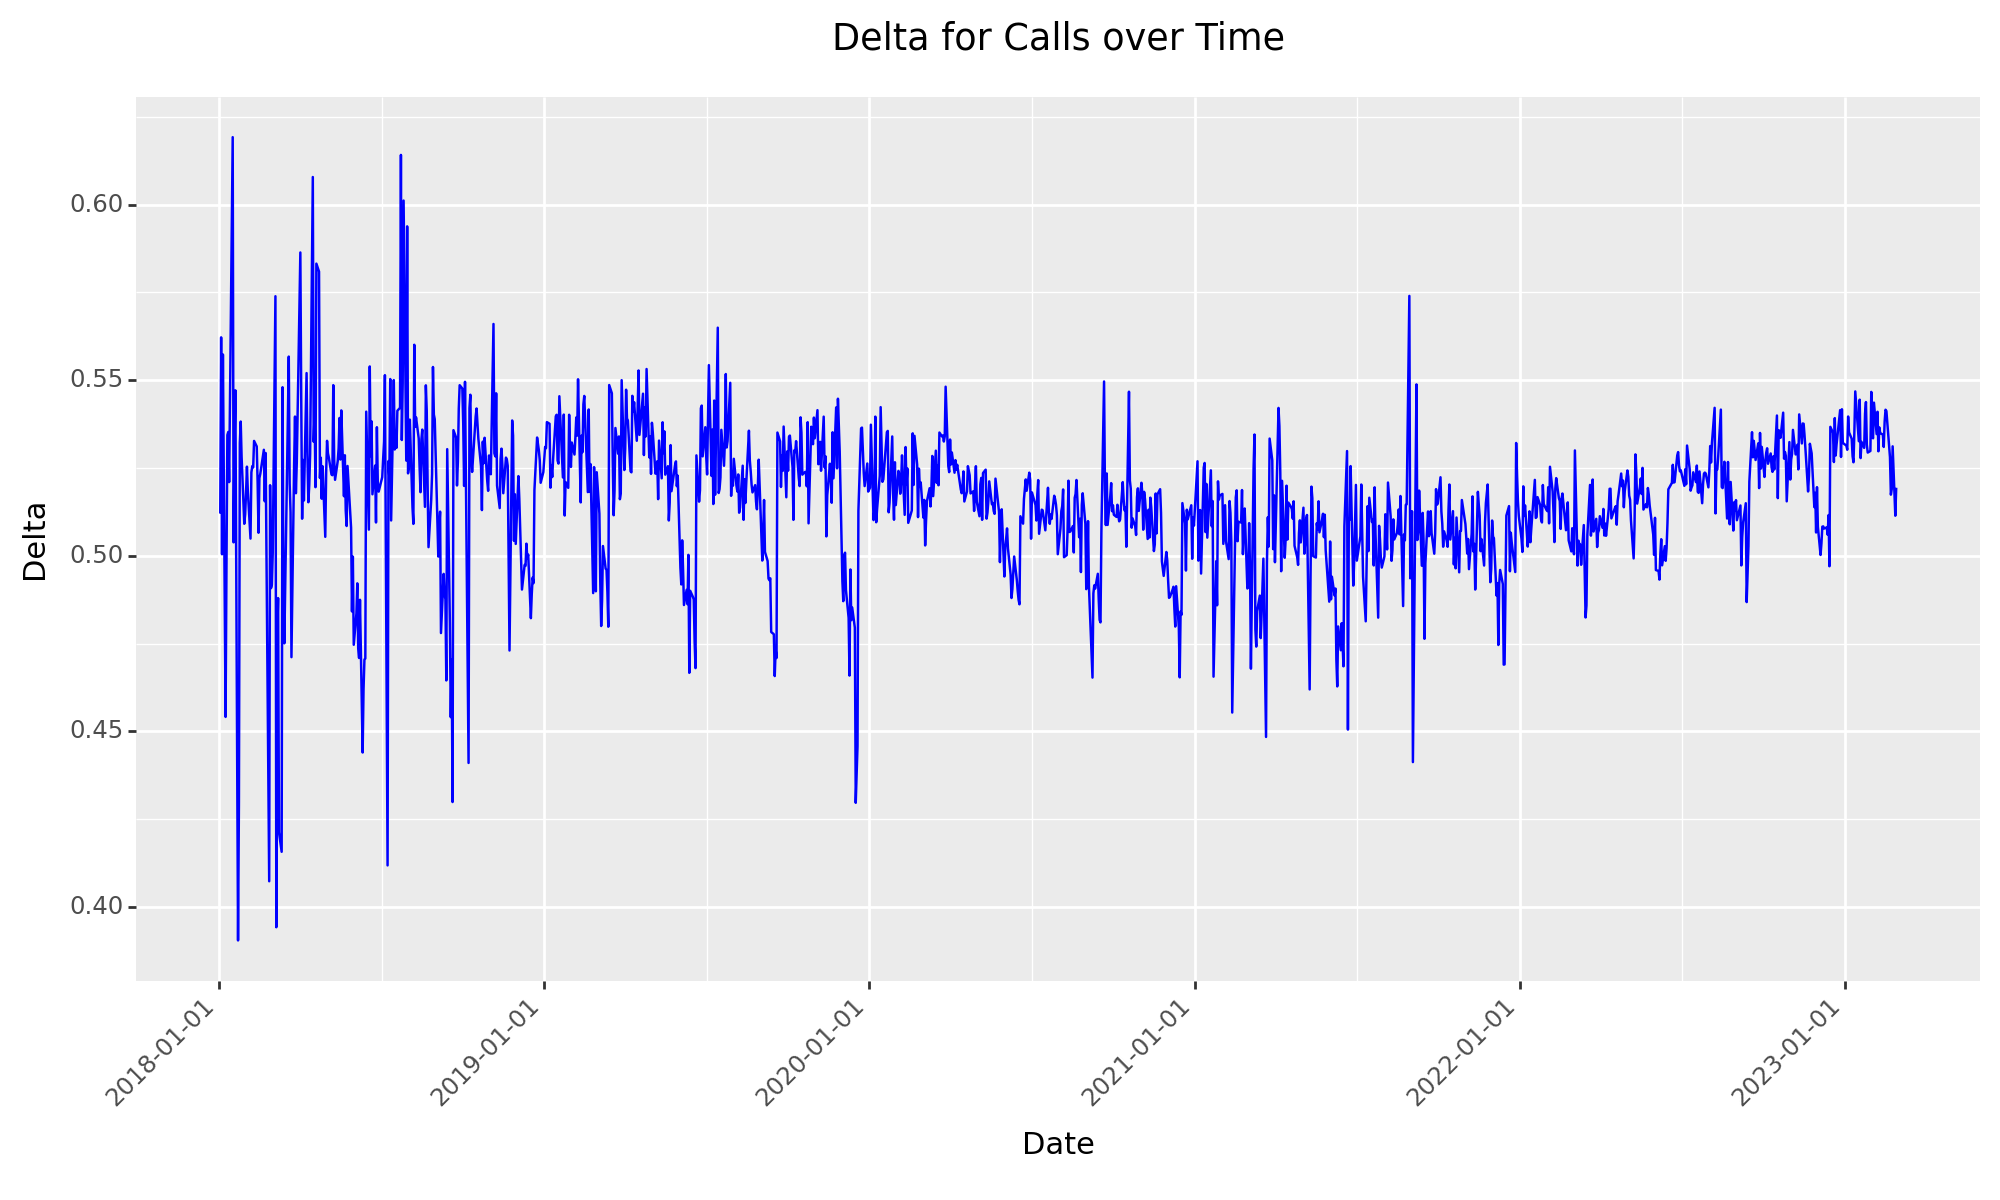

<Figure Size: (1000 x 600)>

In [4]:
p_delta_calls = (ggplot(calls_df, aes(x='date_x', y='delta_x')) +
                 geom_line(color='blue') +
                 labs(title='Delta for Calls over Time', x='Date', y='Delta', color='Type') +
                 theme(axis_text_x=element_text(rotation=45, hjust=1),
                       figure_size=(10, 6),
                       plot_title=element_text(ha='center')))
p_delta_calls

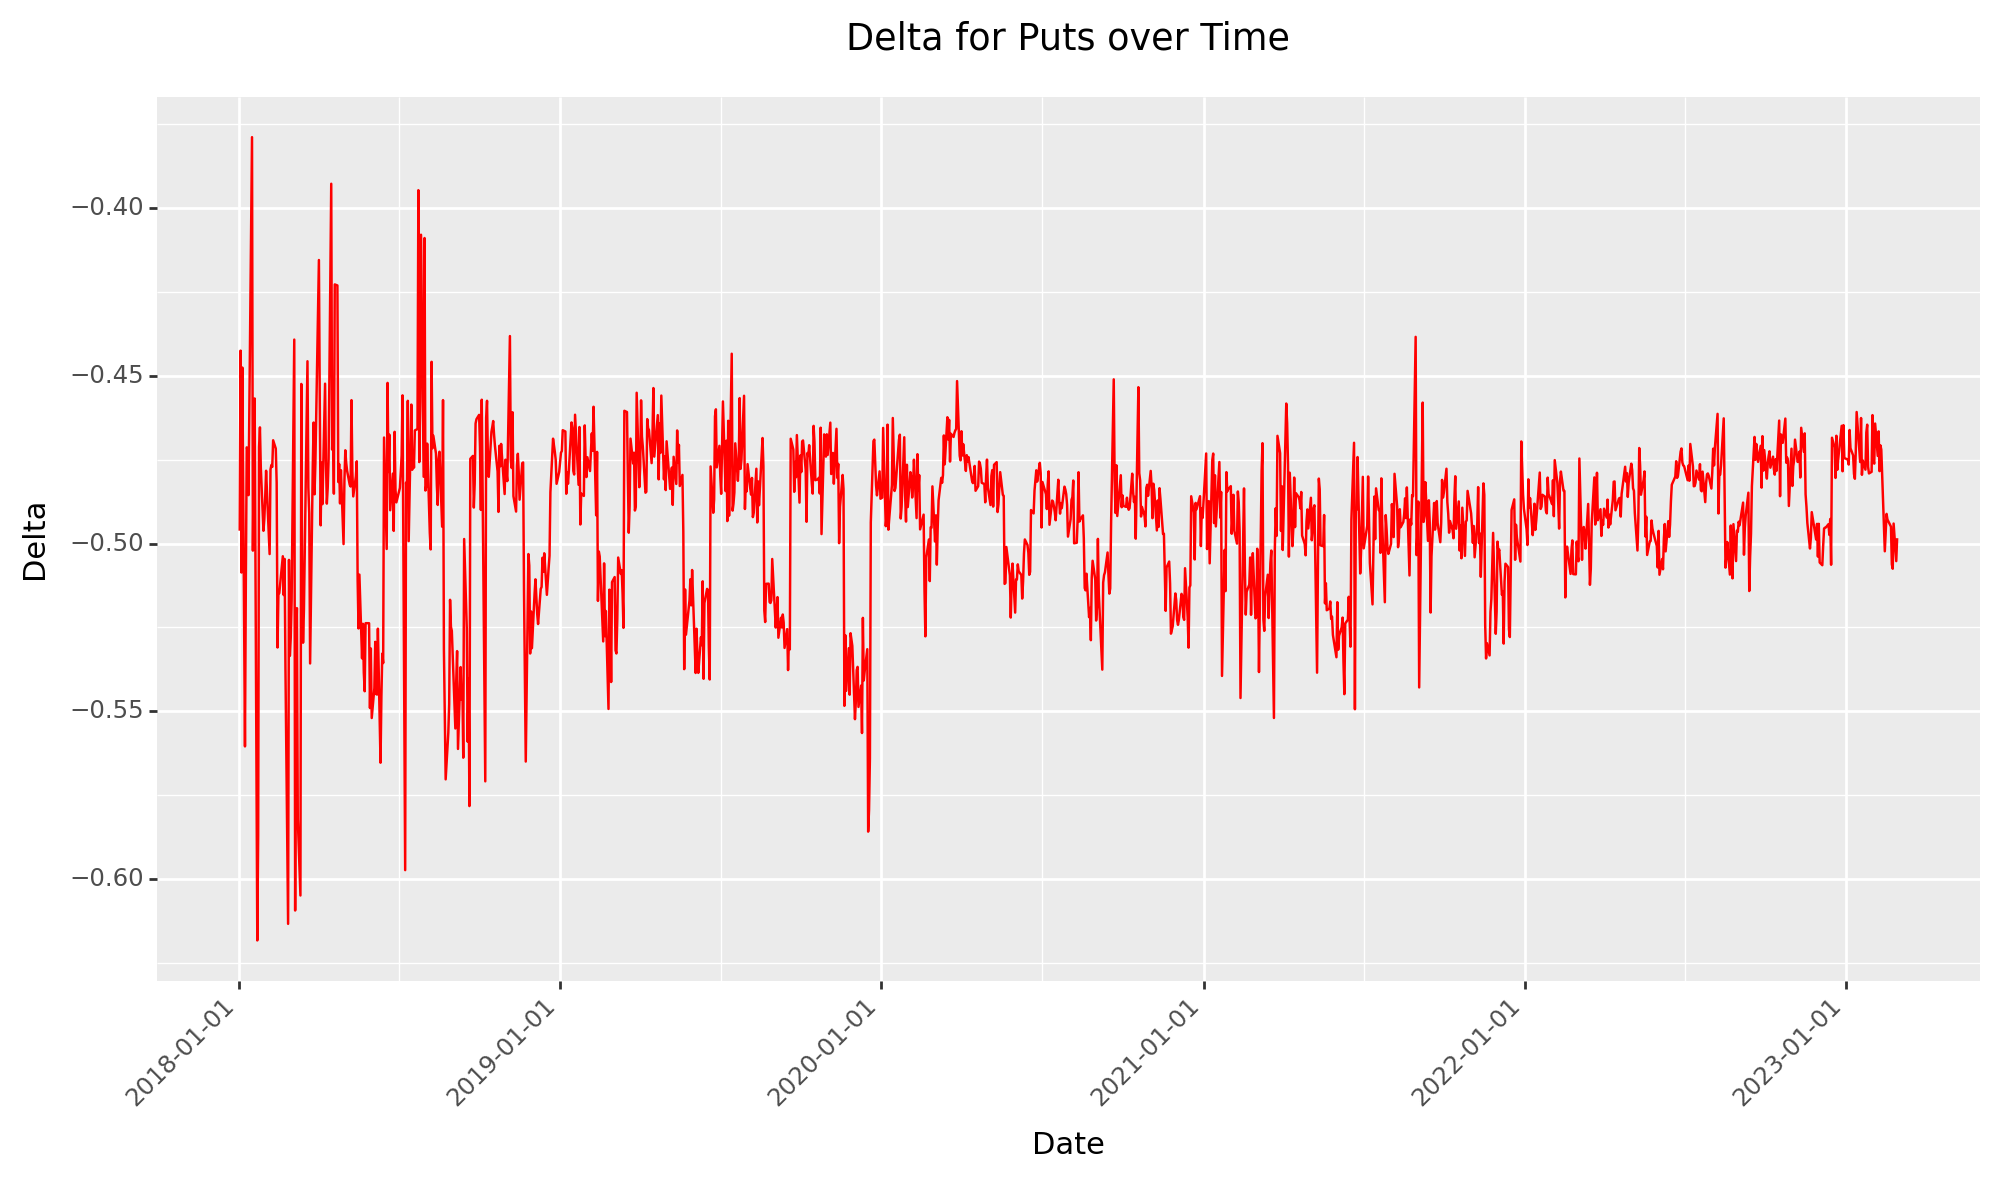

<Figure Size: (1000 x 600)>

In [5]:
p_delta_puts = (ggplot(puts_df, aes(x='date_x', y='delta_x')) +
                geom_line(color='red') +
                labs(title='Delta for Puts over Time', x='Date', y='Delta', color='Type') +
                theme(axis_text_x=element_text(rotation=45, hjust=1),
                      figure_size=(10, 6),
                      plot_title=element_text(ha='center')))
p_delta_puts

We can see that at-the-money calls and puts center around a magnitude of 0.5 delta. There also appears seasonality.

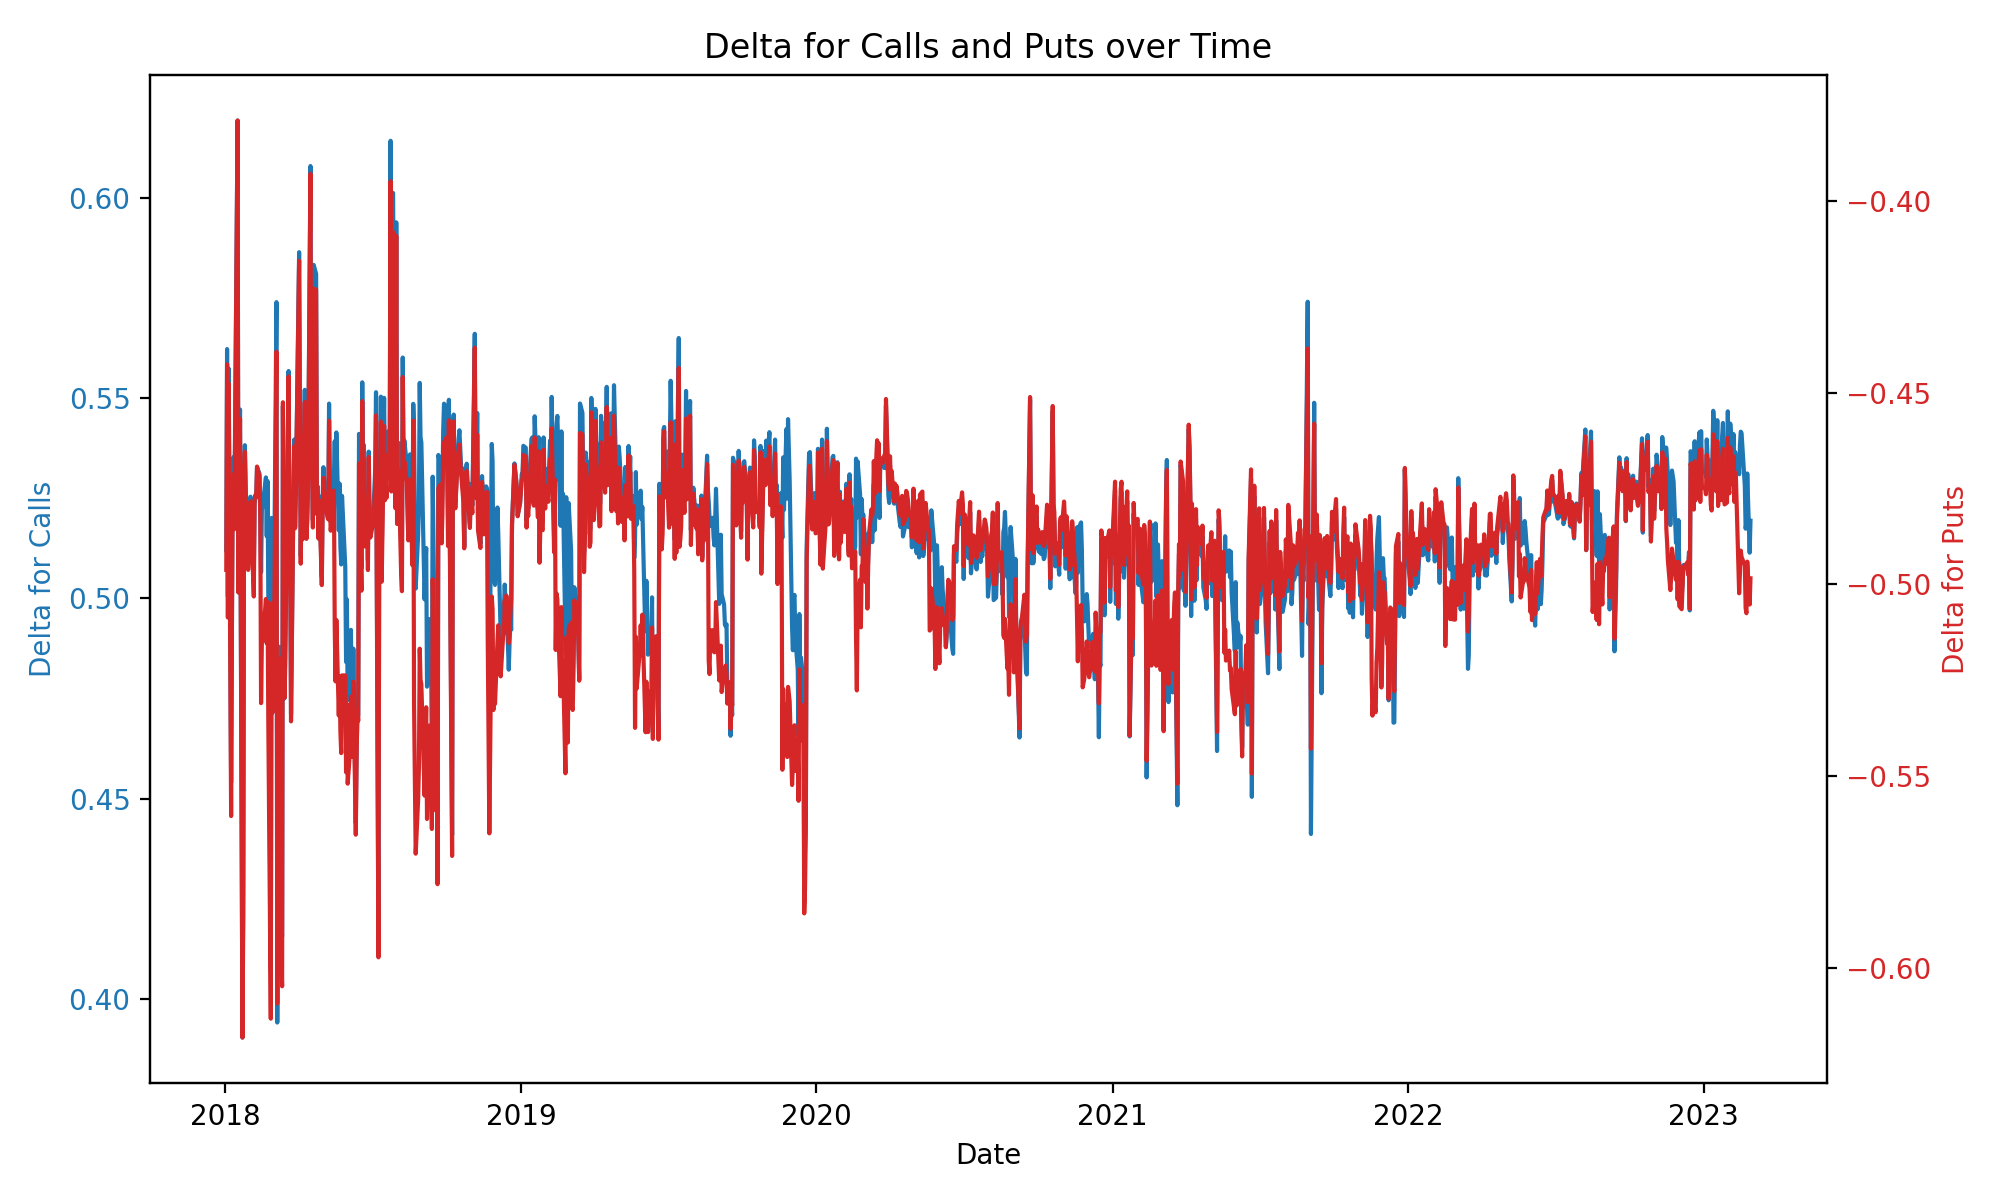

In [6]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Delta for Calls on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Delta for Calls', color=color)
ax1.plot(calls_df['date_x'], calls_df['delta_x'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Delta for Puts
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Delta for Puts', color=color)
ax2.plot(puts_df['date_x'], puts_df['delta_x'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
plt.title('Delta for Calls and Puts over Time')
fig.tight_layout()

plt.show()

We can see that at-the-money calls and puts have similar gamma across multiple times. There also appears to be a regime shift, where gamma is noticably lower post-COVID.

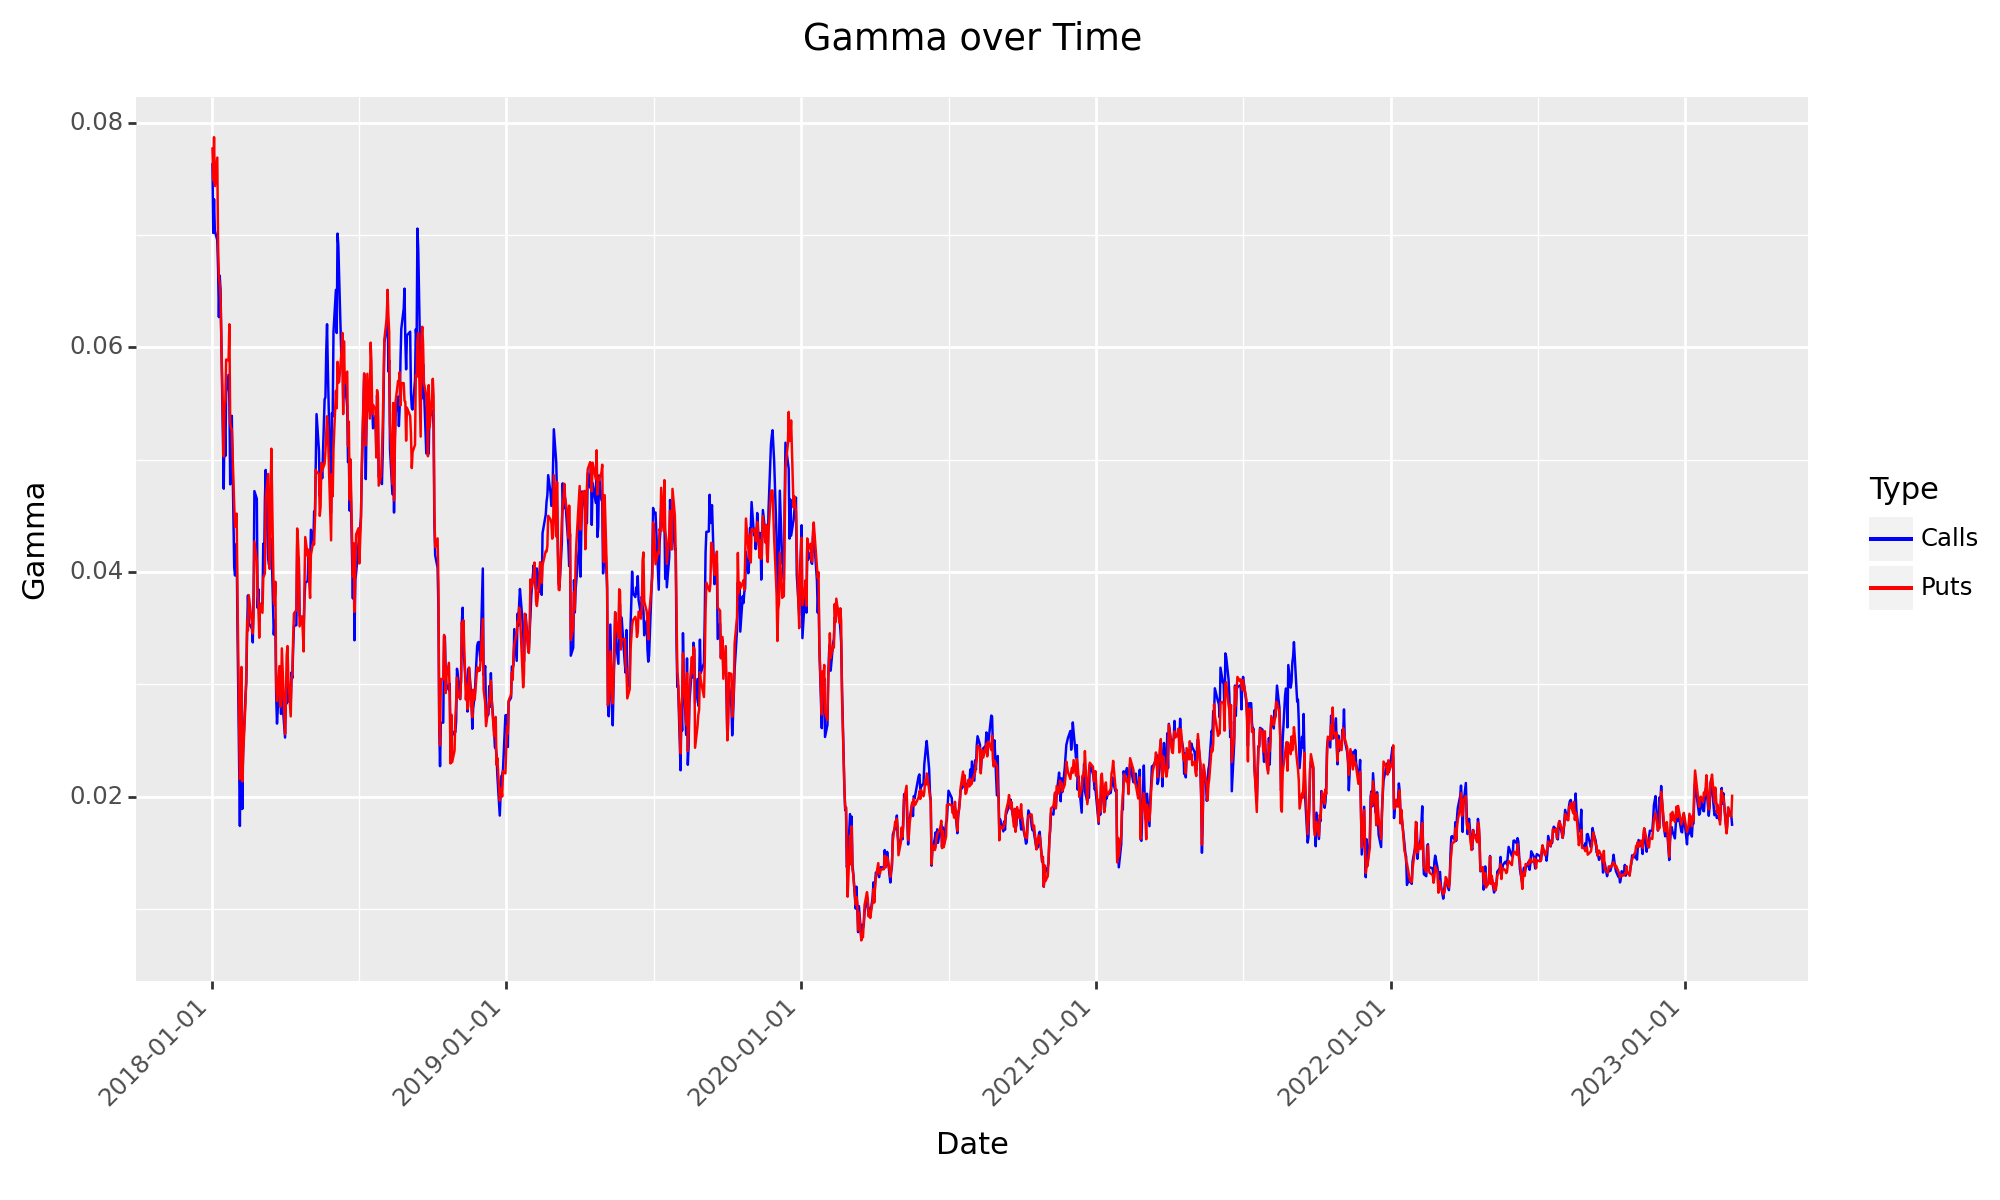

<Figure Size: (1000 x 600)>

In [7]:
p_gamma = (ggplot(combined_df, aes(x='date_x', y='gamma_x', color='Type')) +
           geom_line() +
           labs(title='Gamma over Time', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Calls": "blue", "Puts": "red"}))
p_gamma

We can see that implied volatility has remained largely flat until the spike during COVID, and it has largely regressed back to pre-pandemic levels albeit perhaps slightly elevated.

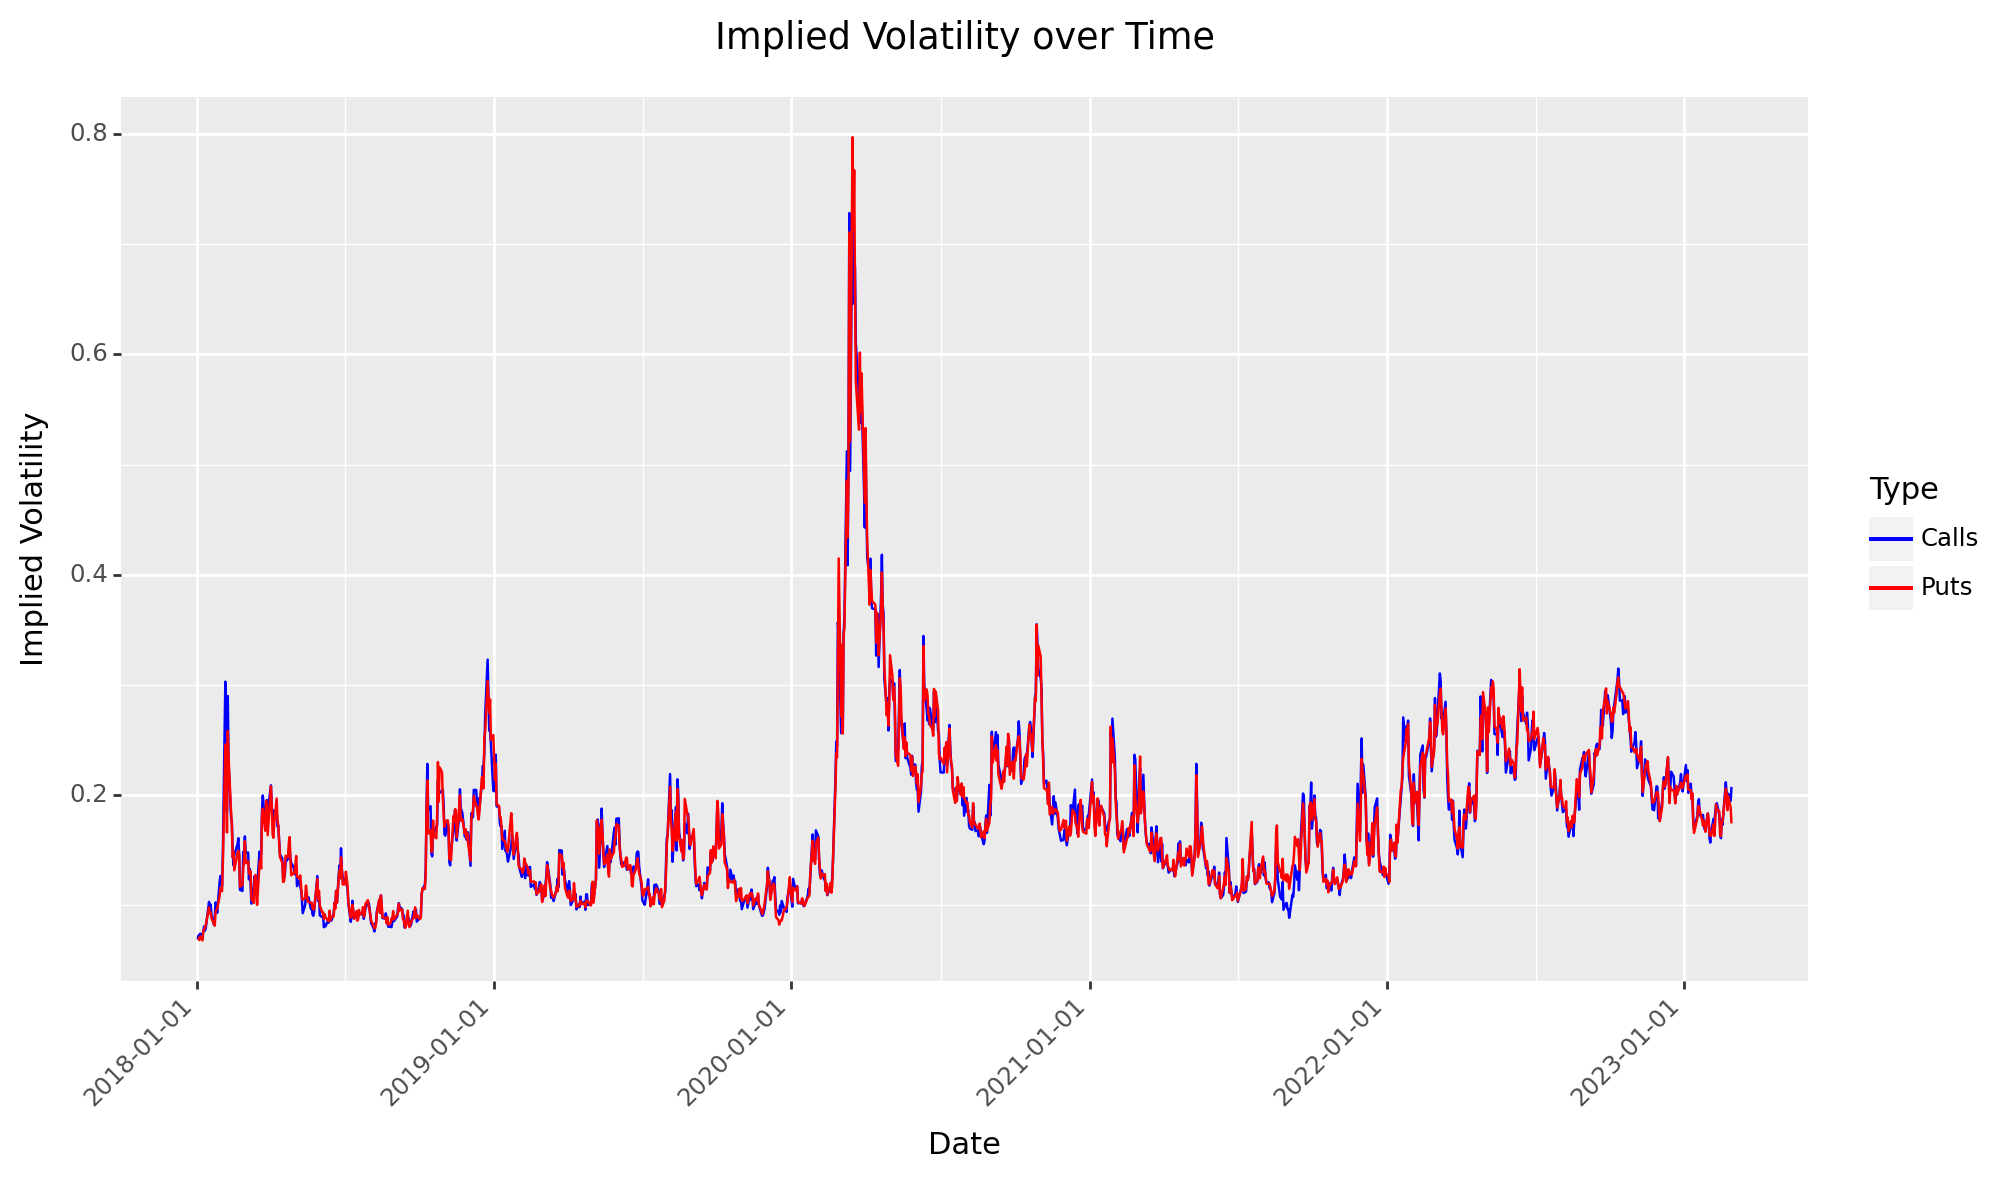

<Figure Size: (1000 x 600)>

In [8]:
p_impl_volatility = (ggplot(combined_df, aes(x='date_x', y='impl_volatility_x', color='Type')) +
                     geom_line() +
                     labs(title='Implied Volatility over Time', x='Date', y='Implied Volatility', color='Type') +
                     theme(axis_text_x=element_text(rotation=45, hjust=1),
                           figure_size=(10, 6),
                           plot_title=element_text(ha='center')) +
                     scale_color_manual(values={"Calls": "blue", "Puts": "red"}))
p_impl_volatility

### Delta, Gamma, and IV for Individual Pairs opened ATM

We'll select a few examples of individual option pairs that we may use for straddles from the beginning, middle, and end sections of the data, and take a look at their progression over time (of the same contracts for our holding period).

In [2]:
calls = pd.read_csv('calls.csv')
puts = pd.read_csv('puts.csv')
datapull = pd.read_csv('spy_tickerdata.csv')
csv_file_path = 'option_data.csv'
spydata = pd.read_csv(csv_file_path)

In [3]:
spydata['date']=pd.to_datetime(spydata['date'], format = '%Y-%m-%d')
spydata['exdate']=pd.to_datetime(spydata['exdate'], format = '%Y-%m-%d')
spydata['dte'] = (spydata['exdate'] - spydata['date']).dt.days
mapping = {'C': 'Call', 'P': 'Put'}
spydata['Type'] = spydata['cp_flag'].map(mapping)

In [4]:
datapull[datapull['date'] == '2018-03-06']

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
6104,SPY,2018-03-06,273.3,273.39,271.18,272.88,78407902.0,0.0,1.0,246.987725,247.06906,245.071831,246.608161,78407902.0


In [5]:
calls[calls['date_x'] == '2021-02-08']

,date_x,exdate,last_date_x,cp_flag,strike_price,best_bid_x,best_offer_x,volume_x,open_interest_x,impl_volatility_x,...,vega_x,theta_x,expiry_indicator_x,close_x,adj_open_x,adj_close_x,adj_volume_x,TTE_x,close_date,is_present
780,2021-02-08,2021-03-10,2021-02-08,C,391.0,6.8,6.88,19.0,3.0,0.157962,...,44.66742,-43.18171,w,390.51,372.256242,373.442045,37887680.0,30,2021-03-01,True


In [6]:
first_options = spydata[(spydata['exdate'] == '2018-04-04') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 275000)]
middle_options = spydata[(spydata['exdate'] == '2021-03-10') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 391000)]
last_options = spydata[(spydata['exdate'] == '2022-07-06') & (spydata['dte'] < 30) & (spydata['dte'] >=7) & (spydata['strike_price'] == 412000)]

In [7]:
first_options = first_options.dropna()
middle_options = middle_options.dropna()
last_options = last_options.dropna()

From the Delta Graphs below we can see that our positions open with call and put deltas each close to one half. As we hold the positions, the underlying moves up or down, and we can see the delta values diverge from one half and go either up or down. Our trading strategy will rebalance by buying and selling the underlying as the delta values change to keep a consistent portfolio Gamma. 

Note that under put-call parity, the Delta of a call option is always exactly 1 greater than the delta of a put option. In practice, this is almost always true, but with slight delays or lags/exceptions between time points.

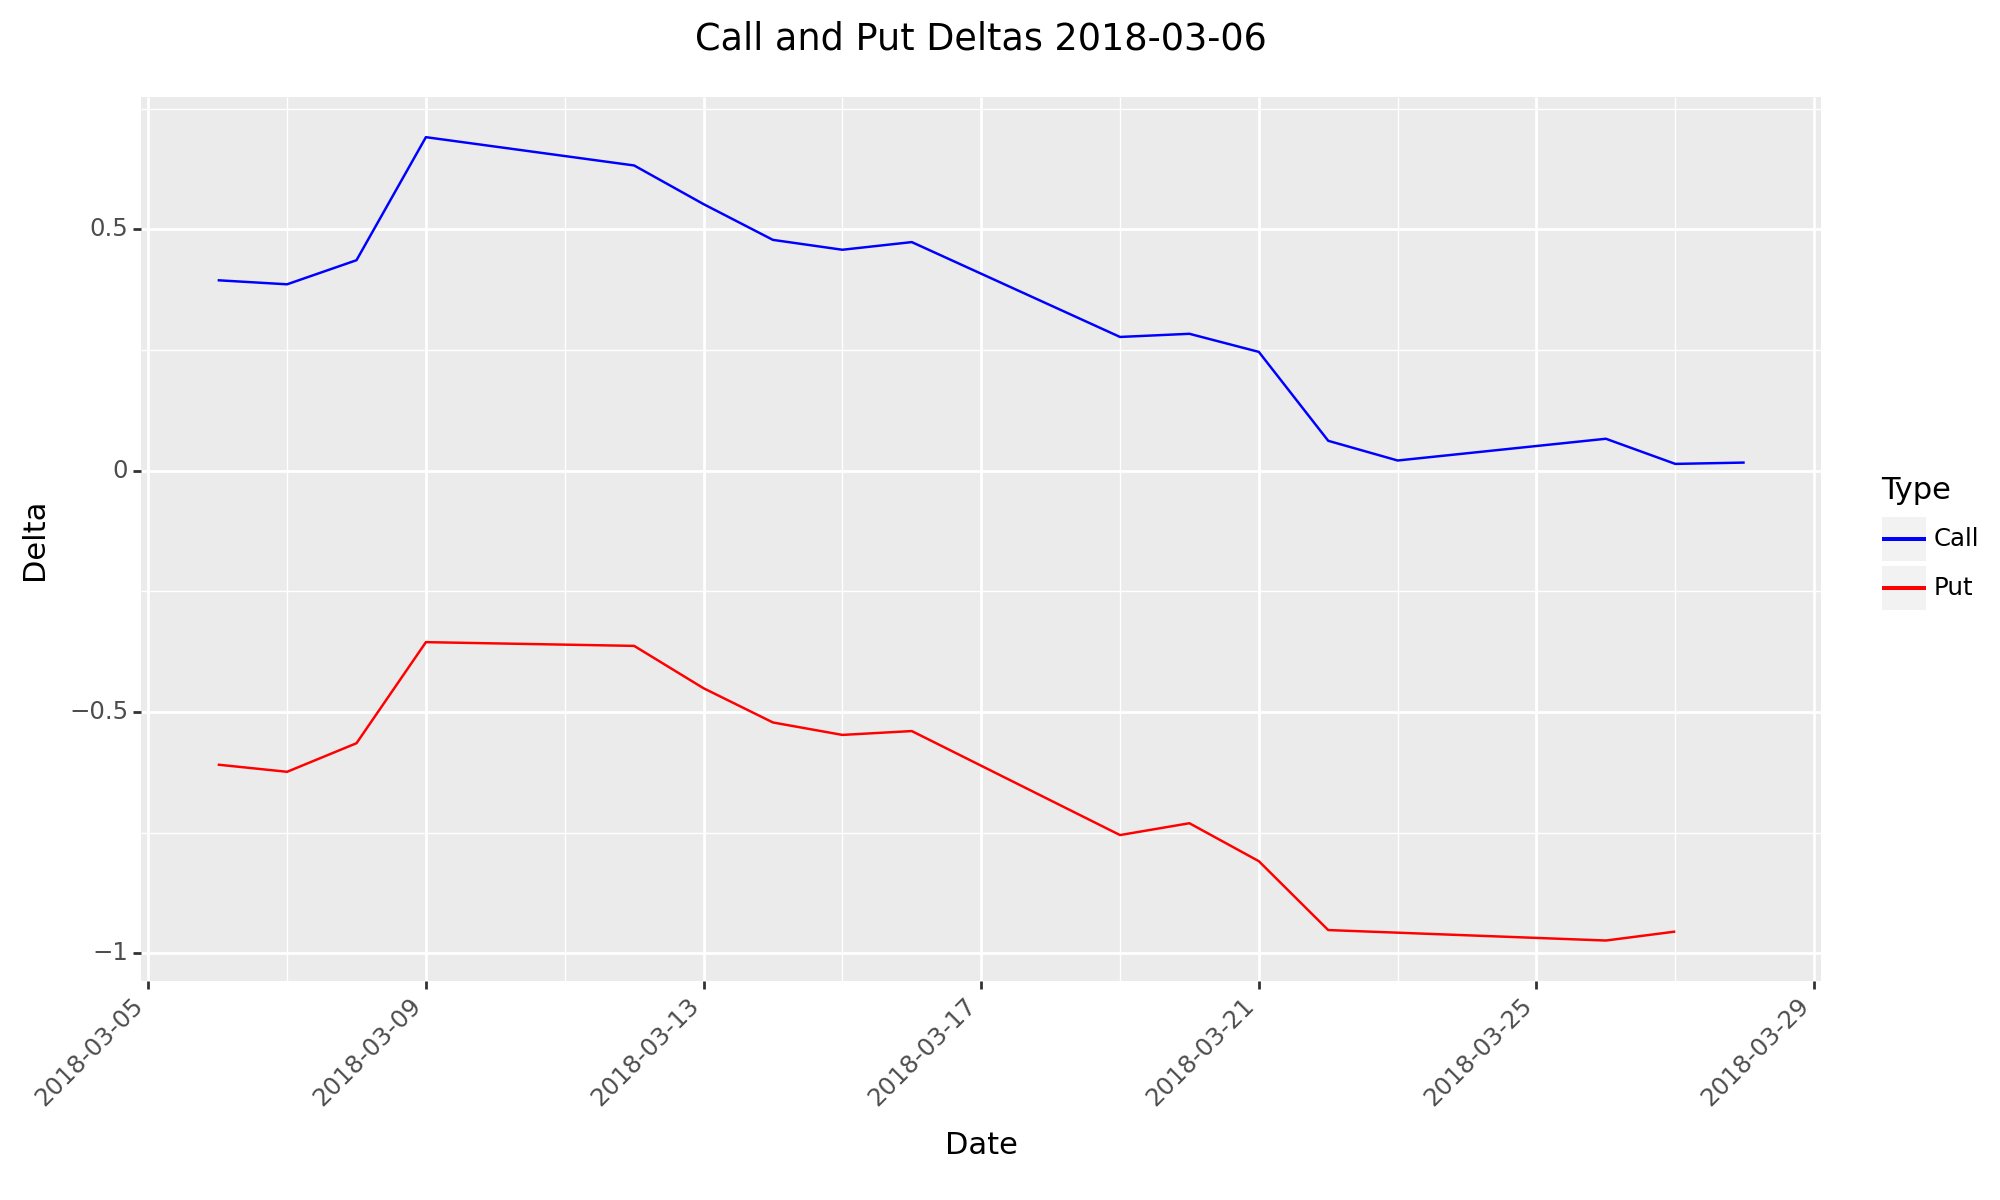

<Figure Size: (1000 x 600)>

In [8]:
p_d_1 = (ggplot(first_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2018-03-06', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_1

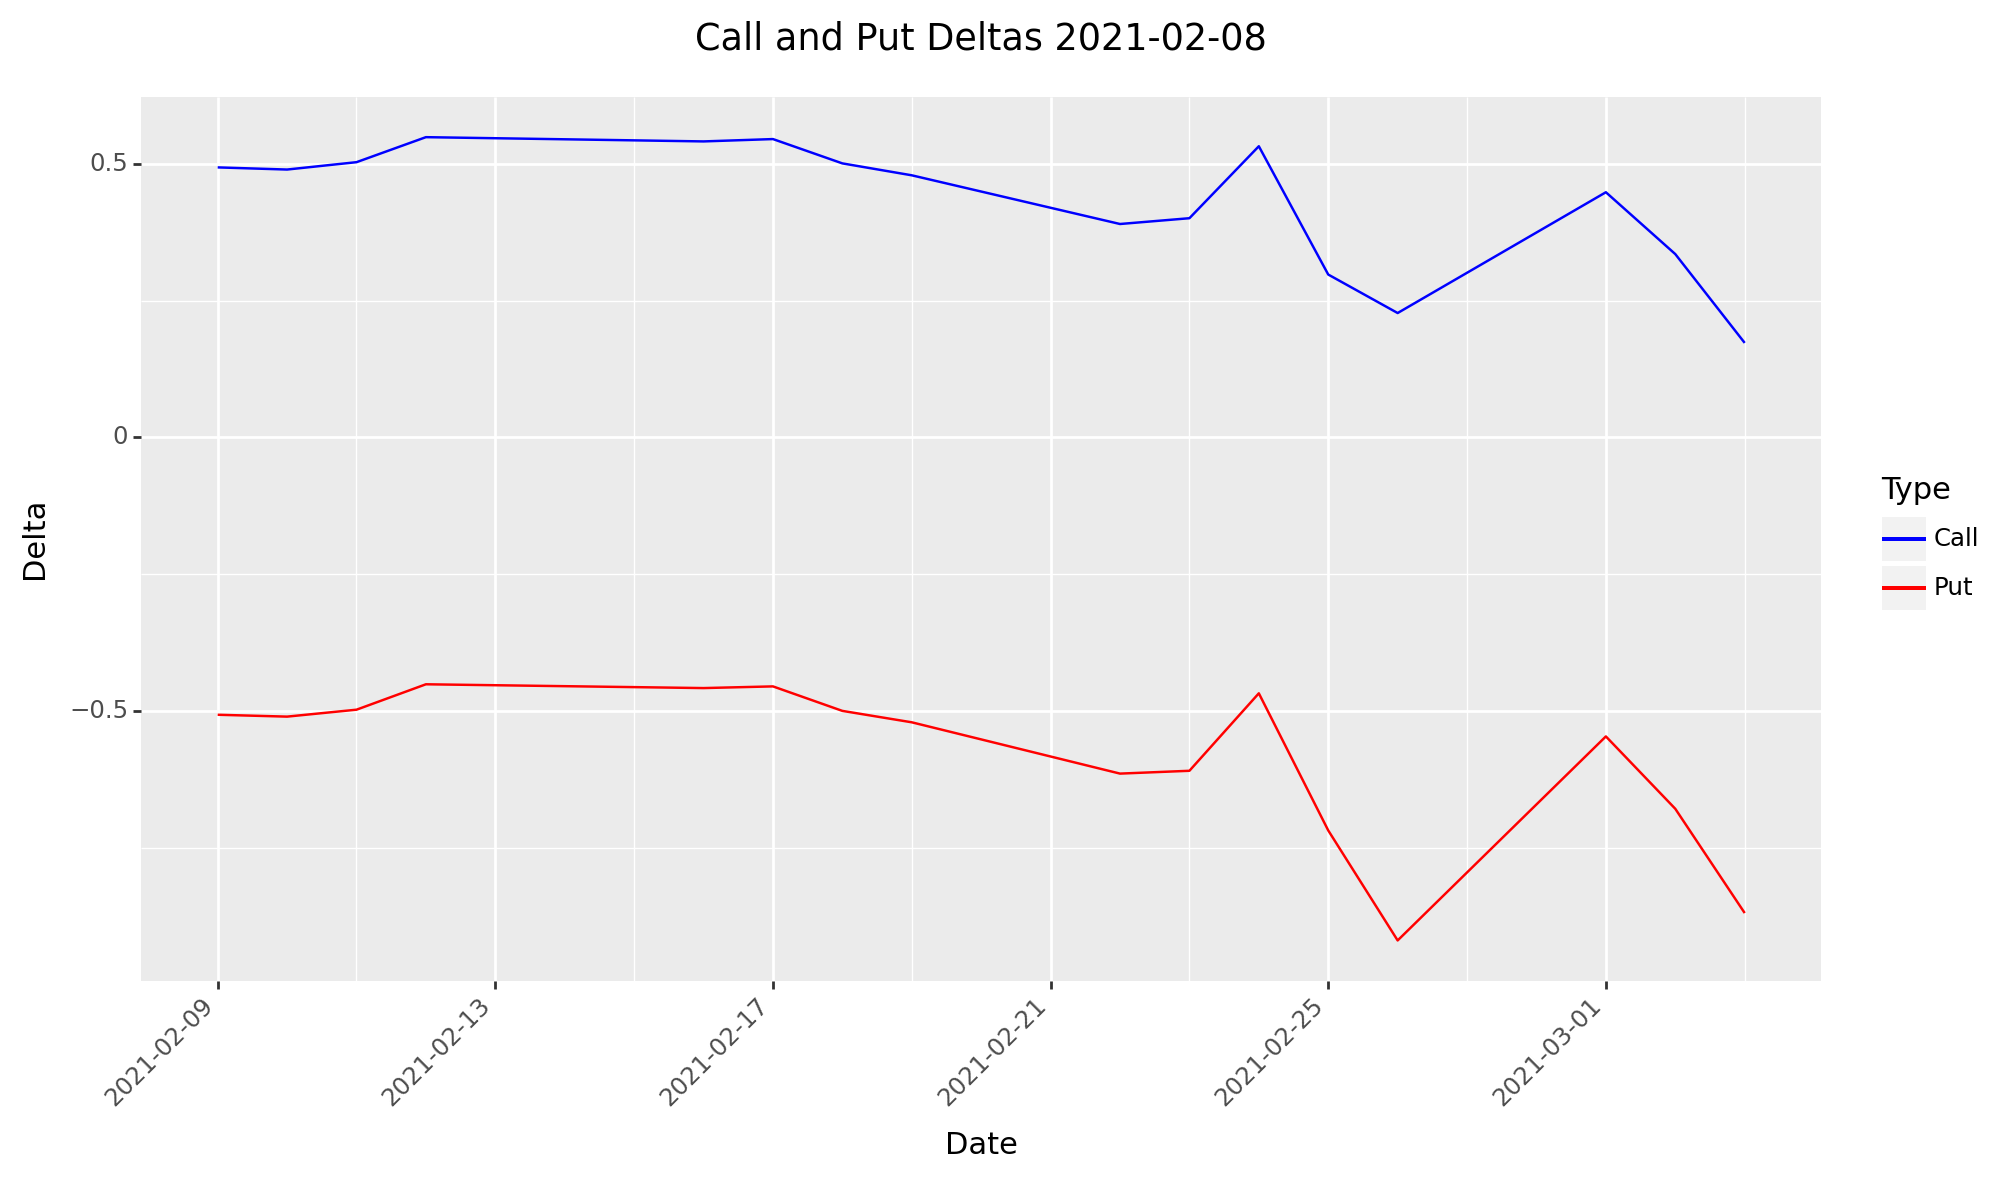

<Figure Size: (1000 x 600)>

In [9]:
p_d_2 = (ggplot(middle_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2021-02-08', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_2

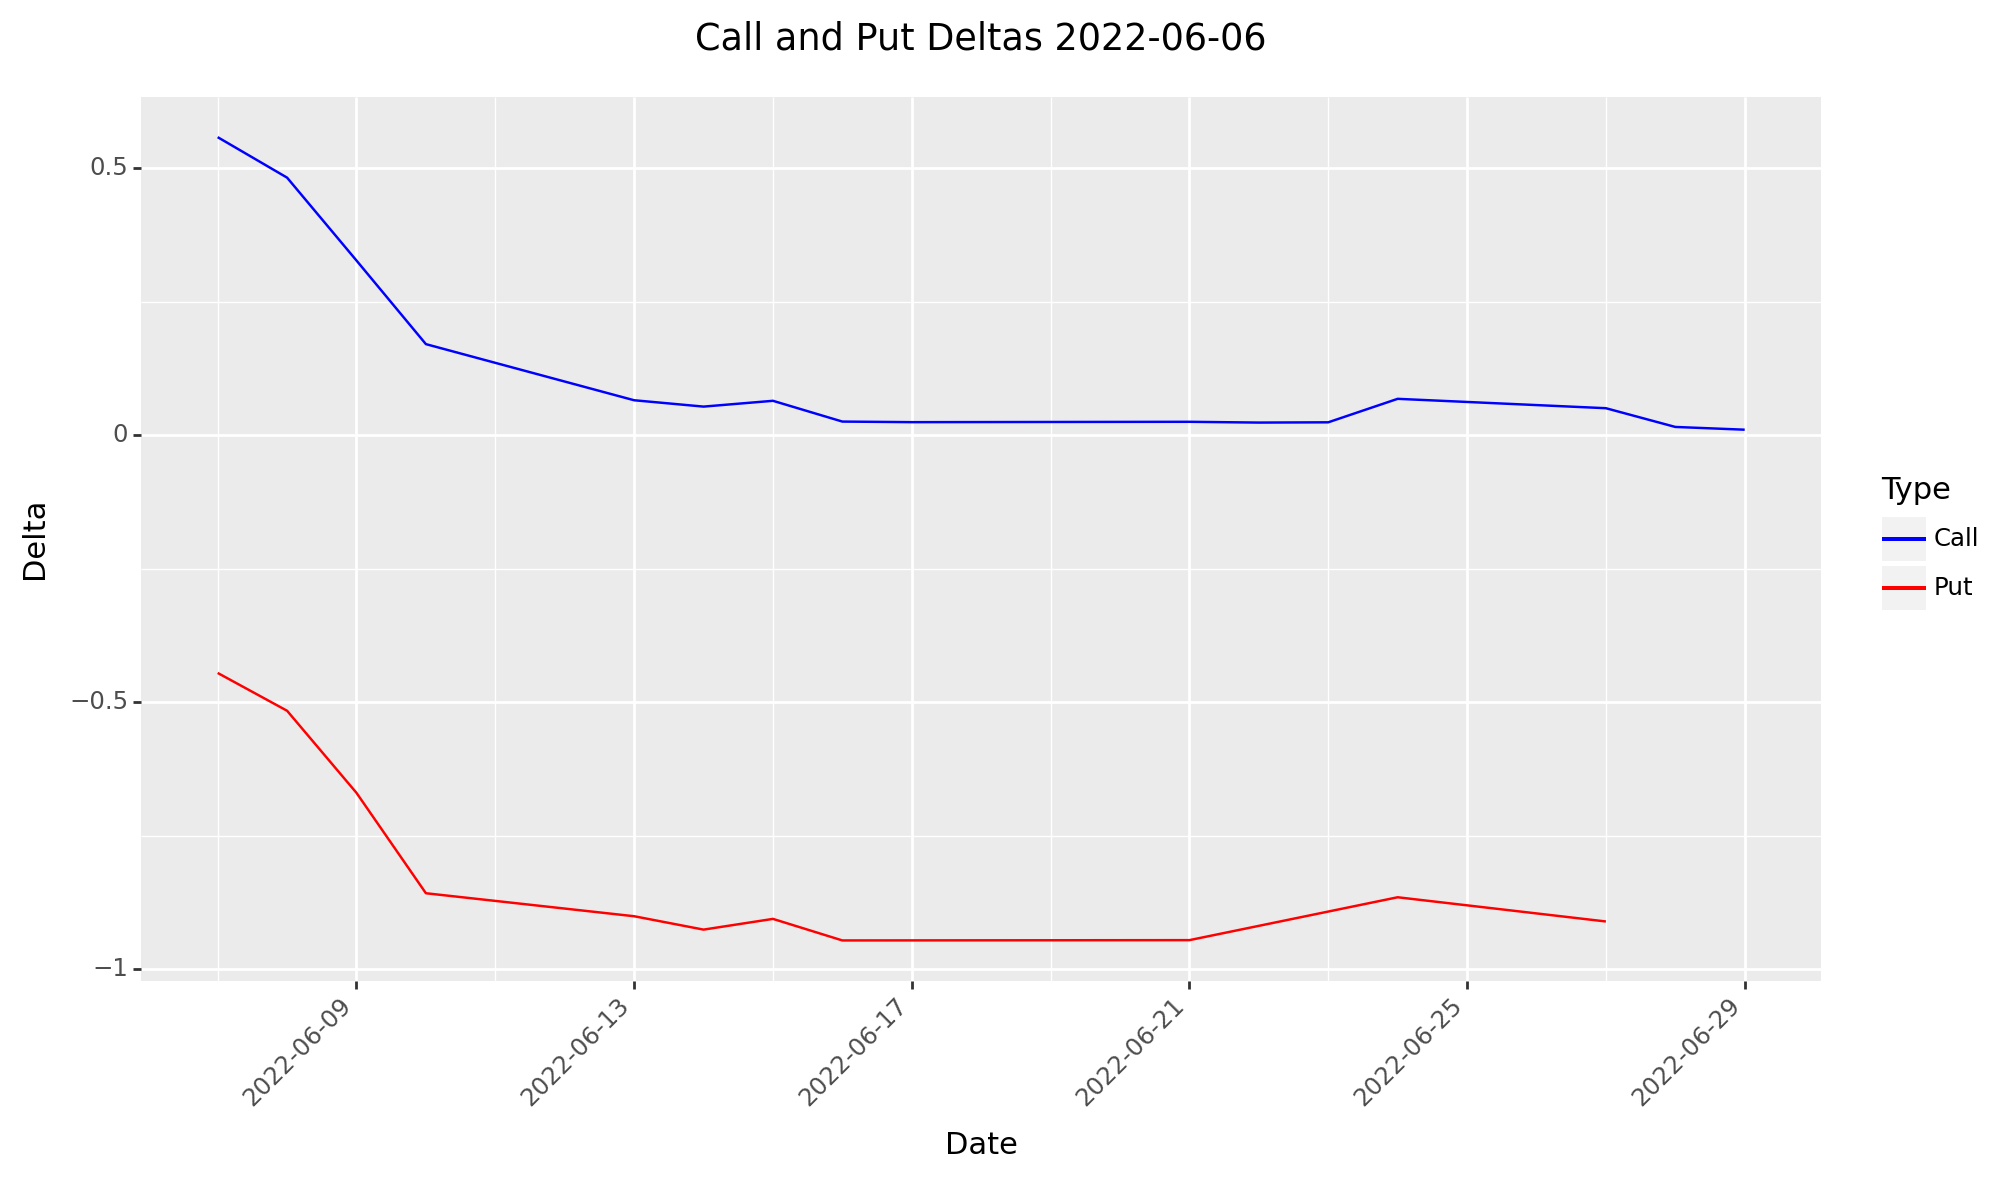

<Figure Size: (1000 x 600)>

In [10]:
p_d_3 = (ggplot(last_options, aes(x='date', y='delta', color='Type')) +
           geom_line() +
           labs(title='Call and Put Deltas 2022-06-06', x='Date', y='Delta', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_d_3

The graphs below show how Call and Put Gammas may change while we hold them. If the price of the underlying remains constant, the Gamma value will increase; if the price of the underlying decreases, the Gamma value will decrease. Our strategy hopes to identify times when Gamma will increase or decrease with a greater magnitude than the rest of the market assumes. If we anticipate more volatility in the underlying than the market does, we will go long Gamma. Conversely, if we anticipate less volatility than the market does, we will go short Gamma.

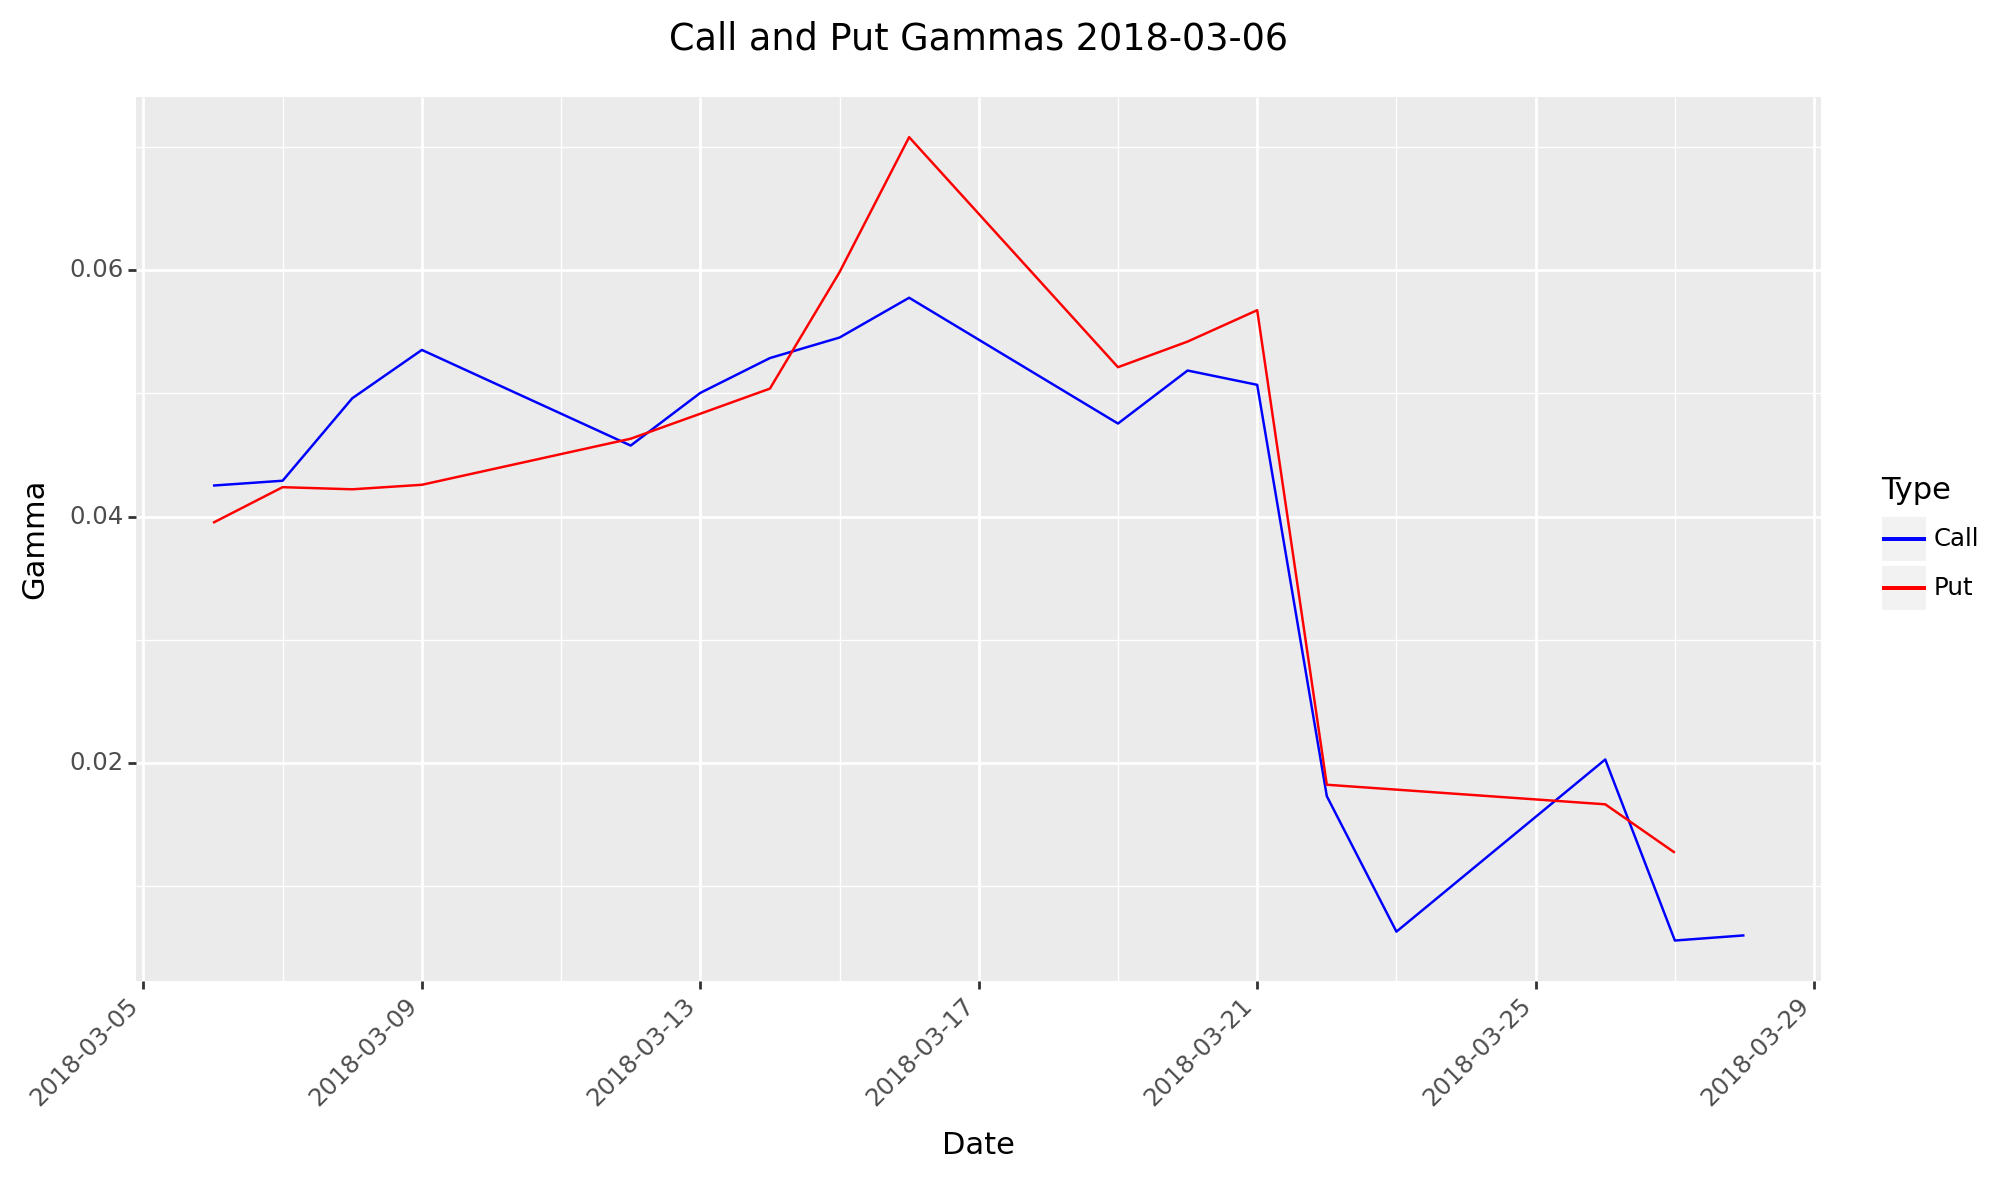

<Figure Size: (1000 x 600)>

In [11]:
p_g_1 = (ggplot(first_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2018-03-06', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_1

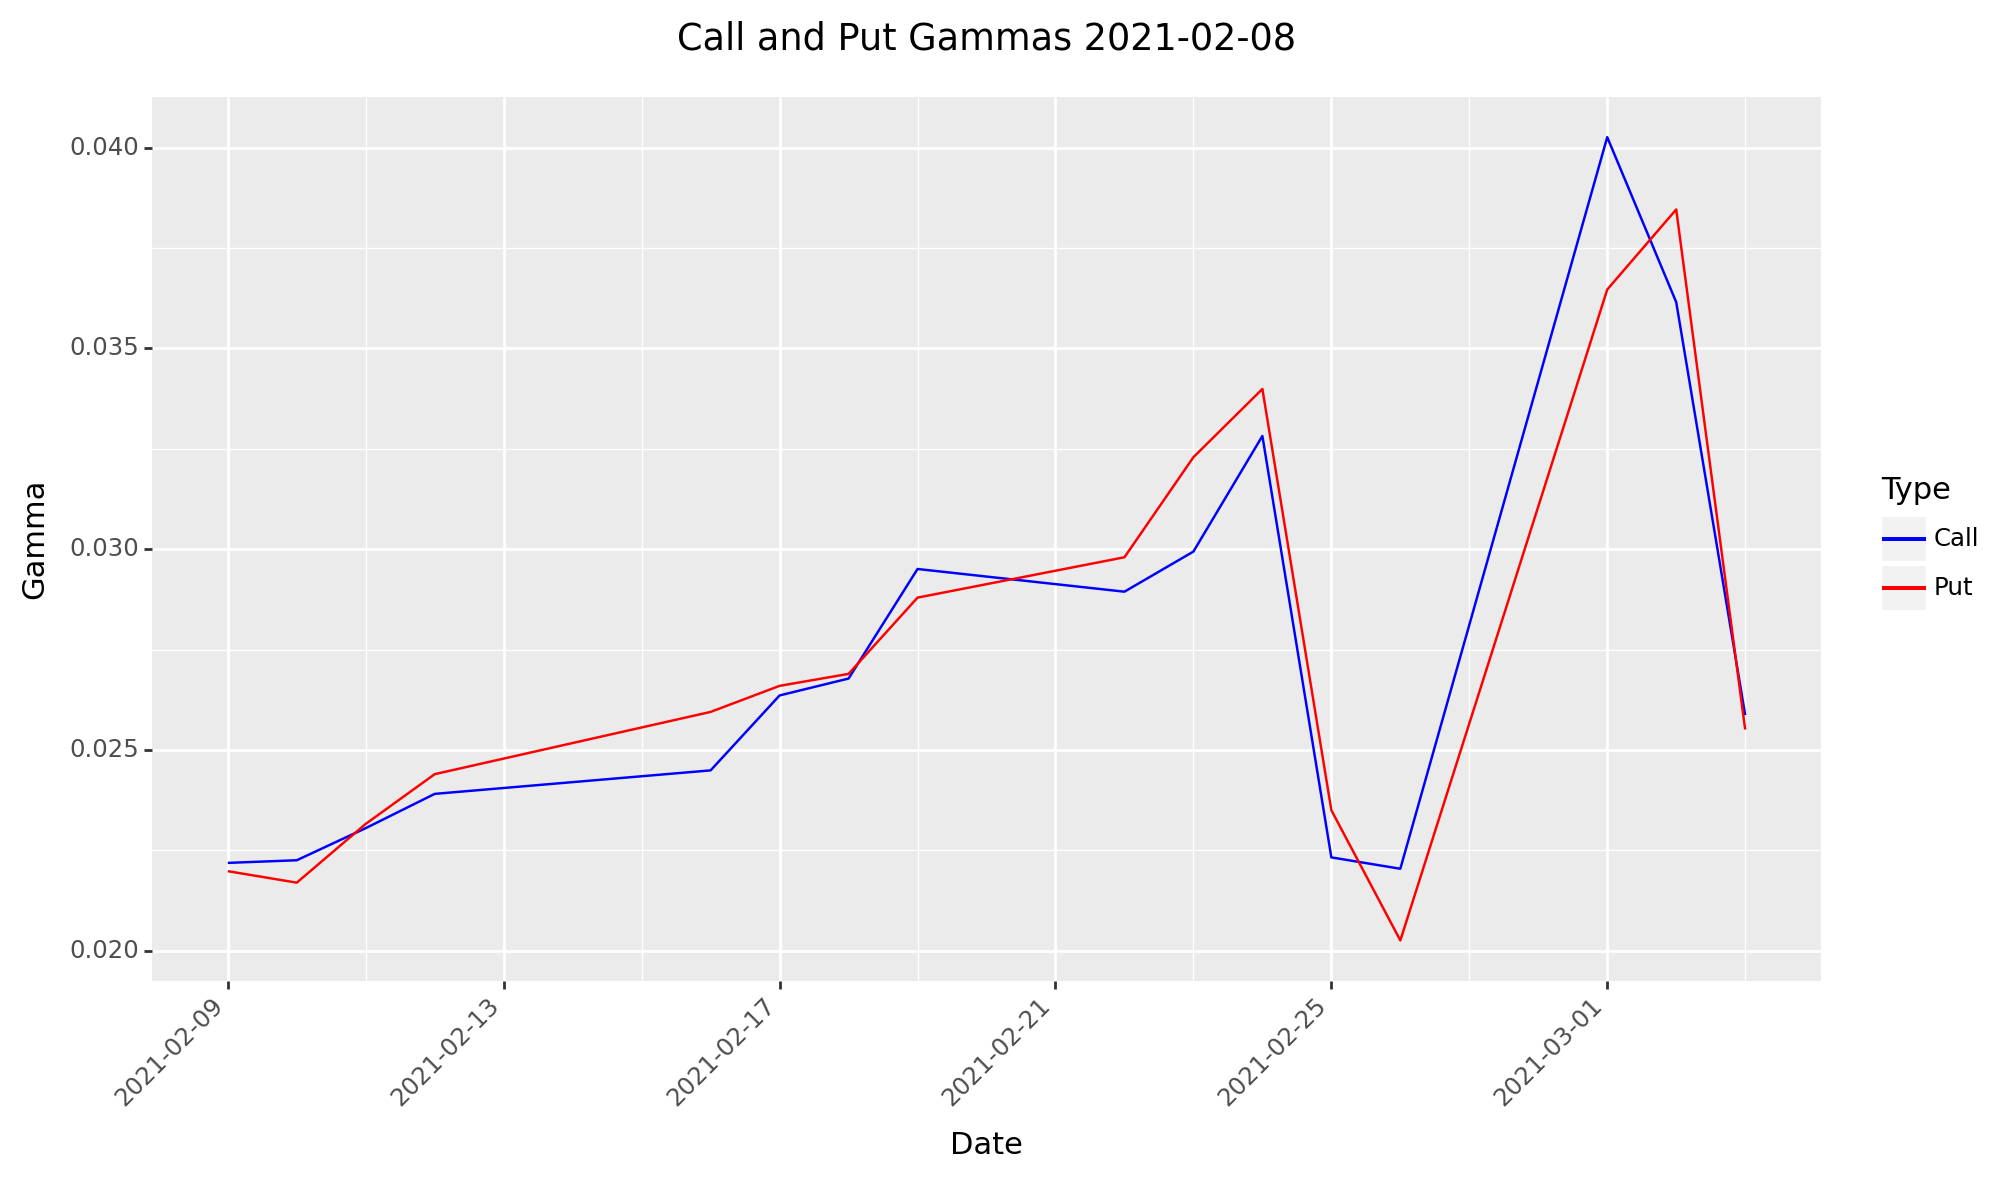

<Figure Size: (1000 x 600)>

In [12]:
p_g_2 = (ggplot(middle_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2021-02-08', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_2

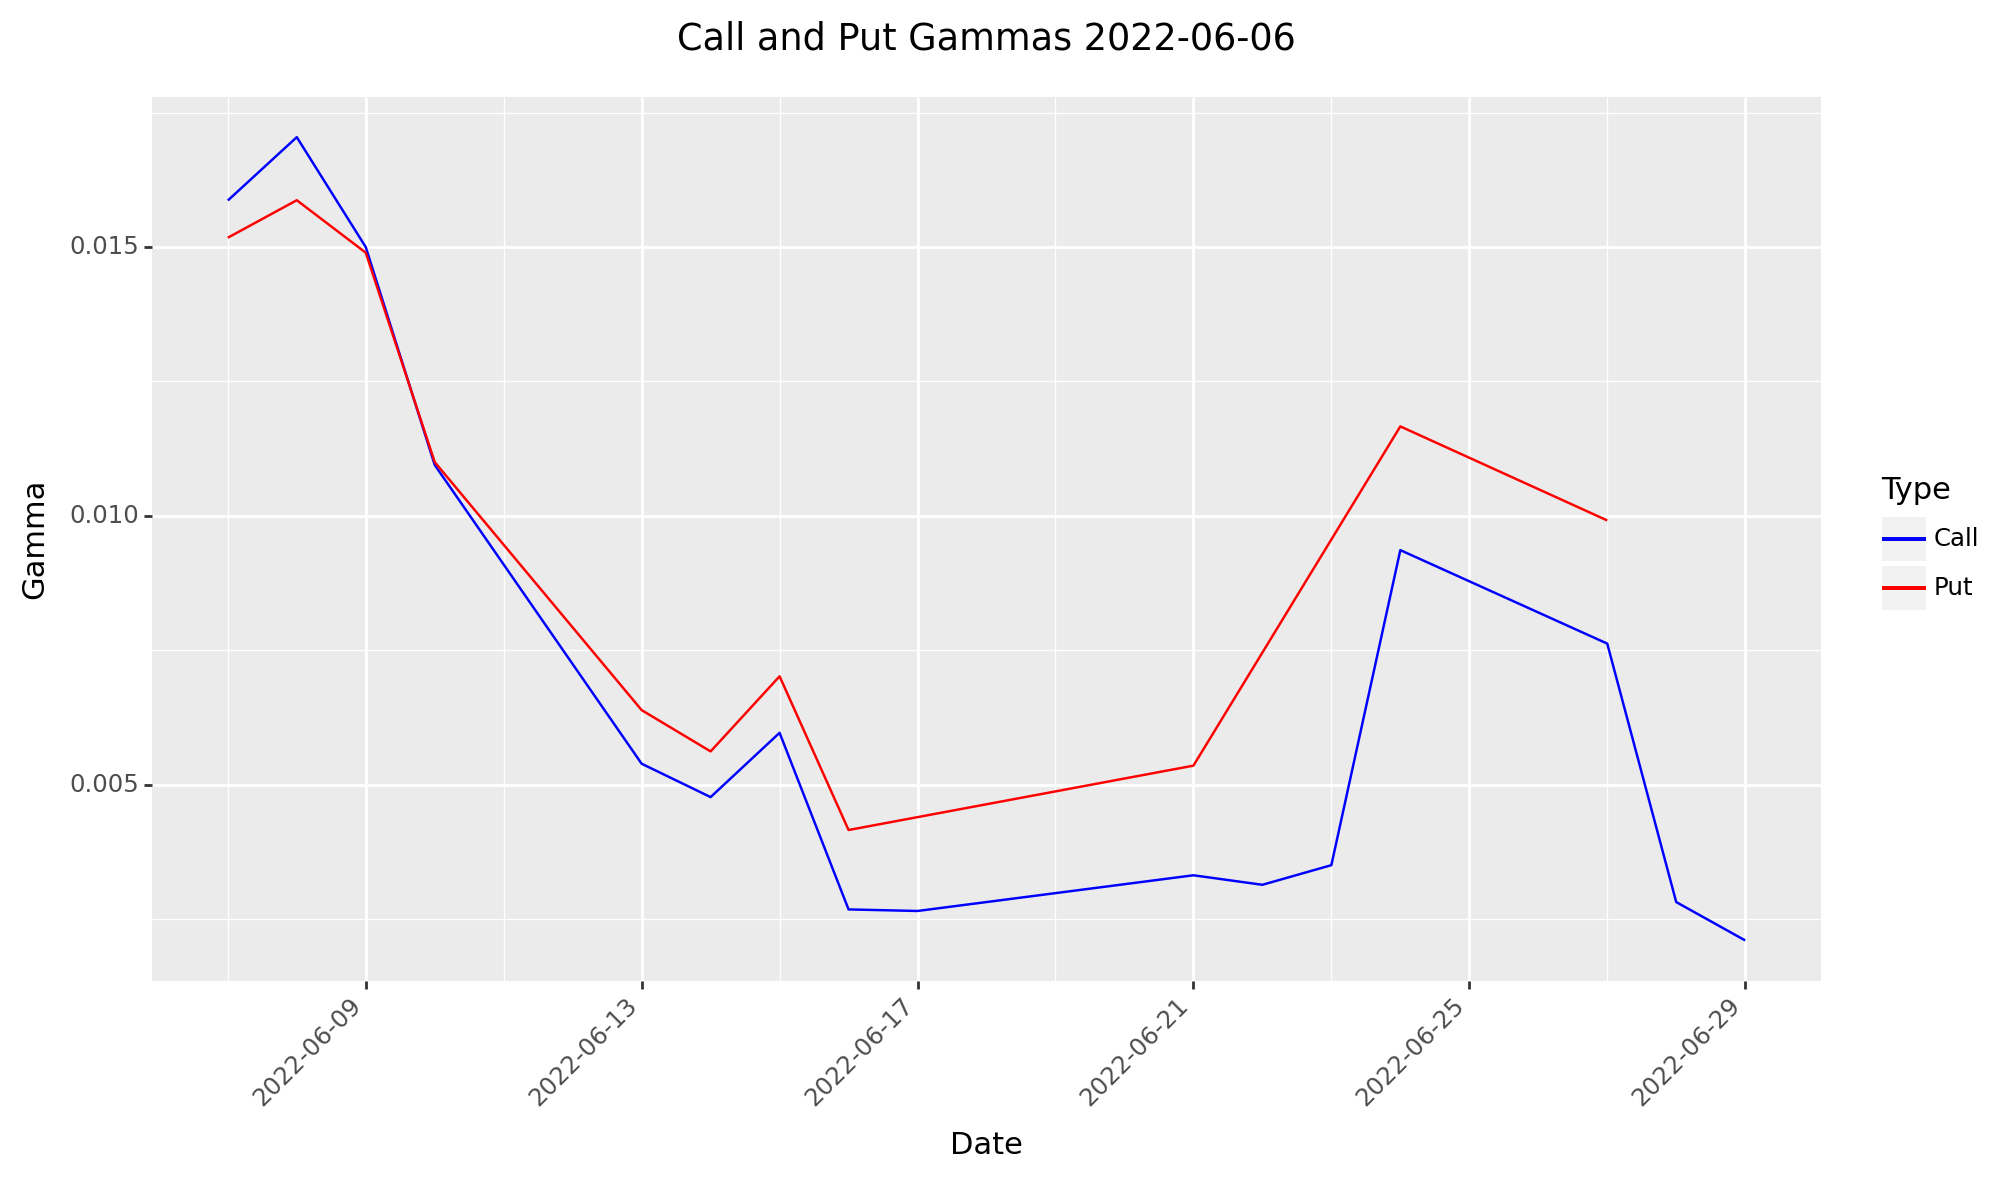

<Figure Size: (1000 x 600)>

In [13]:
p_g_3 = (ggplot(last_options, aes(x='date', y='gamma', color='Type')) +
           geom_line() +
           labs(title='Call and Put Gammas 2022-06-06', x='Date', y='Gamma', color='Type') +
           theme(axis_text_x=element_text(rotation=45, hjust=1),
                 figure_size=(10, 6),
                 plot_title=element_text(ha='center')) +
           scale_color_manual(values={"Call": "blue", "Put": "red"}))
p_g_3

### Volume and Open Interest for Individual Days

We can also visualize the volume and open interest for various strikes on single days - for consistency, we can take a look at the same few days we visualized above.

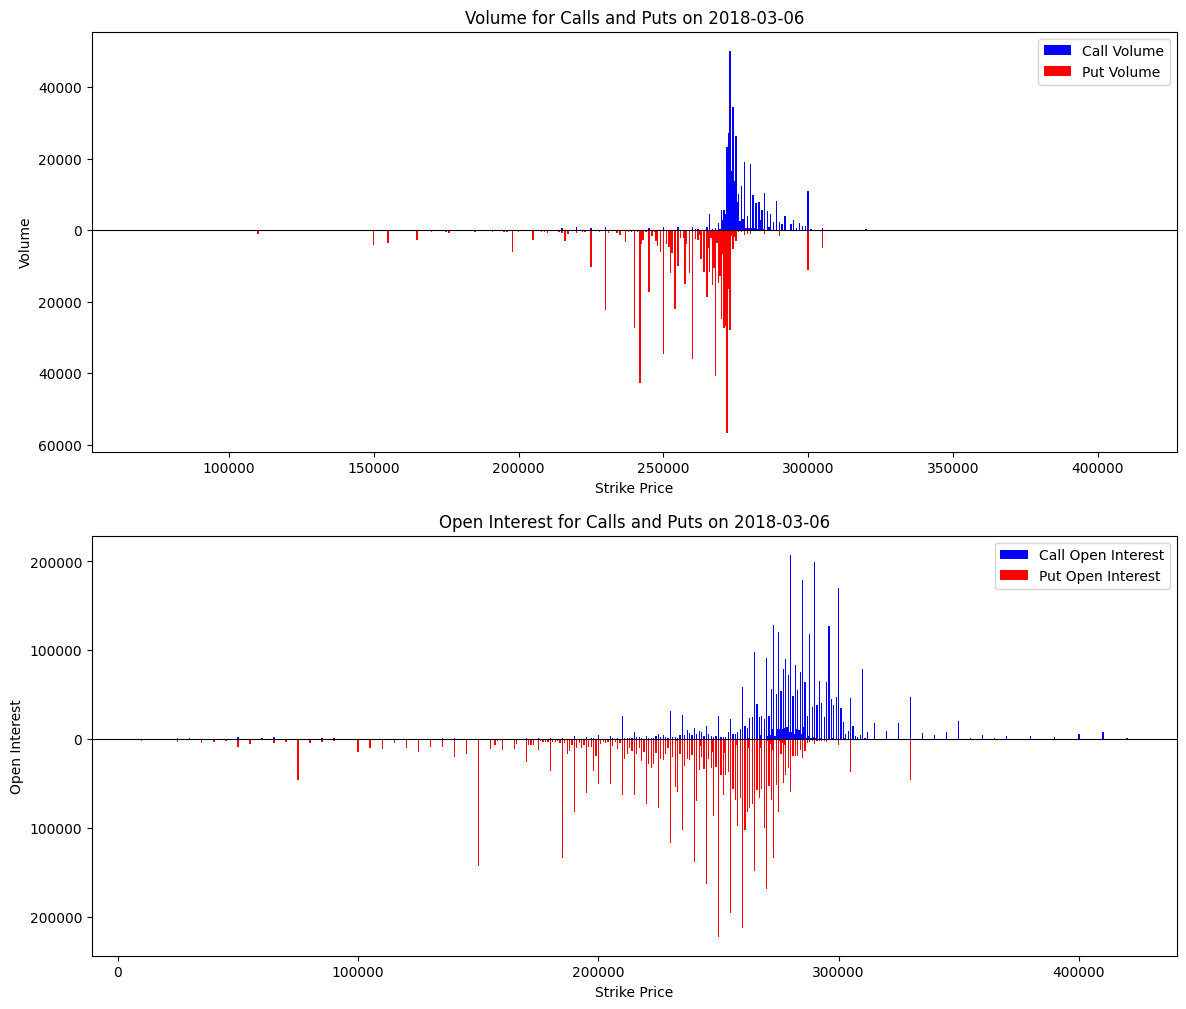

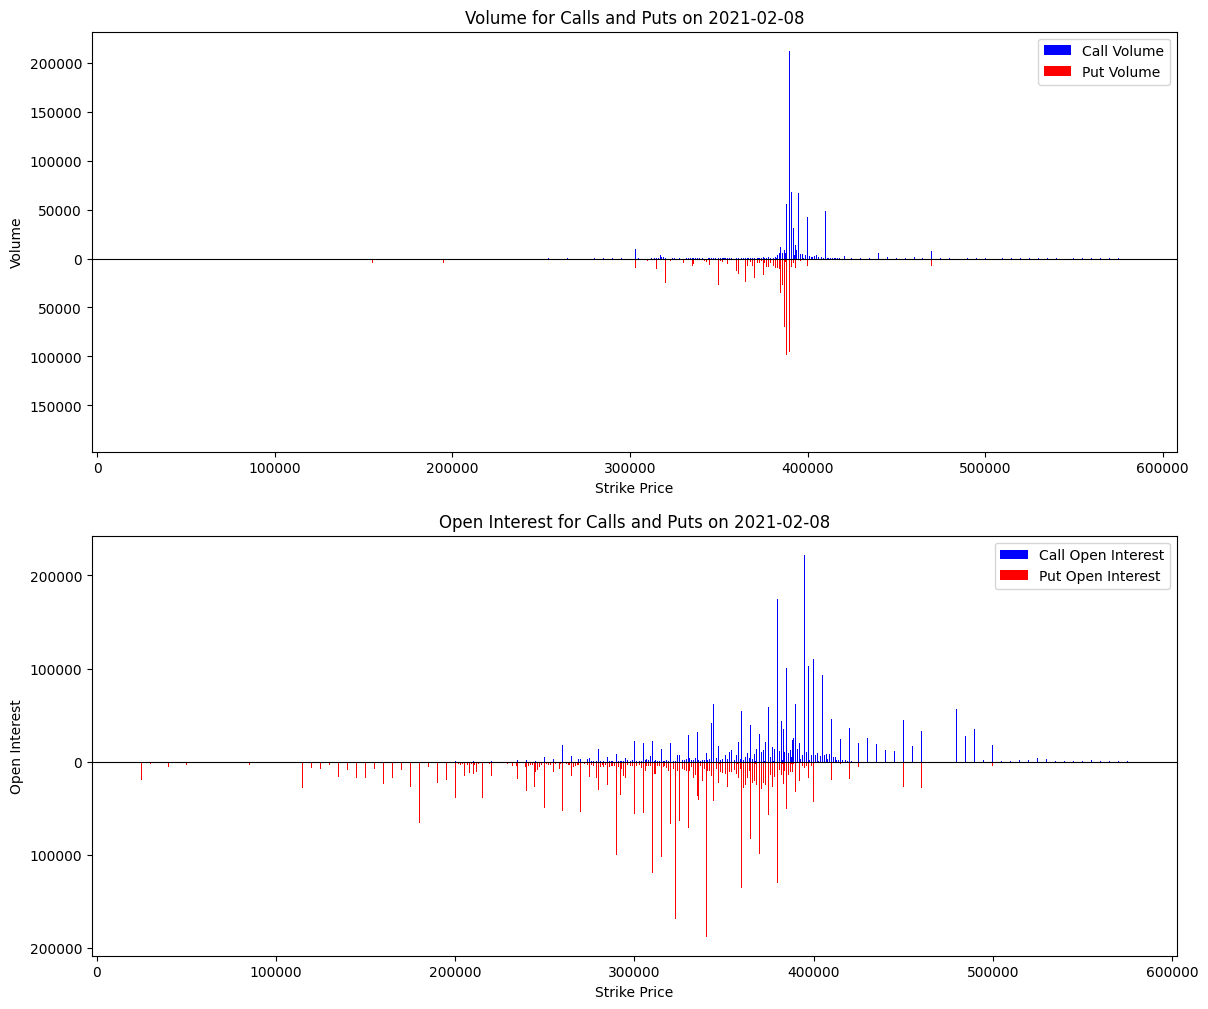

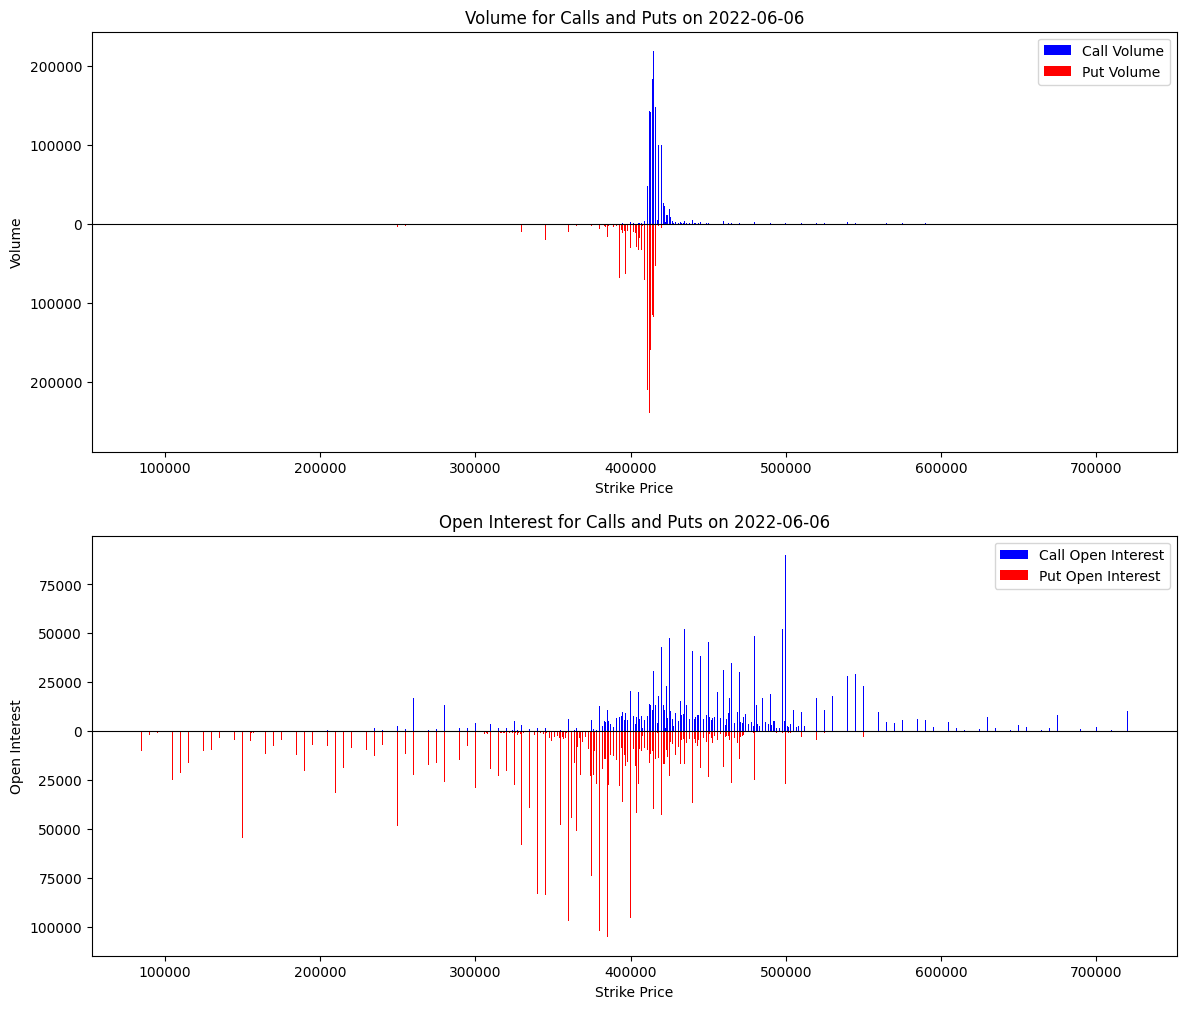

In [2]:
data = pd.read_csv("option_data.csv")

data['date'] = pd.to_datetime(data['date'])

specific_dates = ['2018-03-06', '2021-02-08', '2022-06-06']

for specific_date in specific_dates:
    data_on_specific_date = data[data['date'] == specific_date]

    calls = data_on_specific_date[data_on_specific_date['cp_flag'] == 'C']
    puts = data_on_specific_date[data_on_specific_date['cp_flag'] == 'P']

    puts_volume = puts.copy()
    puts_oi = puts.copy()
    puts_volume['volume'] = -puts_volume['volume']
    puts_oi['open_interest'] = -puts_oi['open_interest']

    combined_volume = pd.concat([calls, puts_volume]).sort_values(by='strike_price')
    combined_oi = pd.concat([calls, puts_oi]).sort_values(by='strike_price')

    fig, axs = plt.subplots(2, 1, figsize=(14, 12))

    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] > 0], combined_volume['volume'][combined_volume['volume'] > 0], color='blue', width=500, label='Call Volume')
    axs[0].bar(combined_volume['strike_price'][combined_volume['volume'] < 0], combined_volume['volume'][combined_volume['volume'] < 0], color='red', width=500, label='Put Volume')
    axs[0].set_title(f'Volume for Calls and Puts on {specific_date}')
    axs[0].set_xlabel('Strike Price')
    axs[0].set_ylabel('Volume')
    axs[0].axhline(0, color='black', linewidth=0.8)
    axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[0].legend()

    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] > 0], combined_oi['open_interest'][combined_oi['open_interest'] > 0], color='blue', width=500, label='Call Open Interest')
    axs[1].bar(combined_oi['strike_price'][combined_oi['open_interest'] < 0], combined_oi['open_interest'][combined_oi['open_interest'] < 0], color='red', width=500, label='Put Open Interest')
    axs[1].set_title(f'Open Interest for Calls and Puts on {specific_date}')
    axs[1].set_xlabel('Strike Price')
    axs[1].set_ylabel('Open Interest')
    axs[1].axhline(0, color='black', linewidth=0.8)
    axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(abs(x))))
    axs[1].legend()
    

The plots above show the volume and open interest quantities for both calls and puts for three different dates throughout the five-year time period. We first observed that the volume quantity for our chosen date in 2018 was nearly 1/5th the quantities observed in the chosen 2021 and 2022 dates near the middle and end of the time span. Individually this does not say too much other than noting that different days will have different distributions, but can provide, considering the other graphs, some additional context for different time perioids. Additionally, as consistently observed for all 3 dates, quantites for volume and open interest for calls are right-skewed while quantities for volume and open interest for puts are left-skewed, ie. there are certain moves far out of the money. Additionally, the open interest values were more spread out than those for volume. Moreover, volume and open interest quantities are heavily concentrated at-the-money while the tails are heavily spread out towards out-of-the-money. 

## 6. Further Data Manipulations and Logic for Simulating All Individual Contracts

As part of the outlined strategy, we'll be simulating the strategy and also considering using a calculation of IV found in a paper to open trades relative to the gamma. 

### Further data restructuring

This uses the previous checkpoint to load the data. For the final version, we will clean up the variables to consistently use a single variable. For now, we'll allow different variables.

In [2]:
csv_file_path = 'combinedata.csv'
data = pd.read_csv(csv_file_path)
calls_df = pd.read_csv('calls.csv')
puts_df = pd.read_csv('puts.csv')

In [3]:
calls_df, puts_df = preprocess_options_data(calls_df, puts_df)

To make our analysis easier, we'll merge the dataframes from puts and calls on the same strike for the days that we may potentially open positions at (ie. every day with data filled for the next holding period for that contract).

We'll check that they match, of course.

In [4]:
dates_strike_prices_dont_match = compare_strike_prices(calls_df, puts_df)
print(dates_strike_prices_dont_match)

Series([], Name: date, dtype: datetime64[ns])


In [5]:
dates_data_dont_match = compare_strike_prices_and_exdates(calls_df, puts_df)
print(dates_data_dont_match)

Series([], Name: date, dtype: datetime64[ns])


Now merge,

In [6]:
calls_df.rename(columns={
    'close_x': 'close',
    'adj_open_x': 'adj_open',
    'adj_close_x': 'adj_close',
    'adj_volume_x': 'adj_volume',
    'TTE_x': 'TTE',
    'last_date_x': 'last_date_c',
    'best_bid_x': 'best_bid_c',
    'best_offer_x': 'best_offer_c',
    'volume_x': 'volume_c',
    'open_interest_x': 'open_interest_c',
    'impl_volatility_x': 'impl_volatility_c',
    'delta_x': 'delta_c',
    'gamma_x': 'gamma_c',
    'vega_x': 'vega_c',
    'theta_x': 'theta_c',
    'expiry_indicator_x': 'expiry_indicator_c',
    'is_present': 'is_present_c'
}, inplace=True)

calls_df = calls_df[['date', 'exdate', 'strike_price', 'close_date', 'close', 'adj_open', 'adj_close', 'adj_volume', 'TTE', 'last_date_c', 'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c', 'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c', 'expiry_indicator_c', 'is_present_c']]

In [7]:
puts_df.rename(columns={
    'last_date_x': 'last_date_p',
    'best_bid_x': 'best_bid_p',
    'best_offer_x': 'best_offer_p',
    'volume_x': 'volume_p',
    'open_interest_x': 'open_interest_p',
    'impl_volatility_x': 'impl_volatility_p',
    'delta_x': 'delta_p',
    'gamma_x': 'gamma_p',
    'vega_x': 'vega_p',
    'theta_x': 'theta_p',
    'expiry_indicator_x': 'expiry_indicator_p',
    'is_present': 'is_present_p'
}, inplace=True)

puts_df_selected = puts_df[['date', 'last_date_p', 'best_bid_p', 'best_offer_p', 'volume_p', 'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p', 'theta_p', 'expiry_indicator_p', 'is_present_p']]

In [8]:
option_df = pd.merge(calls_df, puts_df_selected, on='date', how='left')
display(option_df)

,date,exdate,strike_price,close_date,close,adj_open,adj_close,adj_volume,TTE,last_date_c,...,best_offer_p,volume_p,open_interest_p,impl_volatility_p,delta_p,gamma_p,vega_p,theta_p,expiry_indicator_p,is_present_p
0,2018-01-02,2018-01-31,269.0,2018-01-23,268.77,242.053393,242.893856,86655749.0,29,2018-01-02,...,2.10,198.0,33.0,0.069577,-0.496183,0.077797,30.11151,-11.46749,w,True
1,2018-01-03,2018-02-02,270.0,2018-01-24,270.47,243.065564,244.430187,90070416.0,30,2018-01-03,...,1.80,1060.0,330.0,0.069568,-0.442522,0.074853,30.52431,-11.33461,w,True
2,2018-01-04,2018-02-02,272.0,2018-01-25,271.61,245.089905,245.460432,80595402.0,29,2018-01-04,...,2.15,416.0,304.0,0.068201,-0.508652,0.078707,30.40449,-11.28616,w,True
3,2018-01-05,2018-02-02,273.0,2018-01-26,273.42,246.273783,247.096172,83468662.0,28,2018-01-05,...,1.85,509.0,149.0,0.071740,-0.447556,0.074347,29.86764,-12.34094,w,True
4,2018-01-08,2018-02-07,275.0,2018-01-29,273.92,246.996762,247.548034,57288979.0,30,2018-01-08,...,2.56,82.0,269.0,0.067924,-0.560465,0.076891,30.79770,-10.80407,w,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,2023-03-24,399.0,2023-02-28,398.54,393.496030,392.530807,83574386.0,30,2023-02-22,...,9.71,2678.0,1317.0,0.201626,-0.506205,0.017387,45.30915,-47.38424,w,True
1294,2023-02-23,2023-03-24,401.0,2023-02-28,400.66,395.505271,394.618841,95842681.0,29,2023-02-23,...,8.86,1233.0,1566.0,0.186139,-0.507514,0.019064,44.77837,-44.24160,w,True
1295,2023-02-24,2023-03-24,396.0,2023-02-28,396.38,389.457850,390.403375,108144866.0,28,2023-02-24,...,8.84,3156.0,1086.0,0.198990,-0.494048,0.018342,43.53449,-48.60954,w,True
1296,2023-02-27,2023-03-31,398.0,2023-02-28,397.73,393.840753,391.733020,80318244.0,32,2023-02-27,...,9.26,1568.0,4088.0,0.188579,-0.505251,0.018253,46.60089,-42.60824,m,True


Creating a new dataframe where start dates with missing values are removed, according to our initial analysis.

In [9]:
option_df1 = option_df[(option_df['is_present_c'] == True) & (option_df['is_present_p'] == True)]
display(option_df1)

,date,exdate,strike_price,close_date,close,adj_open,adj_close,adj_volume,TTE,last_date_c,...,best_offer_p,volume_p,open_interest_p,impl_volatility_p,delta_p,gamma_p,vega_p,theta_p,expiry_indicator_p,is_present_p
0,2018-01-02,2018-01-31,269.0,2018-01-23,268.77,242.053393,242.893856,86655749.0,29,2018-01-02,...,2.10,198.0,33.0,0.069577,-0.496183,0.077797,30.11151,-11.46749,w,True
1,2018-01-03,2018-02-02,270.0,2018-01-24,270.47,243.065564,244.430187,90070416.0,30,2018-01-03,...,1.80,1060.0,330.0,0.069568,-0.442522,0.074853,30.52431,-11.33461,w,True
2,2018-01-04,2018-02-02,272.0,2018-01-25,271.61,245.089905,245.460432,80595402.0,29,2018-01-04,...,2.15,416.0,304.0,0.068201,-0.508652,0.078707,30.40449,-11.28616,w,True
4,2018-01-08,2018-02-07,275.0,2018-01-29,273.92,246.996762,247.548034,57288979.0,30,2018-01-08,...,2.56,82.0,269.0,0.067924,-0.560465,0.076891,30.79770,-10.80407,w,True
5,2018-01-09,2018-02-07,275.0,2018-01-30,274.54,247.981821,248.108343,57253957.0,29,2018-01-09,...,2.47,453.0,229.0,0.076654,-0.510832,0.069026,30.74049,-12.99855,w,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,2023-03-24,399.0,2023-02-28,398.54,393.496030,392.530807,83574386.0,30,2023-02-22,...,9.71,2678.0,1317.0,0.201626,-0.506205,0.017387,45.30915,-47.38424,w,True
1294,2023-02-23,2023-03-24,401.0,2023-02-28,400.66,395.505271,394.618841,95842681.0,29,2023-02-23,...,8.86,1233.0,1566.0,0.186139,-0.507514,0.019064,44.77837,-44.24160,w,True
1295,2023-02-24,2023-03-24,396.0,2023-02-28,396.38,389.457850,390.403375,108144866.0,28,2023-02-24,...,8.84,3156.0,1086.0,0.198990,-0.494048,0.018342,43.53449,-48.60954,w,True
1296,2023-02-27,2023-03-31,398.0,2023-02-28,397.73,393.840753,391.733020,80318244.0,32,2023-02-27,...,9.26,1568.0,4088.0,0.188579,-0.505251,0.018253,46.60089,-42.60824,m,True


Creating a checkpoint,

In [10]:
option_df1.to_csv('option_df.csv', index=False)

### **Simulating Individual Contracts and Hedging**

In the final version, we will simulate this later on - however, this section explains the simulation process for each individual possible contract position. 

```source.py``` contains the original code to implement this, as ```create_simulations_original``` and calculates metrics as ```calculate_realized_PL```. We have updated these metrics in the full strategy section; however, these simulations can still be run and saved (and returned to) via the appendix.

This is another checkpoint. If the data has been run until this point, we can directly run from this point. This section simulates ALL possible contracts that we may open and trade/balance, individually. This way we can save them as an intermediate or retrieve them, mapping them onto a single timeline when we evaluate which positions will be opened at which time using various strategies later on. Because each individual simulation will NOT change depending on which we open, we can simulate each individual contract's progress ahead of time. Then, when we map depending on where we decide to open positions, we get the sum progression of our strategy.

In [115]:
data = pd.read_csv('combinedata.csv')
options = pd.read_csv('option_df.csv')

Pseudocode format for mass simulation of individual date-strike rebalance. Essentially, we will:
1. Pull in calls_df and puts_df
2. For dates in both dataframes where is_present is true for both, perform additional analysis
3. Align calls/puts on that day, specify the contract
4. For the contract in the main dataframe, find the period of info until the end date, inclusive, for that strike, contract, and expiry
5. For each day, calculate the delta sum as the sum of the call delta and put delta
6. Based on this, calculate how many Shares we must hold on that day (+ or -) and use this to calculate our share movement daily
7. Calculate the shareprice times shares as sharevalue
8. Calculate PL of day-to-day as change in shares times diff in shareprice
9. Calculate current available closing price of the option straddle, which will also be used to add to the total PL with open positions (ie. price based on the closest book level, should we choose to close the position)
10. On the end date, close ALL positions

We will save each dataframe as an item in a variable () then store it under a same-directory data folder, naming each simulation after the date it was opened and whether we were long or short gamma. The function call to do this is in the appendix.

In [136]:
data['exdate'] = pd.to_datetime(data['exdate'])
options['exdate'] = pd.to_datetime(options['exdate'])

data['exdate_str'] = data['exdate'].dt.strftime('%Y%m%d')  
data['strikeID'] = data['exdate_str'] + '_' + data['strike_price'].astype(str)  
data.drop(columns=['exdate_str'], inplace=True)  

options['exdate_str'] = options['exdate'].dt.strftime('%Y%m%d')  
options['strikeID'] = options['exdate_str'] + '_' + options['strike_price'].astype(str)  
options.drop(columns=['exdate_str'], inplace=True)  

In [119]:
options['date'] = pd.to_datetime(options['date'])
data['date'] = pd.to_datetime(data['date'])

Simulate a small subset, just to show what we expect; note that this simulates with a single option contract (for one share, 1:1). We go into much more detail later with our modified simulation, but this outlines the method used to get our results.

In [120]:
options_subset = options.head(2)
simulations1 = create_simulations_original(options_subset, data, dropna_greeks=True)

In [ ]:
for date, df in simulations1.items():
    simulations1[date] = calculate_realized_PL(df, long_op=True) 

In [ ]:
for key, df in list(simulations1.items())[:2]: 
    print(f"DataFrame for {key}:")
    print(df.columns)
    display(df)  
    print("\n")

DataFrame for 2018-01-02:
Index(['date', 'exdate', 'strike_price', 'expiry_indicator', 'close',
       'adj_open', 'adj_close', 'adj_volume', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c',
       'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'volume_p',
       'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p',
       'theta_p', 'delta_sum', 'shares_held', 'sharechange', 'stock_pos',
       'avg_cost', 'realized_PL', 'option_PL', 'stock_PL'],
      dtype='object')


,date,exdate,strike_price,expiry_indicator,close,adj_open,adj_close,adj_volume,strikeID,cp_flag_c,...,vega_p,theta_p,delta_sum,shares_held,sharechange,stock_pos,avg_cost,realized_PL,option_PL,stock_PL
0,2018-01-02,2018-01-31,269.0,w,268.77,242.053393,242.893856,86655749.0,20180131_269.0,C,...,30.111510,-11.467490,0.015848,-0.015848,NaN,-0.015848,268.770000,0.000000,-0.10,0.000000
1,2018-01-03,2018-01-31,269.0,w,270.47,243.065564,244.430187,90070416.0,20180131_269.0,C,...,28.250190,-11.921280,0.259359,-0.259359,-0.243511,-0.259359,270.366122,0.000000,0.32,-0.026942
2,2018-01-04,2018-01-31,269.0,w,271.61,245.089905,245.460432,80595402.0,20180131_269.0,C,...,25.781000,-12.327160,0.391860,-0.391860,-0.132501,-0.391860,270.786719,0.000000,0.90,-0.322611
3,2018-01-05,2018-01-31,269.0,w,273.42,246.273783,247.096172,83468662.0,20180131_269.0,C,...,21.481350,-11.877760,0.560376,-0.560376,-0.168516,-0.560376,271.578598,0.000000,2.00,-1.031877
4,2018-01-08,2018-01-31,269.0,w,273.92,246.996762,247.548034,57288979.0,20180131_269.0,C,...,18.362690,-11.728420,0.613018,-0.613018,-0.052642,-0.613018,271.779662,0.000000,2.19,-1.312065
5,2018-01-09,2018-01-31,269.0,w,274.54,247.981821,248.108343,57253957.0,20180131_269.0,C,...,17.498160,-13.020330,0.646666,-0.646666,-0.033648,-0.646666,271.923291,0.000000,2.67,-1.692137
6,2018-01-10,2018-01-31,269.0,w,274.12,247.331140,247.728779,69499524.0,20180131_269.0,C,...,17.468620,-13.232750,0.626662,-0.626662,0.020004,-0.626662,271.923291,-0.043943,2.29,-1.420537
7,2018-01-11,2018-01-31,269.0,w,276.12,248.298125,249.536226,62306557.0,20180131_269.0,C,...,13.118760,-11.482330,0.780802,-0.780802,-0.154140,-0.780802,272.751774,0.000000,3.68,-2.673861
8,2018-01-12,2018-01-31,269.0,w,277.92,249.807344,251.162929,90789911.0,20180131_269.0,C,...,10.328780,-10.552090,0.840416,-0.840416,-0.059614,-0.840416,273.118376,0.000000,5.29,-4.035362
9,2018-01-16,2018-01-31,269.0,w,276.97,252.455254,250.304392,106555142.0,20180131_269.0,C,...,11.123210,-16.564950,0.747087,-0.747087,0.093329,-0.747087,273.118376,-0.359468,4.73,-3.236966




DataFrame for 2018-01-03:
Index(['date', 'exdate', 'strike_price', 'expiry_indicator', 'close',
       'adj_open', 'adj_close', 'adj_volume', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c',
       'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'volume_p',
       'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p',
       'theta_p', 'delta_sum', 'shares_held', 'sharechange', 'stock_pos',
       'avg_cost', 'realized_PL', 'option_PL', 'stock_PL'],
      dtype='object')


,date,exdate,strike_price,expiry_indicator,close,adj_open,adj_close,adj_volume,strikeID,cp_flag_c,...,vega_p,theta_p,delta_sum,shares_held,sharechange,stock_pos,avg_cost,realized_PL,option_PL,stock_PL
0,2018-01-03,2018-02-02,270.0,w,270.47,243.065564,244.430187,90070416.0,20180202_270.0,C,...,30.524310,-11.33461,0.119696,-0.119696,NaN,-0.119696,270.470000,0.000000,-0.07,0.000000
1,2018-01-04,2018-02-02,270.0,w,271.61,245.089905,245.460432,80595402.0,20180202_270.0,C,...,28.778260,-12.15496,0.265768,-0.265768,-0.146072,-0.265768,271.096569,0.000000,0.39,-0.136453
2,2018-01-05,2018-02-02,270.0,w,273.42,246.273783,247.096172,83468662.0,20180202_270.0,C,...,25.017800,-12.28042,0.457539,-0.457539,-0.191771,-0.457539,272.070402,0.000000,1.33,-0.617494
3,2018-01-08,2018-02-02,270.0,w,273.92,246.996762,247.548034,57288979.0,20180202_270.0,C,...,22.018190,-12.28724,0.514544,-0.514544,-0.057005,-0.514544,272.275315,0.000000,1.49,-0.846263
4,2018-01-09,2018-02-02,270.0,w,274.54,247.981821,248.108343,57253957.0,20180202_270.0,C,...,21.022120,-13.72542,0.549888,-0.549888,-0.035344,-0.549888,272.420877,0.000000,2.01,-1.165280
5,2018-01-10,2018-02-02,270.0,w,274.12,247.331140,247.728779,69499524.0,20180202_270.0,C,...,21.179100,-14.17493,0.523363,-0.523363,0.026525,-0.523363,272.420877,-0.045069,1.63,-0.934327
6,2018-01-11,2018-02-02,270.0,w,276.12,248.298125,249.536226,62306557.0,20180202_270.0,C,...,16.636580,-12.78389,0.692574,-0.692574,-0.169211,-0.692574,273.324654,0.000000,2.83,-1.981053
7,2018-01-12,2018-02-02,270.0,w,277.92,249.807344,251.162929,90789911.0,20180202_270.0,C,...,13.466870,-12.09646,0.768158,-0.768158,-0.075584,-0.768158,273.776819,0.000000,4.39,-3.182617
8,2018-01-16,2018-02-02,270.0,w,276.97,252.455254,250.304392,106555142.0,20180202_270.0,C,...,14.348100,-18.15760,0.670163,-0.670163,0.097995,-0.670163,273.776819,-0.312916,3.93,-2.452867
9,2018-01-17,2018-02-02,270.0,w,279.61,251.262339,252.690223,113201396.0,20180202_270.0,C,...,10.380940,-15.57961,0.802791,-0.802791,-0.132628,-0.802791,274.740511,0.000000,5.92,-4.222098


## Calculate model-free IV to compare with IV given in data

As per [Jiang et al.] we calculate IV in a model-free way, to experiment with how using the model-free IV to open positions compares against taking a long or short gamma position through this period.

We've downloaded some additional data, with which to calculate an output ```iv_calculations.csv```, and for this we require t-bill data.

In [2]:
tbills = load_and_transform_tbills('tbill_data.csv')

Finding the calls and puts we calculated earlier, to implement the model-free IV.

In [3]:
calls = load_and_transform_calls('calls.csv')
puts = load_and_transform_puts('puts.csv')
option_data = load_and_transform_option_data('option_data.csv')

We also perform some small manipulations - we will use the option midprices, and find days to expiry based on the expiry date.

In [4]:
option_data

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,expiry_indicator,midpt,dte
0,2018-01-02,2018-01-03,2017-12-28,C,235000.0,33.59,33.81,0.0,187.0,NaN,NaN,NaN,NaN,NaN,w,33.700,1
1,2018-01-02,2018-01-03,2018-01-02,C,240000.0,28.59,28.76,1.0,88.0,NaN,NaN,NaN,NaN,NaN,w,28.675,1
2,2018-01-02,2018-01-03,2017-12-27,C,242500.0,26.09,26.32,0.0,2.0,NaN,NaN,NaN,NaN,NaN,w,26.205,1
3,2018-01-02,2018-01-03,2018-01-02,C,245000.0,23.59,23.81,12.0,58.0,NaN,NaN,NaN,NaN,NaN,w,23.700,1
4,2018-01-02,2018-01-03,NaN,C,247500.0,21.08,21.32,0.0,0.0,NaN,NaN,NaN,NaN,NaN,w,21.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448189,2023-02-28,2025-03-21,2022-12-28,P,600000.0,200.50,205.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,203.000,752
10448190,2023-02-28,2025-03-21,NaN,P,605000.0,205.50,210.50,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,208.000,752
10448191,2023-02-28,2025-03-21,NaN,P,610000.0,210.00,215.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,212.500,752
10448192,2023-02-28,2025-03-21,NaN,P,615000.0,215.00,220.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,217.500,752


Reading in SPY daily data.

In [5]:
spydata = pd.read_csv('spy_tickerdata.csv')
spydata['date'] = pd.to_datetime(spydata['date'])

And now, we calculate the model-free IV, according to the formula first presented in the introduction:
<br>
<br>
$$
\sum_{i=1}^{m} \left[ g(T, K_i) + g(T, K_{i-1}) \right] \Delta K
$$
<br>
<br>

Where $m$ is the number of tradable strike prices, $\Delta K = \frac{K_{\max} - K_{\min}}{m}$, $K_i = K_{\min} + i \Delta K$, and $g(T, K_i) = \frac{C^F(T, K_i) - \max(0, F_0 - K_i)}{K_i^2}$. 


We also wrote a function ```calc_s0```, which calculates the discounted price of the underlying SPY by subtracting the present value of any dividends that will be disbursed before the option expires.

Below we calculate model-free implied volatility for each day in our analysis period. We filter our options that are trading at less than $0.375, and options that are in the money. We define 'in-the-money' as call options with a strike price less than 97\% of the spot price of the underlying. We filter out these options because the paper suggested to do this, as their volatilites behave differently than normal for various reasons.

In [6]:
our_ivs, sizes = calculate_iv_for_calls(calls, option_data, tbills, spydata)

Next, we cleaned the results and plotted our findings against the Black-Scholes Implied volatility values for the analysis period.

In [7]:
our_ivs = our_ivs.reset_index().rename(columns = {'index':'date'})
our_ivs['BS'] = calls['impl_volatility_x']
our_ivs['iv'] = our_ivs['iv']**(0.5)

In [8]:
plotting_df = our_ivs.melt('date')

plotting_df = plotting_df.rename(columns = {'variable':'type', 'value':'IV'})

mapper = {'iv':'Model-Free IV', 'BS':'BS IV'}
plotting_df['type'] = plotting_df['type'].map(mapper)

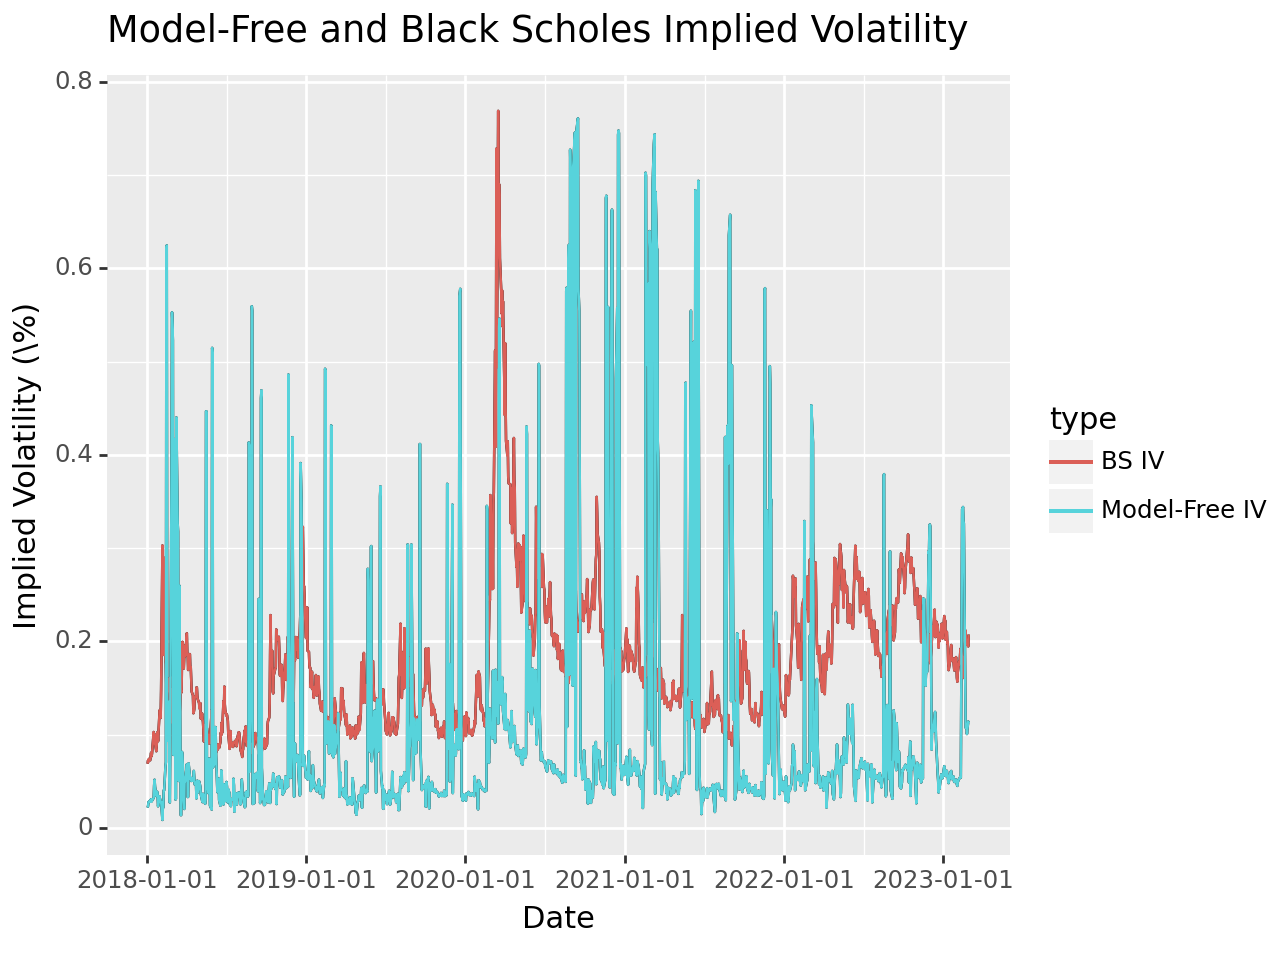

<Figure Size: (640 x 480)>

In [9]:
ggplot(plotting_df, aes(x ='date', y = 'IV', group = 'type')) +  \
       geom_line()  +  \
       labs(x = 'Date', y = 'Implied Volatility (\%)')  +  \
       ggtitle('Model-Free and Black Scholes Implied Volatility')  +  \
       geom_line(aes(color = 'type'))

Our hardware is generally lacking, so we save a checkpoint:

In [10]:
our_ivs.to_csv('iv_calculations.csv')

## **STRATEGY SIMULATION**

Now we have our IV, we can implement our strategy, which assesses whether we open positions depending on the model-free IV, and sizing positions according to market volume. Note we simulate several additional considerations:
* SPY dividends
* Costs of borrowing, with initial capital set to $1MM and borrowing limit set to \\$9MM
* Long-short, long only, and short only positions
* Cash available to trade
* Costs of shorting
* Interest from holding cash

### Dividends

We will need dividends for SPY, which will need to be factored into our strategy depending on the amount of SPY we hold at the ex-dividend date. However, as we are keeping track of cash flows, we will not receive the cash until the payment date, which is on the last trading day of the following month for SPY.

In [3]:
spy_divdata, trading_days = process_spy_dividends('spy_tickerdata.csv', '2018-01-01', '2023-02-28')
spy_divdata

,date,dividend,pay_date
51,2018-03-16,1.096780,2018-04-30
114,2018-06-15,1.246000,2018-07-31
182,2018-09-21,1.323000,2018-10-31
245,2018-12-21,1.435400,2019-01-31
301,2019-03-15,1.233100,2019-04-30
369,2019-06-21,1.431600,2019-07-31
432,2019-09-20,1.383620,2019-10-31
496,2019-12-20,1.570000,2020-01-31
557,2020-03-20,1.405560,2020-04-30
620,2020-06-19,1.366200,2020-07-31


### Simulations

This loads a new checkpoint to simulate the data from earlier checkpoints. We manipulate the data a bit first.

In [4]:
data_file_path = 'combinedata.csv'
options_file_path = 'option_df.csv'
data, options = prepare_dataframes(data_file_path, options_file_path)

Let's simulate the ATM options we are going to be trading now:

In [5]:
simulations = create_simulations(options, data, dropna_greeks=True)

In [6]:
len(trading_days) - len(simulations) # Adds up to contracts with missing greeks

158

This gets rid of simulations missing trading days (could occur due to various issues, mainly due to bad data):

In [7]:
filtered_simulations = filter_simulations(simulations, trading_days)

In [8]:
len(trading_days) - len(filtered_simulations)

325

Now, again showing an example of the simulations.

In [9]:
for key, df in list(filtered_simulations.items())[0:1]: 
    print(f"DataFrame for {key}:")
    print(df.columns)
    display(df)  
    print("\n")

DataFrame for 2018-01-03:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'shares_held', 'sharechange'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,cp_flag_p,best_bid_p,best_offer_p,impl_volatility_p,delta_p,delta_sum,shares_held,sharechange
0,2018-01-03,2018-02-02,270.0,270.47,20180202_270.0,C,2.65,2.69,0.072398,0.562218,P,1.77,1.80,0.069568,-0.442522,0.119696,-0.119696,NaN
1,2018-01-04,2018-02-02,270.0,271.61,20180202_270.0,C,3.45,3.49,0.077848,0.632690,P,1.43,1.46,0.074706,-0.366922,0.265768,-0.265768,-0.146072
2,2018-01-05,2018-02-02,270.0,273.42,20180202_270.0,C,4.80,4.84,0.083820,0.727658,P,1.02,1.04,0.081783,-0.270119,0.457539,-0.457539,-0.191771
3,2018-01-08,2018-02-02,270.0,273.92,20180202_270.0,C,5.17,5.20,0.089623,0.749240,P,0.81,0.82,0.082307,-0.234696,0.514544,-0.514544,-0.057005
4,2018-01-09,2018-02-02,270.0,274.54,20180202_270.0,C,5.67,5.72,0.093639,0.773171,P,0.83,0.84,0.091492,-0.223283,0.549888,-0.549888,-0.035344
5,2018-01-10,2018-02-02,270.0,274.12,20180202_270.0,C,5.27,5.33,0.092791,0.759070,P,0.85,0.87,0.089866,-0.235707,0.523363,-0.523363,0.026525
6,2018-01-11,2018-02-02,270.0,276.12,20180202_270.0,C,6.76,6.91,0.090857,0.854846,P,0.56,0.58,0.097319,-0.162272,0.692574,-0.692574,-0.169211
7,2018-01-12,2018-02-02,270.0,277.92,20180202_270.0,C,8.45,8.60,0.102281,0.890014,P,0.43,0.44,0.107499,-0.121856,0.768158,-0.768158,-0.075584
8,2018-01-16,2018-02-02,270.0,276.97,20180202_270.0,C,7.82,7.97,0.130638,0.827166,P,0.60,0.61,0.121851,-0.157003,0.670163,-0.670163,0.097995
9,2018-01-17,2018-02-02,270.0,279.61,20180202_270.0,C,10.03,10.25,0.131682,0.904279,P,0.38,0.39,0.135023,-0.101488,0.802791,-0.802791,-0.132628


### PL and Various Metrics

We calculate simulation metrics, adding more concise metrics and altering some columns between daily and cumulative for better mapping onto the single timelines. Here, *Cash - total cost basis + net realized PL* gives how much cash is available to use, ie. deployable capital. Here we assume that our leverage is completely dependent on how much money we choose to borrow from the $9MM in our flexible credit facility.

In [34]:
simulations_long = {date: calculate_realized_PL(df.copy(), long_op=True) for date, df in filtered_simulations.items()}
simulations_short = {date: calculate_realized_PL(df.copy(), long_op=False) for date, df in filtered_simulations.items()}

Let's take a look:

In [35]:
for key, df in list(simulations_short.items())[-5:]: 
    print(f"DataFrame for {key}:")
    print(df.columns)
    display(df)  
    print("\n")

DataFrame for 2023-02-22:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'stock_pos', 'pos_change', 'change_cost_basis',
       'stock_cost_basis', 'daily_stock_value', 'stock_PL',
       'option_cost_basis', 'change_cost_basis_op', 'daily_option_value',
       'option_PL', 'total_cost_basis', 'total_pos_value', 'total_PL',
       'realized_stock_PL', 'realized_option_PL', 'realized_PL', 'UID',
       'to_open'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,...,daily_option_value,option_PL,total_cost_basis,total_pos_value,total_PL,realized_stock_PL,realized_option_PL,realized_PL,UID,to_open
0,2023-02-22,2023-03-24,399.0,398.54,20230324_399.0,C,9.08,9.12,0.202075,0.517410,...,-18.83,-0.08,-14.284359,-14.364359,-0.080000,0.000000,0.00,0.000000,20230324_399.0_2023-02-22,1
1,2023-02-23,2023-03-24,399.0,400.66,20230324_399.0,C,9.99,10.03,0.200472,0.555948,...,-18.06,0.69,15.854488,16.568242,0.713755,0.000000,0.00,0.000000,20230324_399.0_2023-02-22,0
2,2023-02-24,2023-03-24,399.0,396.38,20230324_399.0,C,7.37,7.41,0.195788,0.473339,...,-17.62,1.13,-49.236657,-48.452815,0.783843,0.000000,0.00,0.000000,20230324_399.0_2023-02-22,0
3,2023-02-27,2023-03-24,399.0,397.73,20230324_399.0,C,7.54,7.58,0.197377,0.495326,...,-16.65,2.10,-32.535975,-30.887143,1.648832,0.000000,0.00,0.000000,20230324_399.0_2023-02-22,0
4,2023-02-28,2023-03-24,399.0,396.26,20230324_399.0,C,7.03,7.05,0.207028,0.465189,...,0.00,0.00,0.000000,0.000000,0.000000,-0.398548,2.83,2.431452,20230324_399.0_2023-02-22,0




DataFrame for 2023-02-23:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'stock_pos', 'pos_change', 'change_cost_basis',
       'stock_cost_basis', 'daily_stock_value', 'stock_PL',
       'option_cost_basis', 'change_cost_basis_op', 'daily_option_value',
       'option_PL', 'total_cost_basis', 'total_pos_value', 'total_PL',
       'realized_stock_PL', 'realized_option_PL', 'realized_PL', 'UID',
       'to_open'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,...,daily_option_value,option_PL,total_cost_basis,total_pos_value,total_PL,realized_stock_PL,realized_option_PL,realized_PL,UID,to_open
0,2023-02-23,2023-03-24,401.0,400.66,20230324_401.0,C,8.79,8.82,0.196720,0.518997,...,-17.68,-0.06,-13.019221,-13.079221,-0.060000,0.000000,0.00,0.000000,20230324_401.0_2023-02-23,1
1,2023-02-24,2023-03-24,401.0,396.38,20230324_401.0,C,6.35,6.39,0.192120,0.433775,...,-17.61,0.01,-79.673293,-79.712440,-0.039147,0.000000,0.00,0.000000,20230324_401.0_2023-02-23,0
2,2023-02-27,2023-03-24,401.0,397.73,20230324_401.0,C,6.48,6.51,0.193449,0.453692,...,-16.55,1.07,-64.680463,-63.871120,0.809343,0.000000,0.00,0.000000,20230324_401.0_2023-02-23,0
3,2023-02-28,2023-03-24,401.0,396.26,20230324_401.0,C,5.99,6.01,0.202116,0.424099,...,0.00,0.00,0.000000,0.000000,0.000000,-0.085759,1.74,1.654241,20230324_401.0_2023-02-23,0




DataFrame for 2023-02-24:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'stock_pos', 'pos_change', 'change_cost_basis',
       'stock_cost_basis', 'daily_stock_value', 'stock_PL',
       'option_cost_basis', 'change_cost_basis_op', 'daily_option_value',
       'option_PL', 'total_cost_basis', 'total_pos_value', 'total_PL',
       'realized_stock_PL', 'realized_option_PL', 'realized_PL', 'UID',
       'to_open'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,...,daily_option_value,option_PL,total_cost_basis,total_pos_value,total_PL,realized_stock_PL,realized_option_PL,realized_PL,UID,to_open
0,2023-02-24,2023-03-24,396.0,396.38,20230324_396.0,C,9.05,9.08,0.201088,0.531177,...,-17.92,-0.06,-3.142807,-3.202807,-0.060000,0.000000,0.00,0.000000,20230324_396.0_2023-02-24,1
1,2023-02-27,2023-03-24,396.0,397.73,20230324_396.0,C,9.27,9.31,0.202705,0.555327,...,-17.07,0.79,15.532207,16.372332,0.840124,0.000000,0.00,0.000000,20230324_396.0_2023-02-24,0
2,2023-02-28,2023-03-24,396.0,396.26,20230324_396.0,C,8.74,8.77,0.214299,0.524633,...,0.00,0.00,0.000000,0.000000,0.000000,-0.073478,1.56,1.486522,20230324_396.0_2023-02-24,0




DataFrame for 2023-02-27:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'stock_pos', 'pos_change', 'change_cost_basis',
       'stock_cost_basis', 'daily_stock_value', 'stock_PL',
       'option_cost_basis', 'change_cost_basis_op', 'daily_option_value',
       'option_PL', 'total_cost_basis', 'total_pos_value', 'total_PL',
       'realized_stock_PL', 'realized_option_PL', 'realized_PL', 'UID',
       'to_open'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,...,daily_option_value,option_PL,total_cost_basis,total_pos_value,total_PL,realized_stock_PL,realized_option_PL,realized_PL,UID,to_open
0,2023-02-27,2023-03-31,398.0,397.73,20230331_398.0,C,8.92,8.96,0.194675,0.511410,...,-18.22,-0.07,-15.700381,-15.770381,-0.07,0.000000,0.0,0.000000,20230331_398.0_2023-02-27,1
1,2023-02-28,2023-03-31,398.0,396.26,20230331_398.0,C,8.39,8.42,0.202880,0.483923,...,0.00,0.00,0.000000,0.000000,0.00,-0.009054,0.7,0.690946,20230331_398.0_2023-02-27,0




DataFrame for 2023-02-28:
Index(['date', 'exdate', 'strike_price', 'close', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'impl_volatility_c', 'delta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'impl_volatility_p',
       'delta_p', 'delta_sum', 'stock_pos', 'pos_change', 'change_cost_basis',
       'stock_cost_basis', 'daily_stock_value', 'stock_PL',
       'option_cost_basis', 'change_cost_basis_op', 'daily_option_value',
       'option_PL', 'total_cost_basis', 'total_pos_value', 'total_PL',
       'realized_stock_PL', 'realized_option_PL', 'realized_PL', 'UID',
       'to_open'],
      dtype='object')


,date,exdate,strike_price,close,strikeID,cp_flag_c,best_bid_c,best_offer_c,impl_volatility_c,delta_c,...,daily_option_value,option_PL,total_cost_basis,total_pos_value,total_PL,realized_stock_PL,realized_option_PL,realized_PL,UID,to_open
0,2023-02-28,2023-03-31,396.0,396.26,20230331_396.0,C,9.55,9.58,0.207305,0.519384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20230331_396.0_2023-02-28,1


### IV data

Load calculated IV data.

In [36]:
iv_data = pd.read_csv('iv_calculations.csv')
iv_data['iv'] = iv_data['iv']
iv_data

,Unnamed: 0,date,iv,BS
0,0,2018-01-02,0.021847,0.068871
1,1,2018-01-03,0.023454,0.072398
2,2,2018-01-04,0.027852,0.071179
3,3,2018-01-05,0.027788,0.074068
4,4,2018-01-08,0.029469,0.072545
...,...,...,...,...
1293,1293,2023-02-22,0.107065,0.202075
1294,1294,2023-02-23,0.111236,0.196720
1295,1295,2023-02-24,0.100687,0.201088
1296,1296,2023-02-27,0.114114,0.194675


Create the IV comparisons to trade, depending on whether model-free IV is more or less than the IV we will go long or short gamma. We also simulate going only long or only short gamma.

In [37]:
IV_compare = compare_iv(filtered_simulations, iv_data)
IV_compare

,date,BS_Call_IV,MF_Call_IV,IV_diff
0,2018-01-03,0.072398,0.023454,-0.048944
1,2018-01-04,0.071179,0.027852,-0.043327
2,2018-01-10,0.080641,0.030803,-0.049838
3,2018-01-11,0.076890,0.028318,-0.048572
4,2018-01-12,0.079350,0.029221,-0.050129
...,...,...,...,...
968,2023-02-22,0.202075,0.107065,-0.095010
969,2023-02-23,0.196720,0.111236,-0.085484
970,2023-02-24,0.201088,0.100687,-0.100401
971,2023-02-27,0.194675,0.114114,-0.080561


#### Quick Look at IV


Taking a look at the differences in IV, based on quantile:

In [38]:
(IV_compare['IV_diff'] > 0).sum()

124

In [39]:
IV_compare[IV_compare['IV_diff'] > 0]['IV_diff'].quantile(0.5)

0.31982084842669284

In [41]:
IV_compare[IV_compare['IV_diff'] > 0]['IV_diff'].quantile(0.25)

0.16191266523189107

In [42]:
IV_compare[IV_compare['IV_diff'] > 0]['IV_diff'].quantile(0.2)

0.12497667184676832

In [43]:
IV_compare[IV_compare['IV_diff'] < 0]['IV_diff'].quantile(0.75)

-0.0785731074996423

In [44]:
IV_compare[IV_compare['IV_diff'] < 0]['IV_diff'].quantile(0.80)

-0.07246443270542066

In [45]:
IV_compare[IV_compare['IV_diff'] < 0]['IV_diff'].quantile(0.70)

-0.08366817795015688

In [46]:
IV_compare[IV_compare['IV_diff'] < 0]['IV_diff'].quantile(0.50)

-0.11270668550109746

In [47]:
IV_compare['IV_diff'].max()

0.5826495838418329

In [48]:
IV_compare['IV_diff'].min()

-0.6570148924085712

### **Strategies**

Essentially, we set a threshold for which we will go long and short gamma, which we use to evaluate on each day whether there is a trading opportunity. We set these threholds based on the quantiles we looked at above.

We simulate three strategies:
* 1: Long-Short - if the model-free IV is greater than the IV by a set threshold, we will take a long gamma position. If it is less than the IV by another set threshold, we will take a short gamma position.
* 2: Long only - we only take long gamma positions, dependent on a threshold.
* 3: Short only - we only take short gamma positions, openeing positions depending on a threshold.

In [49]:
strat_dict = {'trade_1': trade_strategy_1, 'trade_2': trade_strategy_2, 'trade_3': trade_strategy_3}

In [50]:
for key, func in strat_dict.items():
    IV_compare[key] = IV_compare['IV_diff'].apply(func)
IV_compare

,date,BS_Call_IV,MF_Call_IV,IV_diff,trade_1,trade_2,trade_3
0,2018-01-03,0.072398,0.023454,-0.048944,0,0,0
1,2018-01-04,0.071179,0.027852,-0.043327,0,0,0
2,2018-01-10,0.080641,0.030803,-0.049838,0,0,0
3,2018-01-11,0.076890,0.028318,-0.048572,0,0,0
4,2018-01-12,0.079350,0.029221,-0.050129,0,0,0
...,...,...,...,...,...,...,...
968,2023-02-22,0.202075,0.107065,-0.095010,0,0,-1
969,2023-02-23,0.196720,0.111236,-0.085484,0,0,-1
970,2023-02-24,0.201088,0.100687,-0.100401,-1,0,-1
971,2023-02-27,0.194675,0.114114,-0.080561,0,0,-1


In [51]:
IV_compare['date'] = IV_compare['date'].dt.strftime('%Y-%m-%d')

In [52]:
abs(IV_compare['trade_2']).sum()

53

Here, generate the trade dataframes, by mapping each individual position onto the timeline based on whether we opened the position long or short (either 1 or -1, with additional position sizing added later) or did nothing (0).

In [54]:
trades_dfs = generate_trades_dfs(strat_dict, IV_compare, simulations_long, simulations_short)
volumes = preprocess_options(options)

Looking at volumes:

In [55]:
volumes.loc[volumes['volume_med'] > 0, 'volume_med'].quantile(0.10)

49.0

In [56]:
(volumes['volume_c'].quantile(.1) + volumes['volume_p'].quantile(.1))/2

28.5

We assume an initial capital, from which we can get additional leverage, on which we will also pay costs and fees. We also assume that when we borrow, we will get a rate 25 bps above the risk-free rate.

In [57]:
# 10 million dollars: 1 million initial capital, up to 9 million as a lending facility
KAPITAL = 1e7
INITIAL = 1e6
LEVERAGE = KAPITAL - INITIAL

Due to low liquidity on some days in the month-out ATM options, we instead assume that the market can handle options volume at around the 10th percentile of typical volume, which determines our position sizing on those low-liquidity days. Otherwise, we determine position sizing based on the attractiveness of the trade (absolute value of IV differential), capped at a maximum 80% differential as a risk control, in addition to not allowing a trade to exceed 10% of our capital as a capital remains bounded.

In [59]:
trades_dfs = update_trades_with_pos_size(trades_dfs, volumes, KAPITAL)

Let's take a look at our trades after sizing them accordingly:

In [60]:
trades_dfs['trade_1'].tail(6)

,date,exdate,strike_price,close,strikeID,delta_sum,stock_pos,pos_change,change_cost_basis,stock_cost_basis,...,sized_option_cost_basis,sized_change_cost_basis_op,sized_daily_option_value,sized_option_PL,sized_total_cost_basis,sized_total_pos_value,sized_total_PL,sized_realized_stock_PL,sized_realized_option_PL,sized_realized_PL
8730,2023-02-24,2023-03-24,399.0,396.38,20230324_399.0,-0.077786,-0.077786,-0.164214,-65.091145,-30.468441,...,-21681.0,0.0,-19382.0,2299.0,-55196.285584,-53298.096148,1898.189436,0.000000,0.0,0.000000
8731,2023-02-27,2023-03-10,410.0,397.73,20230310_410.0,-0.688320,0.000000,0.688026,273.648581,0.000000,...,0.0,21000.0,0.0,0.0,0.000000,0.000000,0.000000,-2223.604995,4680.0,2456.395005
8732,2023-02-27,2023-03-24,396.0,397.73,20230324_396.0,0.084083,0.084083,0.046954,18.675014,33.392207,...,-19646.0,0.0,-18777.0,869.0,17085.428184,18009.564749,924.136565,0.000000,0.0,0.000000
8733,2023-02-27,2023-03-24,399.0,397.73,20230324_399.0,-0.035796,-0.035796,0.041990,16.700683,-13.767759,...,-21681.0,0.0,-18315.0,3366.0,-36825.534614,-33975.857388,2849.677226,0.000000,0.0,0.000000
8734,2023-02-28,2023-03-24,396.0,396.26,20230324_396.0,0.020843,0.000000,-0.084083,-33.318730,0.000000,...,0.0,17930.0,0.0,0.0,0.000000,0.000000,0.000000,-80.825646,1716.0,1635.174354
8735,2023-02-28,2023-03-24,399.0,396.26,20230324_399.0,-0.108683,0.000000,0.035796,14.184523,0.000000,...,0.0,17512.0,0.0,0.0,0.000000,0.000000,0.000000,-458.440642,4169.0,3710.559358


### Dataframe Metrics

We calculate the PL metrics and costs for each dataframe's trades, minimizing trading transactions to get to the same point wherever possible. To do so, we consolidate the underlying stock position while treating the options as separate securities.

In [61]:
PL_temp_dfs = summarize_pl_by_date(trades_dfs, trading_days)
PL_temp_dfs['trade_1'][50:84]

,date,sized_stock_pos,sized_change_cost_basis,sized_stock_cost_basis,sized_daily_stock_value,sized_stock_PL,sized_option_cost_basis,sized_change_cost_basis_op,sized_daily_option_value,sized_option_PL,sized_total_cost_basis,sized_total_pos_value,sized_total_PL,sized_realized_stock_PL,sized_realized_option_PL,sized_realized_PL
50,2018-03-15,-4905.3341,-1.995678e+05,-1.378472e+06,-1.348967e+06,29504.771606,157363.0,11052.0,104763.0,-52600.0,-1.221109e+06,-1.244204e+06,-23095.228394,-5556.721428,5130.0,-426.721428
51,2018-03-16,-5069.7366,-4.507917e+04,-1.423551e+06,-1.390122e+06,33429.038886,157363.0,0.0,100406.0,-56957.0,-1.266188e+06,-1.289716e+06,-23527.961114,0.000000,0.0,0.000000
52,2018-03-19,2211.3897,1.969472e+06,5.459210e+05,5.981588e+05,52237.761672,157363.0,0.0,98938.0,-58425.0,7.032840e+05,6.970968e+05,-6187.238328,0.000000,0.0,0.000000
53,2018-03-20,-984.7594,-8.659966e+05,-2.992710e+05,-2.668206e+05,32450.461897,102036.0,-30927.0,61341.0,-40695.0,-1.972350e+05,-2.054796e+05,-8244.538103,20804.539037,-24400.0,-3595.460963
54,2018-03-21,-1481.1900,-1.342497e+05,-4.127809e+05,-4.005582e+05,12222.726100,48700.0,-26963.0,29150.0,-19550.0,-3.640809e+05,-3.714082e+05,-7327.273900,20739.810685,-26373.0,-5633.189315
55,2018-03-22,27.8096,3.978779e+05,7.332557e+03,7.332557e+03,0.000000,-14053.0,-46353.0,-14261.0,-208.0,-6.720443e+03,-6.928443e+03,-208.000000,22235.570500,-16400.0,5835.570500
56,2018-03-23,-497.3449,-1.355161e+05,-1.281836e+05,-1.283399e+05,-156.289952,-29120.0,-15067.0,-30420.0,-1300.0,-1.573036e+05,-1.587599e+05,-1456.289952,0.000000,0.0,0.000000
57,2018-03-26,662.8197,3.075712e+05,1.793877e+05,1.757201e+05,-3667.544946,-48481.0,-19361.0,-48179.0,302.0,1.309067e+05,1.275411e+05,-3365.544946,0.000000,0.0,0.000000
58,2018-03-27,-437.0603,-2.866287e+05,-1.072411e+05,-1.138979e+05,-6656.861793,-69343.0,-20862.0,-69539.0,-196.0,-1.765841e+05,-1.834369e+05,-6852.861793,0.000000,0.0,0.000000
59,2018-03-28,-684.9435,-6.440749e+04,-1.716485e+05,-1.779689e+05,-6320.325362,-88638.0,-19295.0,-89346.0,-708.0,-2.602865e+05,-2.673149e+05,-7028.325362,0.000000,0.0,0.000000


Apply dividends:

In [64]:
divvies = calculate_dividends(PL_temp_dfs, spy_divdata)
divvies['trade_1'].head(50)

,date,dividend,pay_date,sized_stock_pos,div
0,2018-03-16,1.096780,2018-04-30,-5069.7366,-5560.385708
1,2018-06-15,1.246000,2018-07-31,0.0000,0.000000
2,2018-09-21,1.323000,2018-10-31,-1631.3276,-2158.246415
3,2018-12-21,1.435400,2019-01-31,-1342.4627,-1926.970960
4,2019-03-15,1.233100,2019-04-30,-3734.6172,-4605.156469
5,2019-06-21,1.431600,2019-07-31,659.6096,944.297103
6,2019-09-20,1.383620,2019-10-31,0.0000,0.000000
7,2019-12-20,1.570000,2020-01-31,-1650.5574,-2591.375118
8,2020-03-20,1.405560,2020-04-30,-1472.6726,-2069.929700
9,2020-06-19,1.366200,2020-07-31,822.8804,1124.219202


In [65]:
PL_temp_dfs = merge_dividends_with_pl(PL_temp_dfs, divvies)
PL_temp_dfs['trade_1'][-2:]

,date,sized_stock_pos,sized_change_cost_basis,sized_stock_cost_basis,sized_daily_stock_value,sized_stock_PL,sized_option_cost_basis,sized_change_cost_basis_op,sized_daily_option_value,sized_option_PL,sized_total_cost_basis,sized_total_pos_value,sized_total_PL,sized_realized_stock_PL,sized_realized_option_PL,sized_realized_PL,div
1296,2023-02-27,53.1157,449386.138302,21586.89357,21125.707361,-461.186209,-41327.0,21000.0,-37092.0,4235.0,-19740.10643,-15966.292639,3773.813791,-2223.604995,4680.0,2456.395005,0.0
1297,2023-02-28,0.0000,-21047.627282,0.00000,0.000000,0.000000,0.0,35442.0,0.0,0.0,0.00000,0.000000,0.000000,-539.266288,5885.0,5345.733712,0.0


We use smallest DTE to approximate an overnight risk-free rate.

In [66]:
tbills_data = process_tbills_data('tbill_data.csv', '2018-01-01', '2023-02-28', trading_days)
tbills_data

,date,dte,maturity_date,price,rate,leverage_rate
0,2018-01-02,2.0,2018-01-04,99.994083,0.000030,0.000036
1,2018-01-03,1.0,2018-01-04,99.996944,0.000031,0.000037
2,2018-01-04,7.0,2018-01-11,99.976375,0.000034,0.000041
3,2018-01-05,6.0,2018-01-11,99.979583,0.000034,0.000041
4,2018-01-08,3.0,2018-01-11,99.989750,0.000034,0.000041
...,...,...,...,...,...,...
1283,2023-02-22,1.0,2023-02-23,99.987410,0.000126,0.000132
1284,2023-02-23,5.0,2023-02-28,99.935972,0.000128,0.000135
1285,2023-02-24,4.0,2023-02-28,99.950389,0.000124,0.000131
1286,2023-02-27,1.0,2023-02-28,99.987639,0.000124,0.000130


Calculate the rate:

In [67]:
rfr = calculate_rfr(trading_days, tbills_data)
rfr

,date,rate,leverage_rate
0,2018-01-02,0.000030,0.000036
1,2018-01-03,0.000031,0.000037
2,2018-01-04,0.000034,0.000041
3,2018-01-05,0.000034,0.000041
4,2018-01-08,0.000034,0.000041
...,...,...,...
1293,2023-02-22,0.000126,0.000132
1294,2023-02-23,0.000128,0.000135
1295,2023-02-24,0.000124,0.000131
1296,2023-02-27,0.000124,0.000130


### Final Dataframes

In this simulation, when we are short shares, we do not need to borrow money, hence we don't go above initial capital of 1 million, which is why lever cash is 0. To account for the fees associated with opening a short position, we pay to borrow the shares under short fees (hence not double-paying fees).

Here, we take the simulations for each strategy, and calculate all of the associated metrics.

In [68]:
PL_dfs = process_pl_dfs(PL_temp_dfs, rfr, INITIAL, KAPITAL)

In [69]:
PL_dfs['trade_1']

,date,gross_stock_trades,gross_option_trades,gross_trades_value,stock_trading_costs,option_trading_costs,net_trading_costs,stock_pos_value,option_pos_value,gross_pos_value,...,initial_cash,interest,lever_cash,leverage_fee,end_kapital,net_short_fees,net_interest_paid,net_interest_earned,net_pos_value,tot_cash
0,2018-01-02,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,...,1.000000e+06,29.584646,0.0,0.0,1.000030e+06,0.000000,29.584646,0.000000,1.000030e+06,9.999970e+06
1,2018-01-03,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,...,1.000030e+06,30.557393,0.0,0.0,1.000060e+06,0.000000,60.142039,0.000000,1.000060e+06,9.999940e+06
2,2018-01-04,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,...,1.000060e+06,33.756587,0.0,0.0,1.000094e+06,0.000000,93.898626,0.000000,1.000094e+06,9.999906e+06
3,2018-01-05,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,...,1.000094e+06,34.035027,0.0,0.0,1.000128e+06,0.000000,127.933653,0.000000,1.000128e+06,9.999872e+06
4,2018-01-08,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,...,1.000128e+06,34.173373,0.0,0.0,1.000162e+06,0.000000,162.107026,0.000000,1.000162e+06,9.999838e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2023-02-22,364328.728590,20355.0,384683.728590,36.432873,2.0355,38.468373,-315409.338480,-43198.0,-358607.338480,...,1.468668e+06,184.932685,0.0,0.0,1.108357e+06,13455.044279,38074.710424,12983.858946,1.110246e+06,1.043213e+07
1294,2023-02-23,62357.239958,0.0,62357.239958,6.235724,0.0000,6.235724,-254729.891962,-39426.0,-294155.891962,...,1.406455e+06,180.173640,0.0,0.0,1.108497e+06,13489.339657,38254.884065,12983.858946,1.112480e+06,1.036958e+07
1295,2023-02-24,174798.030680,19646.0,194444.030680,17.479803,1.9646,19.444403,-426806.802646,-62314.0,-489120.802646,...,1.601004e+06,198.630604,0.0,0.0,1.108620e+06,13545.082913,38453.514668,12983.858946,1.112082e+06,1.056381e+07
1296,2023-02-27,449386.138302,21000.0,470386.138302,44.938614,2.1000,47.038614,21125.707361,-37092.0,-15966.292639,...,1.130770e+06,139.792991,0.0,0.0,1.111169e+06,13545.082913,38593.307659,12983.858946,1.114943e+06,1.009324e+07


In [70]:
PL_dfs['trade_2'][-2:]

,date,gross_stock_trades,gross_option_trades,gross_trades_value,stock_trading_costs,option_trading_costs,net_trading_costs,stock_pos_value,option_pos_value,gross_pos_value,...,initial_cash,interest,lever_cash,leverage_fee,end_kapital,net_short_fees,net_interest_paid,net_interest_earned,net_pos_value,tot_cash
1296,2023-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,683225.069753,84.464651,0.0,0.0,683309.534404,4719.494988,39039.947929,1262.251172,683309.534404,9.612474e+06
1297,2023-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,683309.534404,82.581537,0.0,0.0,683392.115941,4719.494988,39122.529466,1262.251172,683392.115941,9.612391e+06


Noting some position lows, drawdowns and maximum PL values, on each of the strategies.

In [71]:
PL_dfs['trade_1']['net_pos_value'][PL_dfs['trade_1']['net_pos_value'].idxmin()]

868579.2717882802

In [73]:
PL_dfs['trade_2']['net_pos_value'][PL_dfs['trade_2']['net_pos_value'].idxmin()]

596810.1024514363

In [74]:
PL_dfs['trade_3']['net_pos_value'][PL_dfs['trade_3']['net_pos_value'].idxmin()]

981452.1037887249

In [75]:
PL_dfs['trade_1']['tot_cash'][PL_dfs['trade_1']['tot_cash'].idxmin()]

2987330.136676361

In [76]:
PL_dfs['trade_1']['tot_cash'][PL_dfs['trade_1']['tot_cash'].idxmax()]

15620853.359602839

In [77]:
PL_dfs['trade_2']['tot_cash'][PL_dfs['trade_2']['tot_cash'].idxmin()]

2468237.6778471903

In [78]:
PL_dfs['trade_2']['tot_cash'][PL_dfs['trade_2']['tot_cash'].idxmax()]

15140576.721228467

In [79]:
PL_dfs['trade_3']['tot_cash'][PL_dfs['trade_3']['tot_cash'].idxmin()]

5649798.585902663

In [80]:
PL_dfs['trade_3']['tot_cash'][PL_dfs['trade_3']['tot_cash'].idxmax()]

15511034.440640306

Showing some examples of the final positions and closing them:

In [81]:
for key in strat_dict.keys():
    formatted_df = PL_dfs[key][-2:][['date', 'net_pos_value']].copy()

    formatted_df['net_pos_value'] = formatted_df['net_pos_value'].apply(lambda x: "${:,.2f}".format(x))
    
    print(f"Final positions for {key}:")
    display(formatted_df)

Final positions for trade_1:


,date,net_pos_value
1296,2023-02-27,"$1,114,943.29"
1297,2023-02-28,"$1,116,644.50"


Final positions for trade_2:


,date,net_pos_value
1296,2023-02-27,"$683,309.53"
1297,2023-02-28,"$683,392.12"


Final positions for trade_3:


,date,net_pos_value
1296,2023-02-27,"$1,755,802.90"
1297,2023-02-28,"$1,759,887.75"


As you can see above, the strategies trade_1 (long-short) and trade_3 (short only) were profitable, while strategy trade_2 (long only) was not. This corresponds with general knowledge that realized volatility is historically lower than implied volatility, which allows short gamma strategies to be profitable.

In [82]:
os.makedirs('simdata', exist_ok=True)

for strat, df in PL_dfs.items():
    csv_path = f'simdata/PL_{strat}.csv'
    df.to_csv(csv_path, index=False)

## Analysis

This script uses different functions to visualize and analyze trade data assuming that a df with the following columns are available: date (index), cash, gross_option_trades, gross_stock_trades, gross_trades_value, option_pos_value, stock_pos_value, option_PL, stock_PL, net_PL. Additionally, we will also need to import farma-french factors data available from Ken French's website and set the date column as the index.

In [ ]:
def process_trading_data(data):
    """
    Processes the trading data DataFrame by renaming cumulative P&L columns and calculating daily P&L.

    Parameters:
        data (DataFrame): The trading data with columns for cumulative and daily P&L.
    """
    if 'option_PL' not in data.columns or 'stock_PL' not in data.columns or 'net_PL' not in data.columns:
        raise ValueError("DataFrame must contain 'option_PL', 'stock_PL', and 'net_PL' columns")

    data.rename(columns={'option_PL': 'cum_option_PL',
                         'stock_PL': 'cum_stock_PL',
                         'net_PL': 'cum_net_PL'}, inplace=True)

    data['option_PL'] = data['cum_option_PL'].diff()
    data['stock_PL'] = data['cum_stock_PL'].diff()
    data['net_PL'] = data['cum_net_PL'].diff()

    return cumulative_pl

#### Use the "cumulative_pl" df from process_trading_data function here onwards!

In [ ]:
def max_drawdown(returns):
        local_max = [n for n in range(len(returns)-1) if ((n==0) and (returns[0] > returns[1])) or 
           ((n > 0) and  (returns[n-1]<returns[n]) and (returns[n+1]<returns[n]))] 
        
        local_min = [n for n in range(1,len(returns)) if ((n == len(returns)-1) and (returns[-1] < returns[-2])) or
                (returns[n-1]>returns[n]) and (returns[n+1]>returns[n])]
        
        def next_local_min(n):
            if [m for m in local_min if m > n]:
                return [m for m in local_min if m > n][0]
            else: return None
        
        drawdowns = [(n,next_local_min(n)) for n in local_max]
        drawdown_values = [returns[n] - returns[m] for (n,m) in drawdowns if m != None]
        if drawdown_values:
            return  np.max(drawdown_values)
        else: return 0.0

In [ ]:
def performance_summary(cumulative_pl):
    """
    Returns the Performance Stats for a given set of data.
    
    Inputs: 
        data - DataFrame with Date index and corresponding financial data.
    
    Output:
        summary_stats - DataFrame with summary statistics.
    """
    daily_returns = cumulative_pl
    
    summary_stats = pd.DataFrame()
    summary_stats['Mean'] = daily_returns.mean()
    summary_stats['Median'] = daily_returns.median()
    summary_stats['Volatility'] = daily_returns.std() 
    summary_stats['Sharpe Ratio'] = summary_stats['Mean'] / summary_stats['Volatility']
    summary_stats['Skewness'] = daily_returns.skew()
    summary_stats['Excess Kurtosis'] = daily_returns.kurtosis()
    summary_stats['Min'] = daily_returns.min()
    summary_stats['Max'] = daily_returns.max()

    wealth_index = 1000 * (1 + daily_returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    summary_stats['Max Drawdown'] = drawdowns.min()
    
    return summary_stats

In [ ]:
def plot_trades_over_time(cumulative_pl):
    """
    Plots gross option trades and gross stock trades over time.
    
    Inputs:
        cumulative_pl - DataFrame with Date index and financial data including
                        gross_option_trades and gross_stock_trades.
    """
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))  

    ax[0].plot(cumulative_pl.index, cumulative_pl['gross_option_trades'], color='blue', marker='o', linestyle='-')
    ax[0].set_title('Gross Option Trades Over Time')  
    ax[0].set_xlabel('Date')  # X-axis label
    ax[0].set_ylabel('Gross Option Trades')  
    ax[0].grid(True)  

    ax[1].plot(cumulative_pl.index, cumulative_pl['gross_stock_trades'], color='red', marker='o', linestyle='-')
    ax[1].set_title('Gross Stock Trades Over Time')  
    ax[1].set_xlabel('Date')  
    ax[1].set_ylabel('Gross Stock Trades')  
    ax[1].grid(True)  

    plt.tight_layout()

    plt.show()

In [ ]:
def plot_position_values_over_time(cumulative_pl):
    """
    Plots option position value and stock position value over time.
    
    Inputs:
        cumulative_pl - DataFrame with Date index and financial data including
                        option_pos_value and stock_pos_value.
    """
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))  

    ax[0].plot(cumulative_pl.index, cumulative_pl['option_pos_value'], color='green', marker='o', linestyle='-')
    ax[0].set_title('Option Position Value Over Time')  
    ax[0].set_xlabel('Date')  # X-axis label
    ax[0].set_ylabel('Option Position Value ($)')  
    ax[0].grid(True)  

    ax[1].plot(cumulative_pl.index, cumulative_pl['stock_pos_value'], color='purple', marker='o', linestyle='-')
    ax[1].set_title('Stock Position Value Over Time')  
    ax[1].set_xlabel('Date')  
    ax[1].set_ylabel('Stock Position Value ($)')  
    ax[1].grid(True)  

    plt.tight_layout()

    plt.show()

In [ ]:
def plot_pl_over_time(cumulative_pl):
    """
    Plots option, stock, and net pl value over time.
    
    Inputs:
        cumulative_pl - DataFrame with Date index and financial data.
    """
    fig, ax = plt.subplots(3, 1, figsize=(12, 12))
    
    ax[0].plot(cumulative_pl.index, cumulative_pl['option_PL'], color='orange', marker='o', linestyle='-')
    ax[0].set_title('Option P&L Over Time')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Option P&L ($)')
    ax[0].grid(True)
    
    ax[1].plot(cumulative_pl.index, cumulative_pl['stock_PL'], color='cyan', marker='o', linestyle='-')
    ax[1].set_title('Stock P&L Over Time')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Stock P&L ($)')
    ax[1].grid(True)
    
    ax[2].plot(cumulative_pl.index, cumulative_pl['net_PL'], color='magenta', marker='o', linestyle='-')
    ax[2].set_title('Net P&L Over Time')
    ax[2].set_xlabel('Date')
    ax[2].set_ylabel('Net P&L ($)')
    ax[2].grid(True)
    
    plt.tight_layout()
    
    plt.show()

In [ ]:
def plot_cumulative_pl_over_time(cumulative_pl):
    """
    Plots cumulative option, stock, and net pl value over time.
    
    Inputs:
        cumulative_pl - DataFrame with Date index and financial data.
    """
    fig, ax = plt.subplots(3, 1, figsize=(12, 12))
    
    ax[0].plot(cumulative_pl.index, cumulative_pl['cum_option_PL'], color='orange', marker='o', linestyle='-')
    ax[0].set_title('Cumulative Option P&L Over Time')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Cumulative Option P&L ($)')
    ax[0].grid(True)
    
    ax[1].plot(cumulative_pl.index, cumulative_pl['cum_stock_PL'], color='cyan', marker='o', linestyle='-')
    ax[1].set_title('Cumulative Stock P&L Over Time')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Cumulative Stock P&L ($)')
    ax[1].grid(True)
    
    ax[2].plot(cumulative_pl.index, cumulative_pl['cum_net_PL'], color='magenta', marker='o', linestyle='-')
    ax[2].set_title('Cumulative Net P&L Over Time')
    ax[2].set_xlabel('Date')
    ax[2].set_ylabel('Cumulative Net P&L ($)')
    ax[2].grid(True)
    
    plt.tight_layout()
    
    plt.show()

In [ ]:
def plot_trades_and_test_stationarity(cumulative_pl):
    """
    This function creates two subplots for the 'gross_option_trades' and 'gross_stock_trades' from the 'cumulative_pl' DataFrame.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on both datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pl - DataFrame with columns including 'gross_option_trades' and 'gross_stock_trades'.
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))

    # Plot for gross_option_trades
    axes[0].plot(cumulative_pl['gross_option_trades'], label="Gross Option Trades")
    axes[0].plot(cumulative_pl['gross_option_trades'].rolling(5).mean(), label="5-day MA")
    axes[0].plot(cumulative_pl['gross_option_trades'].rolling(30).mean(), label="30-day MA")
    axes[0].plot(cumulative_pl['gross_option_trades'].rolling(100).mean(), label="100-day MA")
    axes[0].set_title("Gross Option Trades with Rolling Averages", fontsize=18)
    axes[0].legend(fontsize=14)

    # ADF test on gross_option_trades
    adf_result_option = adfuller(cumulative_pl['gross_option_trades'].dropna(), maxlag=1)
    axes[0].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.2f}', 
                 transform=axes[0].transAxes, fontsize=14)

    # Plot for gross_stock_trades
    axes[1].plot(cumulative_pl['gross_stock_trades'], label="Gross Stock Trades")
    axes[1].plot(cumulative_pl['gross_stock_trades'].rolling(5).mean(), label="5-day MA")
    axes[1].plot(cumulative_pl['gross_stock_trades'].rolling(30).mean(), label="30-day MA")
    axes[1].plot(cumulative_pl['gross_stock_trades'].rolling(100).mean(), label="100-day MA")
    axes[1].set_title("Gross Stock Trades with Rolling Averages", fontsize=18)
    axes[1].legend(fontsize=14)

    # ADF test on gross_stock_trades
    adf_result_stock = adfuller(cumulative_pl['gross_stock_trades'].dropna(), maxlag=1)
    axes[1].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.2f}', 
                 transform=axes[1].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_position_values_and_test_stationarity(cumulative_pl):
    """
    This function creates two subplots for 'option_pos_value' and 'stock_pos_value' from the 'cumulative_pl' DataFrame.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on both datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pl - DataFrame with columns including 'option_pos_value' and 'stock_pos_value'.
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))

    # Plot for option_pos_value
    axes[0].plot(cumulative_pl['option_pos_value'], label="Option Position Value")
    axes[0].plot(cumulative_pl['option_pos_value'].rolling(5).mean(), label="5-day MA")
    axes[0].plot(cumulative_pl['option_pos_value'].rolling(30).mean(), label="30-day MA")
    axes[0].plot(cumulative_pl['option_pos_value'].rolling(100).mean(), label="100-day MA")
    axes[0].set_title("Option Position Value with Rolling Averages", fontsize=18)
    axes[0].legend(fontsize=14)

    # Perform and display ADF test results for option_pos_value
    adf_result_option = adfuller(cumulative_pl['option_pos_value'].dropna(), maxlag=1)
    axes[0].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.2f}', 
                 transform=axes[0].transAxes, fontsize=14)

    # Plot for stock_pos_value
    axes[1].plot(cumulative_pl['stock_pos_value'], label="Stock Position Value")
    axes[1].plot(cumulative_pl['stock_pos_value'].rolling(5).mean(), label="5-day MA")
    axes[1].plot(cumulative_pl['stock_pos_value'].rolling(30).mean(), label="30-day MA")
    axes[1].plot(cumulative_pl['stock_pos_value'].rolling(100).mean(), label="100-day MA")
    axes[1].set_title("Stock Position Value with Rolling Averages", fontsize=18)
    axes[1].legend(fontsize=14)

    # Perform and display ADF test results for stock_pos_value
    adf_result_stock = adfuller(cumulative_pl['stock_pos_value'].dropna(), maxlag=1)
    axes[1].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.2f}', 
                 transform=axes[1].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pl_values_and_test_stationarity(cumulative_pl):
    """
    This function creates three subplots for 'option_PL', 'stock_PL', and 'net_PL' from the 'cumulative_pl' DataFrame.
    It plots the original data along with their 5-day, 30-day, and 100-day rolling averages.
    Additionally, it performs the Augmented Dickey-Fuller (ADF) test on all three datasets to test for stationarity and 
    displays the test results (Test Statistic and P-Value) below each subplot.

    Inputs:
        cumulative_pl - DataFrame with columns including 'option_PL', 'stock_PL', and 'net_PL'.
    """
    fig, axes = plt.subplots(3, 1, figsize=(20, 15))

    # Plot for option_PL
    axes[0].plot(cumulative_pl['option_PL'], label="Option P&L")
    axes[0].plot(cumulative_pl['option_PL'].rolling(5).mean(), label="5-day MA")
    axes[0].plot(cumulative_pl['option_PL'].rolling(30).mean(), label="30-day MA")
    axes[0].plot(cumulative_pl['option_PL'].rolling(100).mean(), label="100-day MA")
    axes[0].set_title("Option P&L with Rolling Averages", fontsize=18)
    axes[0].legend(fontsize=14)

    # Perform and display ADF test results for option_PL
    adf_result_option = adfuller(cumulative_pl['option_PL'].dropna(), maxlag=1)
    axes[0].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_option[0]:.2f}\nP-Value: {adf_result_option[1]:.2f}', 
                 transform=axes[0].transAxes, fontsize=14)

    # Plot for stock_PL
    axes[1].plot(cumulative_pl['stock_PL'], label="Stock P&L")
    axes[1].plot(cumulative_pl['stock_PL'].rolling(5).mean(), label="5-day MA")
    axes[1].plot(cumulative_pl['stock_PL'].rolling(30).mean(), label="30-day MA")
    axes[1].plot(cumulative_pl['stock_PL'].rolling(100).mean(), label="100-day MA")
    axes[1].set_title("Stock P&L with Rolling Averages", fontsize=18)
    axes[1].legend(fontsize=14)

    # Perform and display ADF test results for stock_PL
    adf_result_stock = adfuller(cumulative_pl['stock_PL'].dropna(), maxlag=1)
    axes[1].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_stock[0]:.2f}\nP-Value: {adf_result_stock[1]:.2f}', 
                 transform=axes[1].transAxes, fontsize=14)

    # Plot for net_PL
    axes[2].plot(cumulative_pl['net_PL'], label="Net P&L")
    axes[2].plot(cumulative_pl['net_PL'].rolling(5).mean(), label="5-day MA")
    axes[2].plot(cumulative_pl['net_PL'].rolling(30).mean(), label="30-day MA")
    axes[2].plot(cumulative_pl['net_PL'].rolling(100).mean(), label="100-day MA")
    axes[2].set_title("Net P&L with Rolling Averages", fontsize=18)
    axes[2].legend(fontsize=14)

    # Perform and display ADF test results for net_PL
    adf_result_net = adfuller(cumulative_pl['net_PL'].dropna(), maxlag=1)
    axes[2].text(0.01, -0.2, f'ADF Test Statistic: {adf_result_net[0]:.2f}\nP-Value: {adf_result_net[1]:.2f}', 
                 transform=axes[2].transAxes, fontsize=14)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_correlations(cumulative_pl):
    """
    Creates three subplots, each displaying the correlation between two specific variables:
    1. Gross option trades vs. gross stock trades
    2. Option position value vs. stock position value
    3. Option P&L vs. Stock P&L
    
    Inputs:
        cumulative_pl - DataFrame with required financial columns.
    """
    fig, axes = plt.subplots(3, 1, figsize=(8, 15))

    # Correlation and plot for gross_option_trades and gross_stock_trades
    correlation1 = cumulative_pl['gross_option_trades'].corr(cumulative_pl['gross_stock_trades'])
    axes[0].scatter(cumulative_pl['gross_option_trades'], cumulative_pl['gross_stock_trades'],
                    label=f'Correlation: {correlation1:.2f}', color='blue', alpha=0.7)
    axes[0].set_xlabel('Gross Option Trades')
    axes[0].set_ylabel('Gross Stock Trades')
    axes[0].set_title('Correlation Between Gross Option and Stock Trades')
    axes[0].legend()
    axes[0].grid(True)

    # Correlation and plot for option_pos_value and stock_pos_value
    correlation2 = cumulative_pl['option_pos_value'].corr(cumulative_pl['stock_pos_value'])
    axes[1].scatter(cumulative_pl['option_pos_value'], cumulative_pl['stock_pos_value'],
                    label=f'Correlation: {correlation2:.2f}', color='red', alpha=0.7)
    axes[1].set_xlabel('Option Position Value')
    axes[1].set_ylabel('Stock Position Value')
    axes[1].set_title('Correlation Between Option and Stock Position Values')
    axes[1].legend()
    axes[1].grid(True)

    # Correlation and plot for option_PL and stock_PL
    correlation3 = cumulative_pl['option_PL'].corr(cumulative_pl['stock_PL'])
    axes[2].scatter(cumulative_pl['option_PL'], cumulative_pl['stock_PL'],
                    label=f'Correlation: {correlation3:.2f}', color='green', alpha=0.7)
    axes[2].set_xlabel('Option P&L')
    axes[2].set_ylabel('Stock P&L')
    axes[2].set_title('Correlation Between Option and Stock P&L')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

#### Load fff data as a df named fff_data with date set as index

In [ ]:
def plot_correlation_matrices(cumulative_pl, fff_data):
    """
    Merges cumulative_pl DataFrame with fff_data DataFrame based on date indices,
    and creates three subplots showing correlation matrices between selected financial metrics
    from cumulative_pl and Fama-French factors from fff_data.

    Parameters:
        cumulative_pl (DataFrame): Financial metrics data.
        fff_data (DataFrame): Fama-French factors data.
    """
    combined_df = cumulative_pl.merge(fff_data, left_index=True, right_index=True, how='left')

    subset1 = combined_df[['gross_option_trades', 'option_pos_value', 'option_PL', 'Mkt-RF', 'SMB', 'HML']]
    subset2 = combined_df[['gross_stock_trades', 'stock_pos_value', 'stock_PL', 'Mkt-RF', 'SMB', 'HML']]
    subset3 = combined_df[['gross_trades_value', 'net_PL', 'Mkt-RF', 'SMB', 'HML']]

    fig, axes = plt.subplots(3, 1, figsize=(10, 24))

    # Correlation matrix for the first subset
    correlation_matrix1 = subset1.corr()
    sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[0])
    axes[0].set_title('Correlation Matrix: Options Data vs Fama-French Factors')

    # Correlation matrix for the second subset
    correlation_matrix2 = subset2.corr()
    sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[1])
    axes[1].set_title('Correlation Matrix: Stocks Data vs Fama-French Factors')

    # Correlation matrix for the third subset
    correlation_matrix3 = subset3.corr()
    sns.heatmap(correlation_matrix3, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[2])
    axes[2].set_title('Correlation Matrix: Gross Trades & Net P&L vs Fama-French Factors')

    plt.tight_layout()
    plt.show()

#### Use the "combined_df" df from plot_correlation_matrices function here onwards!

In [ ]:
def run_regression_option_PL(combined_df):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and option_PL from the combined_df as the dependent variable.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes option_PL and the Fama-French factors.
    """
    X = combined_df[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    y = combined_df['option_PL']

    model = sm.OLS(y, X).fit()

    print(f'R-squared of the regression of option_PL on the Fama-French factors: {round(model.rsquared, 6)}.\n')
    print(model.summary())

In [ ]:
def run_regression_stock_PL(combined_df):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and stock_PL from the combined_df as the dependent variable.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes stock_PL and the Fama-French factors.
    """
    X = combined_df[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    y = combined_df['stock_PL']

    model = sm.OLS(y, X).fit()

    print(f'R-squared of the regression of stock_PL on the Fama-French factors: {round(model.rsquared, 6)}.\n')
    print(model.summary())

In [ ]:
def run_regression_net_PL(combined_df):
    """
    Performs linear regression using the Fama-French three factors as independent variables
    and net_PL from the combined_df as the dependent variable.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes net_PL and the Fama-French factors.
    """
    X = combined_df[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    y = combined_df['net_PL']

    model = sm.OLS(y, X).fit()

    print(f'R-squared of the regression of net_PL on the Fama-French factors: {round(model.rsquared, 6)}.\n')
    print(model.summary())

In [ ]:
def plot_rolling_volatility(combined_df, window_size=30):
    """
    Calculates and plots the rolling standard deviation of returns (volatility)
    from the net profit and loss (net_PL) of a trading strategy.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes the net_PL column.
        window_size (int): The window size for calculating rolling volatility (default is 30 days).
    """
    if 'net_PL' not in combined_df.columns:
        raise ValueError("DataFrame must contain a 'net_PL' column")

    combined_df['daily_returns'] = combined_df['net_PL'].pct_change()

    combined_df['rolling_volatility'] = combined_df['daily_returns'].rolling(window=window_size).std()

    plt.figure(figsize=(14, 7))
    plt.plot(combined_df.index, combined_df['rolling_volatility'], label=f'{window_size}-Day Rolling Volatility')
    plt.title(f'Volatility Clustering: {window_size}-Day Rolling Volatility of Returns')
    plt.xlabel('Date')
    plt.ylabel('Rolling Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_pnl_distribution(combined_df):
    """
    Creates histograms and density plots for the distribution of daily and monthly P&L 
    from the trading strategy, based on the net_PL column of the combined_df DataFrame.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes the net_PL column.
    """
    if 'net_PL' not in combined_df.columns:
        raise ValueError("DataFrame must contain a 'net_PL' column")

    combined_df['daily_pnl'] = combined_df['net_PL'].diff()

    combined_df['monthly_pnl'] = combined_df['net_PL'].resample('M').last().diff()

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
    fig.suptitle('Profit and Loss Distribution')

    sns.histplot(combined_df['daily_pnl'].dropna(), bins=50, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Daily P&L Distribution')
    axes[0, 0].set_xlabel('Daily P&L')
    axes[0, 0].set_ylabel('Frequency')

    sns.kdeplot(combined_df['daily_pnl'].dropna(), ax=axes[0, 1], fill=True)
    axes[0, 1].set_title('Daily P&L Density')
    axes[0, 1].set_xlabel('Daily P&L')
    axes[0, 1].set_ylabel('Density')

    sns.histplot(combined_df['monthly_pnl'].dropna(), bins=50, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Monthly P&L Distribution')
    axes[1, 0].set_xlabel('Monthly P&L')
    axes[1, 0].set_ylabel('Frequency')

    sns.kdeplot(combined_df['monthly_pnl'].dropna(), ax=axes[1, 1], fill=True)
    axes[1, 1].set_title('Monthly P&L Density')
    axes[1, 1].set_xlabel('Monthly P&L')
    axes[1, 1].set_ylabel('Density')

    plt.show()

In [ ]:
def plot_trade_activity_comparison(combined_df, frequency='D'):
    """
    Creates bar charts to compare 'gross_option_trades' and 'gross_stock_trades' based on the specified frequency.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes 'gross_option_trades' and 'gross_stock_trades' columns.
        frequency (str): Frequency for resampling data. 'D' for daily, 'W' for weekly.
    """
    resampled_data = combined_df[['gross_option_trades', 'gross_stock_trades']].resample(frequency).sum()

    resampled_data.plot(kind='bar', figsize=(14, 7), width=0.8)
    plt.title(f'Comparison of Trading Activity (Frequency: {frequency})')
    plt.xlabel('Date')
    plt.ylabel('Volume of Trades')
    plt.legend(['Gross Option Trades', 'Gross Stock Trades'])
    plt.grid(axis='y', linestyle='--')

    plt.xticks(rotation=45)

    plt.show()

In [ ]:
def plot_pl_boxplots(combined_df):
    """
    Creates box plots to visualize the distribution, median, and outliers of 'option_PL', 
    'stock_PL', and 'net_PL' from the combined_df DataFrame.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes 'option_PL', 'stock_PL', and 'net_PL' columns.
    """
    plt.figure(figsize=(10, 6))

    pl_data = combined_df[['option_PL', 'stock_PL', 'net_PL']]
    pl_data_melted = pl_data.melt(var_name='Type', value_name='P&L')

    sns.boxplot(x='Type', y='P&L', data=pl_data_melted)
    
    plt.title('Distribution of P&L for Options, Stocks, and Net')
    plt.xlabel('P&L Type')
    plt.ylabel('Profit and Loss')
    plt.grid(axis='y', linestyle='--')

    plt.show()

In [ ]:
def plot_cash_flow_timeline(combined_df):
    """
    Creates a line plot to visualize 'cash' over time from the combined_df DataFrame
    to assess liquidity changes.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes a 'cash' columns.
    """
    if 'cash' not in combined_df.columns:
        raise ValueError("DataFrame must contain 'cash' column")

    plt.figure(figsize=(14, 7))

    plt.plot(combined_df.index, combined_df['cash'], label='Cash', marker='o')

    plt.title('Cash Flow Timeline')
    plt.xlabel('Date')
    plt.ylabel('Cash Amount')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
def calculate_profit_factor_analysis(combined_df):
    """
    Calculates and analyzes the profit factor (total gains / total losses) for both options and stocks
    from the combined_df DataFrame.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes 'option_PL' and 'stock_PL' columns.
    """
    if 'option_PL' not in combined_df.columns or 'stock_PL' not in combined_df.columns:
        raise ValueError("DataFrame must contain both 'option_PL' and 'stock_PL' columns")

    # Calculate total gains and total losses for options
    option_gains = combined_df[combined_df['option_PL'] > 0]['option_PL'].sum()
    option_losses = combined_df[combined_df['option_PL'] < 0]['option_PL'].sum()

    # Avoid division by zero and negative values for losses
    if option_losses == 0:
        option_profit_factor = 'Infinity'  # No losses
    else:
        option_profit_factor = option_gains / abs(option_losses)

    # Calculate total gains and total losses for stocks
    stock_gains = combined_df[combined_df['stock_PL'] > 0]['stock_PL'].sum()
    stock_losses = combined_df[combined_df['stock_PL'] < 0]['stock_PL'].sum()

    # Avoid division by zero and negative values for losses
    if stock_losses == 0:
        stock_profit_factor = 'Infinity'  # No losses
    else:
        stock_profit_factor = stock_gains / abs(stock_losses)

    print(f"Option Profit Factor: {option_profit_factor}")
    print(f"Stock Profit Factor: {stock_profit_factor}")

    return option_profit_factor, stock_profit_factor

In [ ]:
def plot_pareto_chart(combined_df):
    """
    Creates a Pareto chart to identify the most significant 'gross_trades_value' segments contributing to 'net_PL'.

    Parameters:
        combined_df (DataFrame): A DataFrame that includes 'net_PL' and 'gross_trades_value' columns.
    """
    if 'net_PL' not in combined_df.columns or 'gross_trades_value' not in combined_df.columns:
        raise ValueError("DataFrame must contain 'net_PL' and 'gross_trades_value' columns")

    # Aggregate net profit and loss by 'gross_trades_value'
    value_impact = combined_df.groupby('gross_trades_value')['net_PL'].sum().sort_values(ascending=False)
    value_impact = value_impact.reset_index()
    value_impact['cumulative_percentage'] = value_impact['net_PL'].cumsum() / value_impact['net_PL'].sum() * 100

    # Create the bar plot for 'gross_trades_value' segments
    fig, ax = plt.subplots()
    ax.bar(value_impact['gross_trades_value'], value_impact['net_PL'], color='C0')

    # Create the line plot for cumulative percentage
    ax2 = ax.twinx()
    ax2.plot(value_impact['gross_trades_value'], value_impact['cumulative_percentage'], color='C1', marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis='y', colors='C0')
    ax2.tick_params(axis='y', colors='C1')

    plt.title('Pareto Chart: Significant Gross Trade Values Contributing to Net PL')
    ax.set_xlabel('Gross Trades Value')
    ax.set_ylabel('Net PL')
    ax2.set_ylabel('Cumulative Percentage')

    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()

In [ ]:
def max_drawdown(returns):
        local_max = [n for n in range(len(returns)-1) if ((n==0) and (returns[0] > returns[1])) or 
           ((n > 0) and  (returns[n-1]<returns[n]) and (returns[n+1]<returns[n]))] 
        
        local_min = [n for n in range(1,len(returns)) if ((n == len(returns)-1) and (returns[-1] < returns[-2])) or
                (returns[n-1]>returns[n]) and (returns[n+1]>returns[n])]
        
        def next_local_min(n):
            if [m for m in local_min if m > n]:
                return [m for m in local_min if m > n][0]
            else: return None
        
        drawdowns = [(n,next_local_min(n)) for n in local_max]
        drawdown_values = [returns[n] - returns[m] for (n,m) in drawdowns if m != None]
        if drawdown_values:
            return  np.max(drawdown_values)
        else: return 0.0

## Conclusions

Probably likely that since option IV is generally priced more than RV, being short gamma is the big driver of the PL

## Appendix

Additionally, calculate continuous PL metrics for daily realized, unrealized, and total PL for each contract, noting when they are realized and when they fit into the total.

Again, using our subset to demonstrate:

In [ ]:
for date, df in simulations1.items():
    simulations1[date] = calculate_realized_PL(df, long_op=True) 

In [ ]:
for key, df in list(simulations1.items())[:2]: 
    print(f"DataFrame for {key}:")
    print(df.columns)
    display(df)  
    print("\n")

DataFrame for 2018-01-02:
Index(['date', 'exdate', 'strike_price', 'expiry_indicator', 'close',
       'adj_open', 'adj_close', 'adj_volume', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c',
       'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'volume_p',
       'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p',
       'theta_p', 'delta_sum', 'shares_held', 'sharechange', 'stock_pos',
       'avg_cost', 'realized_PL', 'option_PL', 'stock_PL'],
      dtype='object')


,date,exdate,strike_price,expiry_indicator,close,adj_open,adj_close,adj_volume,strikeID,cp_flag_c,...,vega_p,theta_p,delta_sum,shares_held,sharechange,stock_pos,avg_cost,realized_PL,option_PL,stock_PL
0,2018-01-02,2018-01-31,269.0,w,268.77,242.053393,242.893856,86655749.0,20180131_269.0,C,...,30.111510,-11.467490,0.015848,-0.015848,NaN,-0.015848,268.770000,0.000000,-0.10,0.000000
1,2018-01-03,2018-01-31,269.0,w,270.47,243.065564,244.430187,90070416.0,20180131_269.0,C,...,28.250190,-11.921280,0.259359,-0.259359,-0.243511,-0.259359,270.366122,0.000000,0.32,-0.026942
2,2018-01-04,2018-01-31,269.0,w,271.61,245.089905,245.460432,80595402.0,20180131_269.0,C,...,25.781000,-12.327160,0.391860,-0.391860,-0.132501,-0.391860,270.786719,0.000000,0.90,-0.322611
3,2018-01-05,2018-01-31,269.0,w,273.42,246.273783,247.096172,83468662.0,20180131_269.0,C,...,21.481350,-11.877760,0.560376,-0.560376,-0.168516,-0.560376,271.578598,0.000000,2.00,-1.031877
4,2018-01-08,2018-01-31,269.0,w,273.92,246.996762,247.548034,57288979.0,20180131_269.0,C,...,18.362690,-11.728420,0.613018,-0.613018,-0.052642,-0.613018,271.779662,0.000000,2.19,-1.312065
5,2018-01-09,2018-01-31,269.0,w,274.54,247.981821,248.108343,57253957.0,20180131_269.0,C,...,17.498160,-13.020330,0.646666,-0.646666,-0.033648,-0.646666,271.923291,0.000000,2.67,-1.692137
6,2018-01-10,2018-01-31,269.0,w,274.12,247.331140,247.728779,69499524.0,20180131_269.0,C,...,17.468620,-13.232750,0.626662,-0.626662,0.020004,-0.626662,271.923291,-0.043943,2.29,-1.420537
7,2018-01-11,2018-01-31,269.0,w,276.12,248.298125,249.536226,62306557.0,20180131_269.0,C,...,13.118760,-11.482330,0.780802,-0.780802,-0.154140,-0.780802,272.751774,0.000000,3.68,-2.673861
8,2018-01-12,2018-01-31,269.0,w,277.92,249.807344,251.162929,90789911.0,20180131_269.0,C,...,10.328780,-10.552090,0.840416,-0.840416,-0.059614,-0.840416,273.118376,0.000000,5.29,-4.035362
9,2018-01-16,2018-01-31,269.0,w,276.97,252.455254,250.304392,106555142.0,20180131_269.0,C,...,11.123210,-16.564950,0.747087,-0.747087,0.093329,-0.747087,273.118376,-0.359468,4.73,-3.236966




DataFrame for 2018-01-03:
Index(['date', 'exdate', 'strike_price', 'expiry_indicator', 'close',
       'adj_open', 'adj_close', 'adj_volume', 'strikeID', 'cp_flag_c',
       'best_bid_c', 'best_offer_c', 'volume_c', 'open_interest_c',
       'impl_volatility_c', 'delta_c', 'gamma_c', 'vega_c', 'theta_c',
       'cp_flag_p', 'best_bid_p', 'best_offer_p', 'volume_p',
       'open_interest_p', 'impl_volatility_p', 'delta_p', 'gamma_p', 'vega_p',
       'theta_p', 'delta_sum', 'shares_held', 'sharechange', 'stock_pos',
       'avg_cost', 'realized_PL', 'option_PL', 'stock_PL'],
      dtype='object')


,date,exdate,strike_price,expiry_indicator,close,adj_open,adj_close,adj_volume,strikeID,cp_flag_c,...,vega_p,theta_p,delta_sum,shares_held,sharechange,stock_pos,avg_cost,realized_PL,option_PL,stock_PL
0,2018-01-03,2018-02-02,270.0,w,270.47,243.065564,244.430187,90070416.0,20180202_270.0,C,...,30.524310,-11.33461,0.119696,-0.119696,NaN,-0.119696,270.470000,0.000000,-0.07,0.000000
1,2018-01-04,2018-02-02,270.0,w,271.61,245.089905,245.460432,80595402.0,20180202_270.0,C,...,28.778260,-12.15496,0.265768,-0.265768,-0.146072,-0.265768,271.096569,0.000000,0.39,-0.136453
2,2018-01-05,2018-02-02,270.0,w,273.42,246.273783,247.096172,83468662.0,20180202_270.0,C,...,25.017800,-12.28042,0.457539,-0.457539,-0.191771,-0.457539,272.070402,0.000000,1.33,-0.617494
3,2018-01-08,2018-02-02,270.0,w,273.92,246.996762,247.548034,57288979.0,20180202_270.0,C,...,22.018190,-12.28724,0.514544,-0.514544,-0.057005,-0.514544,272.275315,0.000000,1.49,-0.846263
4,2018-01-09,2018-02-02,270.0,w,274.54,247.981821,248.108343,57253957.0,20180202_270.0,C,...,21.022120,-13.72542,0.549888,-0.549888,-0.035344,-0.549888,272.420877,0.000000,2.01,-1.165280
5,2018-01-10,2018-02-02,270.0,w,274.12,247.331140,247.728779,69499524.0,20180202_270.0,C,...,21.179100,-14.17493,0.523363,-0.523363,0.026525,-0.523363,272.420877,-0.045069,1.63,-0.934327
6,2018-01-11,2018-02-02,270.0,w,276.12,248.298125,249.536226,62306557.0,20180202_270.0,C,...,16.636580,-12.78389,0.692574,-0.692574,-0.169211,-0.692574,273.324654,0.000000,2.83,-1.981053
7,2018-01-12,2018-02-02,270.0,w,277.92,249.807344,251.162929,90789911.0,20180202_270.0,C,...,13.466870,-12.09646,0.768158,-0.768158,-0.075584,-0.768158,273.776819,0.000000,4.39,-3.182617
8,2018-01-16,2018-02-02,270.0,w,276.97,252.455254,250.304392,106555142.0,20180202_270.0,C,...,14.348100,-18.15760,0.670163,-0.670163,0.097995,-0.670163,273.776819,-0.312916,3.93,-2.452867
9,2018-01-17,2018-02-02,270.0,w,279.61,251.262339,252.690223,113201396.0,20180202_270.0,C,...,10.380940,-15.57961,0.802791,-0.802791,-0.132628,-0.802791,274.740511,0.000000,5.92,-4.222098


### **Simulate and Save**

Full Simulation and saving to CSV of all possible position opens.

In [ ]:
simulations = create_simulations(options, data, dropna_greeks=True)

simulations_long = {date: calculate_realized_PL(df.copy(), long_op=True) for date, df in simulations.items()}
simulations_short = {date: calculate_realized_PL(df.copy(), long_op=False) for date, df in simulations.items()}

In [ ]:
os.makedirs('simdata', exist_ok=True)

for date, df_long in simulations_long.items():
    csv_path_long = f'simdata/simulation_long_{date}.csv'
    df_long.to_csv(csv_path_long, index=False)
    
for date, df_short in simulations_short.items():
    csv_path_short = f'simdata/simulation_short_{date}.csv'
    df_short.to_csv(csv_path_short, index=False)


### Exploratory analysis of using technical/random ideas to dictate side

Before looking at our proposed IV analysis, which we believe to have a bit more potential, we also played around with some extremely basic ideas to predict the direction of the underlying in the next period, to see which way we should open positions.

The conclusion is that they are all not very good.

In [ ]:
csv_file_path = 'spy_tickerdata.csv'
predictdata = pd.read_csv(csv_file_path)

In [ ]:
predictdata['date'] = pd.to_datetime(predictdata['date'])
predictdata = predictdata.sort_values(by='date')

We'll take a few simple approaches to determine a flag to use put or call options:
* RSI
* Regression on return

In [ ]:
df = predictdata
df['price_change'] = df['close'].diff()
df['gain'] = np.where(df['price_change'] > 0, df['price_change'], 0)
df['loss'] = np.where(df['price_change'] < 0, -df['price_change'], 0)
window_length = 10
df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=1).mean()
df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=1).mean()
df['RS'] = df['avg_gain'] / df['avg_loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2023-02-28')].copy()

df_filtered['future_close'] = df_filtered['close'].shift(-20)
df_filtered['actual_future_direction'] = np.where(df_filtered['future_close'] > df_filtered['close'], 1, -1)

window = 5
df_filtered['rsi_slope'] = df_filtered['RSI'].diff(periods=window)

df_filtered['rsi_trend_direction'] = np.where(df_filtered['rsi_slope'] > 0, 1, -1)
df_filtered['correct_prediction'] = df_filtered['rsi_trend_direction'] == df_filtered['actual_future_direction']

correct_proportion = df_filtered['correct_prediction'].mean()
print(f"Proportion of correct RSI trend-based predictions: {correct_proportion:.2f}")

Proportion of correct RSI trend-based predictions: 0.52


And regression for 30 days is clearly not very different.

In [ ]:
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['date'])
df['returns'] = df['close'].pct_change()
df['future_returns_20d'] = df['returns'].shift(-20)
for lag in range(1, 6): 
    df[f'returns_lag_{lag * 20}'] = df['returns'].shift(lag * 20)
df_clean = df.dropna()
train_df = df_clean[(df_clean['date'] >= '2010-01-01') & (df_clean['date'] <= '2018-12-31')]

X_train = train_df[[f'returns_lag_{lag * 20}' for lag in range(1, 6)]]
y_train = train_df['future_returns_20d']
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

test_df = df_clean[(df_clean['date'] >= '2019-01-01') & (df_clean['date'] <= '2023-02-28')].reset_index(drop=True)

X_test = test_df[[f'returns_lag_{lag * 20}' for lag in range(1, 6)]]
X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)
predicted_direction = np.where(y_pred > 0, 1, -1)

test_df['predicted_direction'] = predicted_direction

test_df['actual_future_direction'] = np.where(test_df['future_returns_20d'] > 0, 1, -1)

correct_predictions = (test_df['actual_future_direction'] == test_df['predicted_direction']).mean()

print(f"Proportion of correct direction predictions: {correct_predictions:.2f}")
mse = mean_squared_error(test_df['future_returns_20d'], y_pred)
print(f"Mean Squared Error: {mse}")
print(model.summary())

Proportion of correct direction predictions: 0.51
Mean Squared Error: 0.00019940735121004645
                            OLS Regression Results                            
Dep. Variable:     future_returns_20d   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9668
Date:                Thu, 22 Feb 2024   Prob (F-statistic):              0.437
Time:                        11:57:04   Log-Likelihood:                 7345.7
No. Observations:                2264   AIC:                        -1.468e+04
Df Residuals:                    2258   BIC:                        -1.465e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

We can test some random technical composite signals. Again, as expected, not very useful or reliable.

In [ ]:
df['ma10'] = df['close'].rolling(window=10).mean()
df['ma20'] = df['close'].rolling(window=20).mean()

df['macd'] = df['close'].ewm(span=12, adjust=False).mean() - df['close'].ewm(span=26, adjust=False).mean()
df['signal_line'] = df['macd'].ewm(span=9, adjust=False).mean()

df['ma_signal'] = np.where(df['ma10'] > df['ma20'], 1, -1)  # 1 for Bullish, -1 for Bearish
df['macd_signal'] = np.where(df['macd'] > df['signal_line'], 1, -1)  # 1 for Bullish, -1 for Bearish

df['composite_signal'] = (df['ma_signal'] + df['macd_signal'] + np.where(df['RSI'] > 50, 1, -1)) / 3
df['directional_indicator'] = np.where(df['composite_signal'] > 0, 1, -1)

df['future_close'] = df['close'].shift(-20)
df['actual_future_direction'] = np.where(df['future_close'] > df['close'], 1, -1)

df_filtered = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2023-02-28')].copy()

df_filtered['correct_prediction'] = df_filtered['directional_indicator'] == df_filtered['actual_future_direction']
correct_proportion = df_filtered['correct_prediction'].mean()
print(f"Proportion of correct signals: {correct_proportion:.2f}")

Proportion of correct signals: 0.53


Because of this, we chose to forgo simulating puts and calls individually, rather choosing to simulate individual strikes of straddles.